<img src = "https://drive.google.com/uc?export=view&id=1vU_Lg5LD6Dn521znF_9E6OsJgwptOT9E" alt = "Encabezado MLDS" width = "100%">  </img>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import unicodedata
import re
from IPython.display import display


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Entendimiento de los Datos**
---

Este notebook es una plantilla que le puede servir como guía para el segundo entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. Mariana Aldana Castellanos
2. Andres Felipe Nieto Guitierrez
3. Steven Alejandro Martinez Martinez

## **1. Marco de Proyecto**
---

Normalmente, se suele construir un marco de proyecto para mostrar los resultados del entendimiento del negocio, es decir, debemos dar respuesta a los siguientes elementos:


### **1.1. Trasfondo del Negocio**
---
- ¿Quienes son los beneficiarios del proyecto? ¿En qué dominio se encuentran (marketing, medicina, entre otros)?
- ¿Cuáles son los principales desafíos o problemas de la situación que motivan la necesidad de realizar un proyecto de análisis de datos?

La mortalidad por enfermedades cardio-cerebrovasculares (ECV) continúa siendo la principal causa de muerte a nivel mundial; en 2022 se estimaron 19.8 millones de defunciones por ECV, cerca del 32% de todas las muertes, con el infarto y el ictus concentrando la mayor carga [1]. En  América, las ECV siguen encabezando las causas de muerte: recientes estimaciones reportan del orden de 2.1–2.2 millones de decesos anuales, con variaciones importantes entre países y territorios [2], [3]. En Colombia, las ECV ocupan históricamente los primeros lugares de la mortalidad, lo que las posiciona como prioridad sostenida de salud pública [4]. En Bogotá, los tableros del Observatorio de Salud (SaluData) disponen de indicadores de mortalidad general y mortalidad prematura por ECV (30–70 años), subrayando la necesidad de monitoreo territorial y por subpoblaciones para orientar acciones como el control de hipertensión y el fortalecimiento de la ruta de ictus [5], [6]. En este contexto, un análisis reproducible que clasifique causas CIE-10, estime tasas por 100.000 por localidad/sexo/edad y visualice tendencias aporta evidencia operativa para priorizar intervenciones y rendir cuentas sobre resultados.
El proyecto beneficia a la Secretaría Distrital de Salud/OSB, direcciones locales de salud, subredes hospitalarias, EPS e IPS, equipos de epidemiología y prevención cardiovascular, y a la ciudadanía a través de políticas públicas mejor focalizadas.

La SDS y las subredes podrán monitorear la evolución anual/trimestral, comparar localidades frente al promedio de Bogotá, identificar focos (picos de I10–I15 o I60–I69), mejorando la asignación de recursos y la transparencia de resultados.
Preguntas que guían el proyecto.

¿Qué patrones territoriales y demográficos presenta la mortalidad por ECV en Bogotá (2015–2025)?


¿Cómo varía la composición de causas (I20–I25 vs I60–I69 vs I10–I15) por localidad, sexo y edad?


¿Qué localidades exhiben tasas por 100.000 y razones de tasas consistentemente superiores al promedio de Bogotá?




¿Quiénes son los beneficiarios y en qué dominio se ubica el proyecto?


Beneficiarios directos: Secretaría Distrital de Salud/OSB, direcciones locales de salud, subredes hospitalarias, EPS/IPS y equipos de epidemiología y prevención cardiovascular.

Beneficiarios indirectos: ciudadanía, a través de políticas y recursos mejor focalizados.

Dominio: salud pública/epidemiología con énfasis en ECV.




Principales desafíos que motivan el análisis de datos

1. Heterogeneidad territorial y demográfica: diferencias por localidad, sexo y edad que no se evidencian con conteos brutos.

2. Comparabilidad insuficiente: necesidad de tasas por 100.000 con denominadores LOCALIDAD×AÑO para comparar en el tiempo y entre territorios.

3. Organización de causas: requerimiento de agrupaciones operativas CIE-10 (I20–I25, I60–I69, I10–I15) para orientar acciones específicas.


### **1.2. Alcance**
---

- ¿Qué  solución se desea implementar?
- ¿Cuáles son los límites y fronteras del proyecto de análisis de datos? ¿Qué aspectos específicos del negocio se incluirán y cuáles se excluyen en el alcance del proyecto?
- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?

**Objetivo general**

Determinar estadísticamente las características territoriales y demográficas asociadas a la mortalidad por enfermedades cardio-cerebrovasculares (ECV) en Bogotá (2015–2025), incluyendo la composición por causas CIE-10.

**Objetivos específicos**

1. Limpiar y preprocesar el conjunto de datos: estandarizar SEXO/LOCALIDAD, excluir “00-Bogotá” en comparativos, agrupar CIE-10 en (I20–I25, I60–I69, I10–I15).

2. Describir y evaluar el comportamiento de las variables mediante estadística descriptiva e inferencial ligera, identificando patrones y asociaciones relevantes para el problema.


3. Diseñar visualizaciones estáticas e interactivas que sinteticen hallazgos y recomendaciones asegurando la reproducibilidad.

Describir mortalidad por ECV 2015–2025 por localidad, subred, sexo, edad.


Clasificar las causas por CIE-10 básica y agrupaciones: isquémicas (I20–I25), cerebrovasculares (I60–I69), hipertensivas (I10–I15).


Calcular tasas por 100.000 (integrando población por localidad-año)



- ¿Qué  solución se desea implementar?

La solución propuesta es un pipeline reproducible que, a partir del archivo de mortalidad por ECV de Bogotá (2015–2025), describe la mortalidad por localidad, subred, sexo y edad mediante series y tablas; clasifica las causas según CIE-10 básica y en tres agrupaciones operativas (isquémicas I20–I25, cerebrovasculares I60–I69 e hipertensivas I10–I15); e integra la población por localidad-año para calcular tasas por 100.000, generando rankings de localidades que faciliten la priorización territorial y la comunicación de resultados.

- ¿Cuáles son los límites y fronteras del proyecto de análisis de datos? ¿Qué aspectos específicos del negocio se incluirán y cuáles se excluyen en el alcance del proyecto?

Incluye: defunciones por ECV en Bogotá (AÑO, MES, LOCALIDAD, SUBRED, SEXO, EDAD_QUINQUENAL, CIE10_BASICA/CIE10_AGRUPADA y nacionalidad9


Excluye: hospitalizaciones/incidencia, factores de riesgo individuales, costos, causalidad clínica, y territorios fuera de Bogotá.

- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?

El proyecto entrega a la Secretaría de Salud y a las subredes un insumo operativo y reproducible para decidir con evidencia. Con ello, los equipos pueden priorizar territorios con exceso significativo de riesgo, orientar acciones como control de hipertensión o ruta de ictus, y hacer seguimiento anual/trimestral de resultados. Además, estandariza el análisis (clasificación CIE-10, reglas de limpieza y comparabilidad), facilita la rendición de cuentas con tablas y visualizaciones listas para informes y mejora la eficiencia en la asignación de recursos al enfocar intervenciones donde más impacto pueden tener.

### **1.3. Plan**
---

Puede agregar una lista de actividades con tiempos estimados, un diagrama de Gantt o integrar alguna herramienta de gestión de proyectos para mostrar la planeación del proyecto como [*Jira*](https://www.atlassian.com/software/jira?&aceid=&adposition=&adgroup=144583570757&campaign=19313283508&creative=641924587890&device=c&keyword=jira%20software%20online&matchtype=p&network=g&placement=&ds_kids=p74602877891&ds_e=GOOGLE&ds_eid=700000001558501&ds_e1=GOOGLE&gad_source=1&gclid=CjwKCAiAqNSsBhAvEiwAn_tmxStBdySS6RxbLNGXE0tWTeJc32ffjQD_1EXZvH6hmQkYZm5bTa3sgBoCX3oQAvD_BwE&gclsrc=aw.ds) o [*Trello*](https://trello.com/?&aceid=&adposition=&adgroup=144675712219&campaign=19250238609&creative=641300630637&device=c&keyword=trello&matchtype=e&network=g&placement=&ds_kids=p74526213668&ds_e=GOOGLE&ds_eid=700000001557344&ds_e1=GOOGLE&gad_source=1&gclid=CjwKCAiAqNSsBhAvEiwAn_tmxWW7Gdzf0Szf-mA-piM2GPM7tk8R0HsgpBALLGHNFq1-2xXMQbxB1RoCs-sQAvD_BwE&gclsrc=aw.ds).

LINK TRELLO: https://trello.com/invite/b/68b77a6c37b8adbbaa34ec3d/ATTI5b2fe21bb898dcc902c9c1e8bb8f4aee0FB644EE/proyecto-ecv-bogota-septiembre-2025

El proyecto se desarrollará entre el 2 y el 29 de septiembre organizando las actividades en fases que aseguren la preparación, análisis, validación y entrega final. Para la planeación se adoptó un esquema de gestión en Trello, con listas que representan el flujo de trabajo (Backlog → En curso → Revisión → Hecho).

Las principales actividades y sus tiempos estimados son:

Preparación y limpieza (2–7 septiembre): revisión de calidad de datos, elaboración de diccionario de variables, normalización de categorías y construcción de campos derivados.

Análisis exploratorio (9–16 septiembre): estadísticos descriptivos, primeras visualizaciones y agrupación de causas CIE-10 en categorías operativas.

Cálculo de tasas y visualizaciones (15–23 septiembre): integración de población por localidad–año, cálculo de tasas por 100.000 habitantes, rankings y mapas comparativos.

Validación y documentación (17–26 septiembre): revisión interna de resultados, ajustes metodológicos, redacción narrativa del informe y control de calidad del notebook.

Tutoría sincrónica (27 septiembre): socialización de avances y retroalimentación con el tutor.

Entrega final (28–29 septiembre): grabación del video (máx. 5 minutos), entrega del notebook reproducible y verificación del envío en la plataforma.

En Trello se asignaron etiquetas por fase (Datos, Análisis, Visualización, Documentación, Hitos, Entrega) que permiten un seguimiento visual.

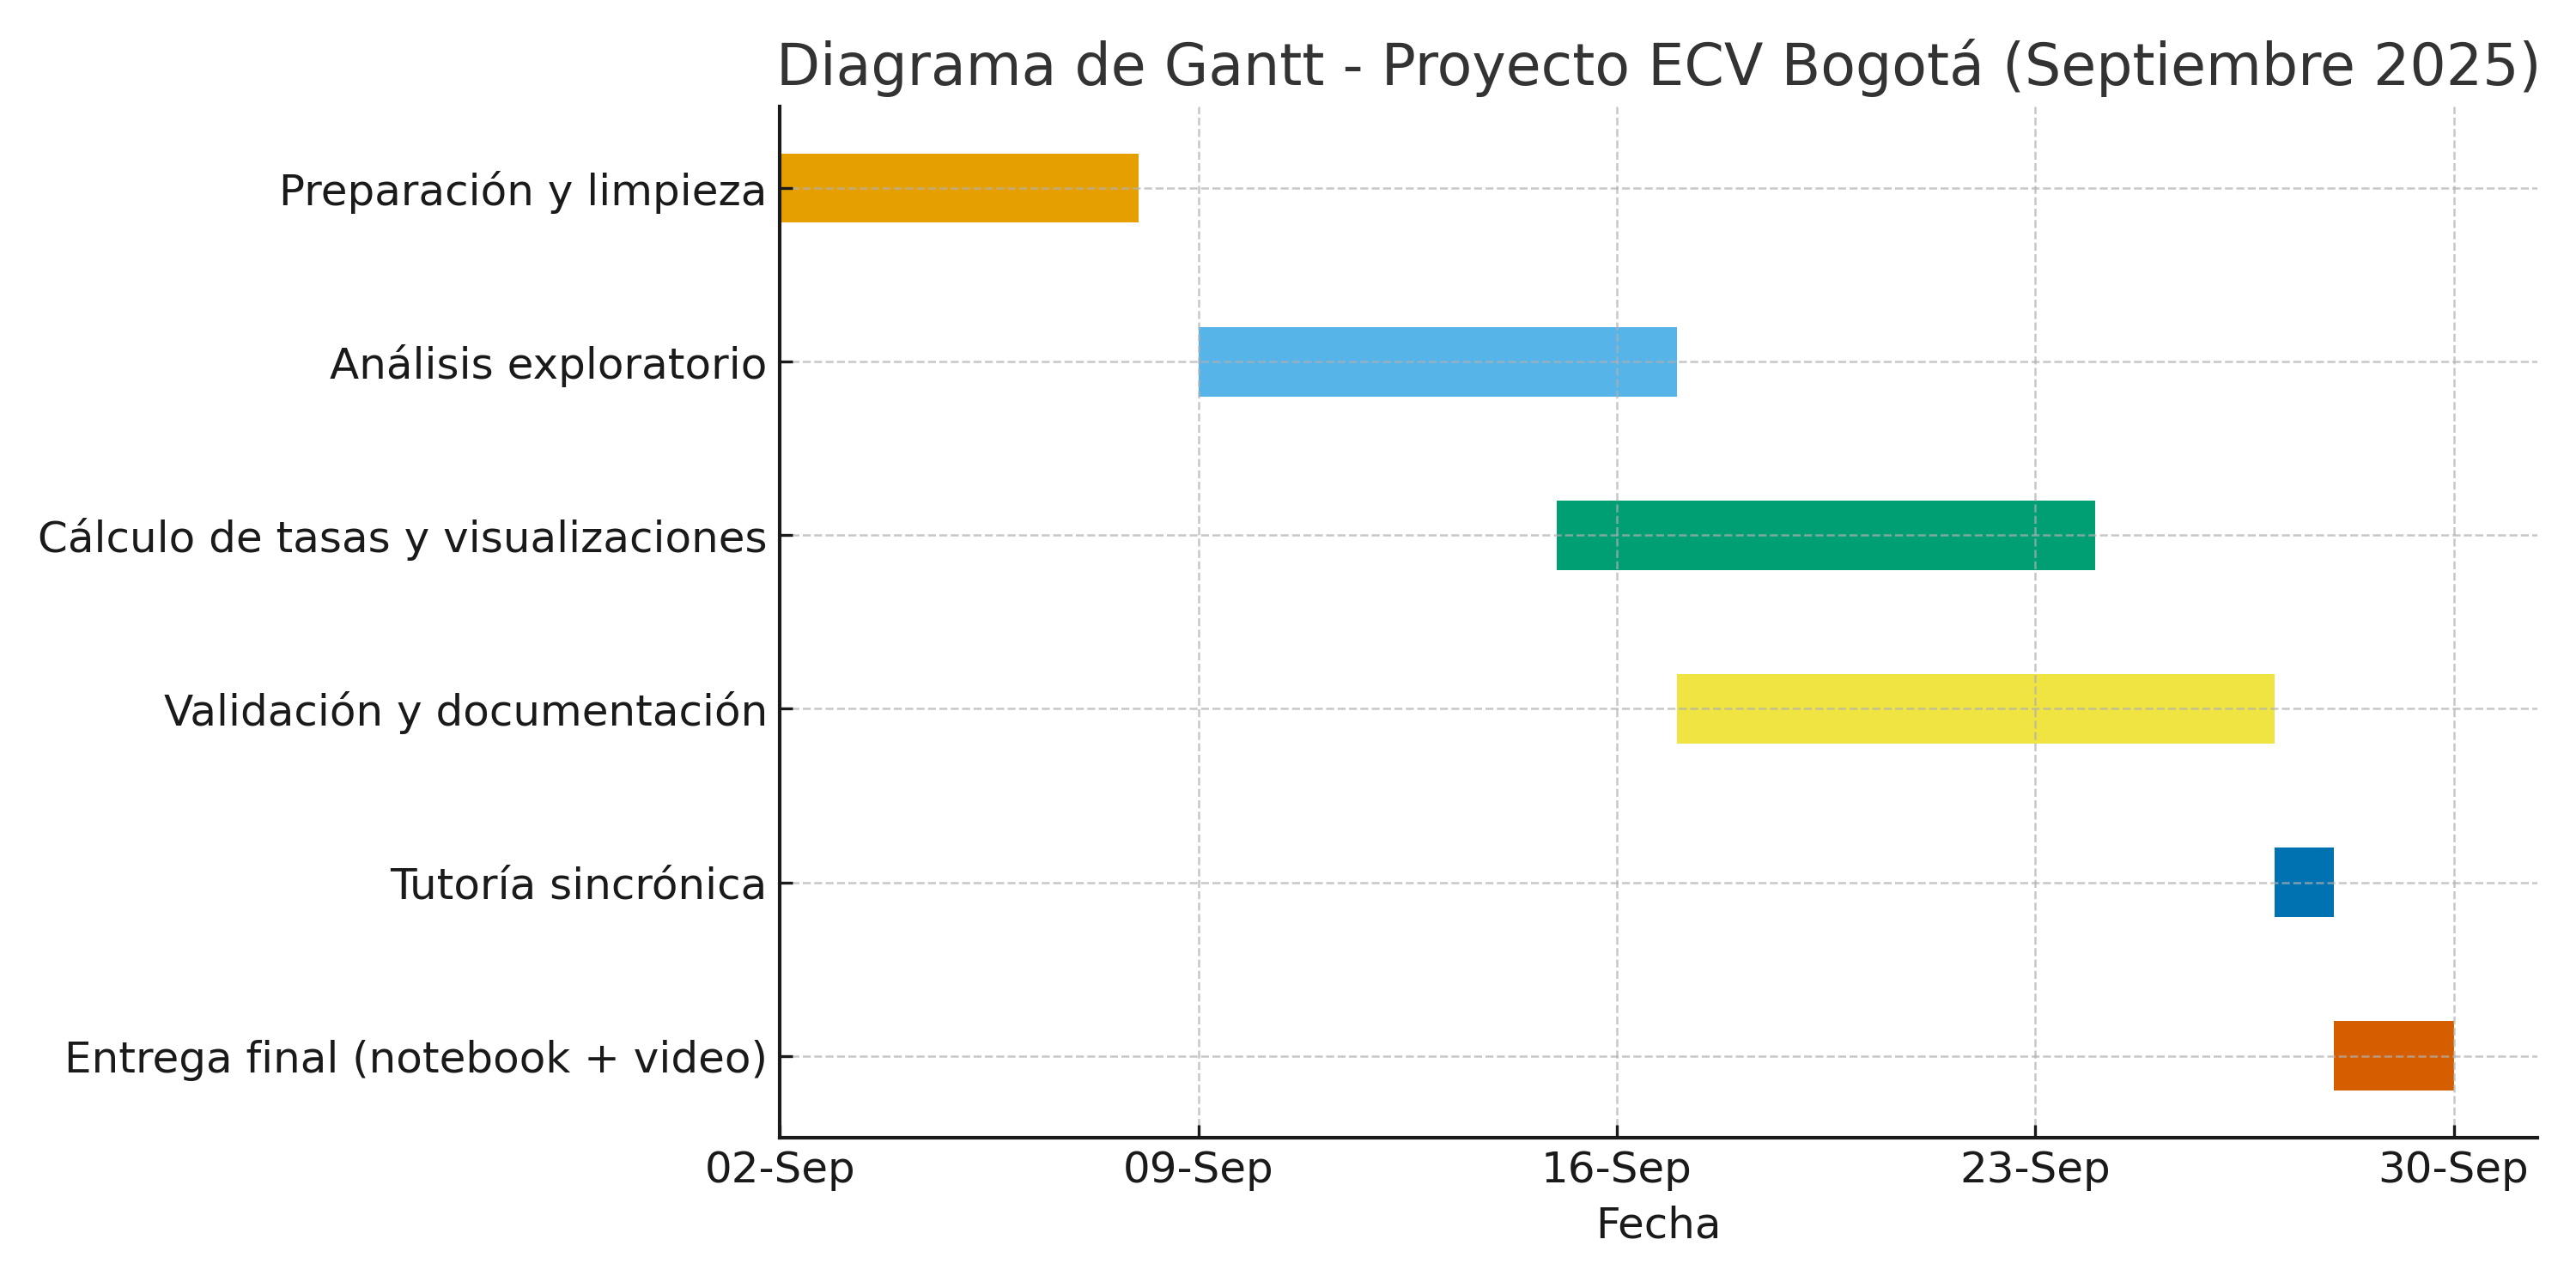

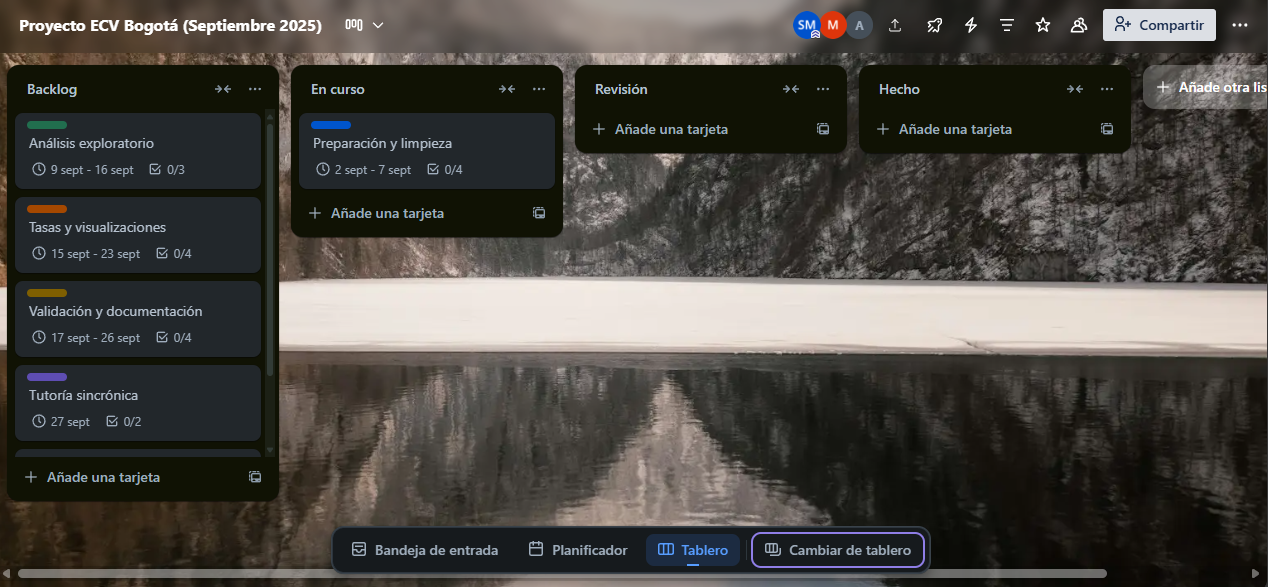

## **2. Datos**
---

En esta sección debe adjuntar una descripción de los datos que planea trabajar. Por el momento no es obligatorio cargar los datos.

### **2.1. Origen**
---
1. **Origen de los Datos**
- Base de datos: Mortalidad prematura por enfermedad cardiocerebrovascular en Bogotá D.C. (30 a 70 años).
- Archivo: osb_cronicas_mpcardiocerebrovasculares.csv
- Fuente: Bases de datos DANE - RUAF - ND Sistema de estadísticas Vitales SDS. Publicación definitiva 2010-2020  Proyecciones de Población por Localidad Convenio interadministrativo 095 de 2020 DANE- FONDANE Y SDP con base en CNPV DANE 2018.
- URL: https://datosabiertos.bogota.gov.co/dataset/mortalidad-prematura-por-enfermedad-cardiocerebrovascular-en-bogota
- Las enfermedades cardiovasculares son la principal causa de defunción en el mundo y, según estimaciones, se cobran 17,9 millones de vidas cada año.

2. **Descripcion general**
- Numero de registros: 47542
- Numero de Variables: 12
- Periodo temporal: 2015 hasta ultima actualización 18 de julio de 2025.
- Unidad de análisis: Cada registro representa una defuncion con sus caracteristicas de CIE-10 y su determinada localidad

3. **Diccionario variables**
  |Variable | Descripción | Tipo |
  |---------|-------------|------|
  |ANO| Periodo de ocurrencia de la muerte.|Numérica|
  |MES| Periodo de ocurrencia de la muerte.|Numérica|
  |EPS| Nombre de la entidad adminstradora del plan de beneficios en salud.|Categórica|
  |SUBRED| Área o sector urbano.|Categórica|
  |SEXO| Femenino o masculino según sea al que pertenecía el fallecido.|Categórica|
  |MIGRANTE| Procedencia del caso de mortalidad.|Categórica|
  |REGIMEN_SEGURIDAD_SOCIAL| Tipo de regimen de seguridad social al cual se encontraba afiliado el fallecido.|Categórica|
  |EDAD_FALLECIMINETO| Edad del fallecido|Numérica|
  |EDAD_QUINCENAL| Agrupacion de edades de cinco en cinco años desde los 30 a los 70 años.|Numérica|
  |CIE10_AGRUPADA|Grupo de la enfermedad (Enfermedades Cardiocerebrovasculares)|Categórica|
  |CIE10_BASICA| Descripción de la causa básica de muerte registrada en el certificado de defunción.|Numérica|
  |LOCALIDAD|Localidad de residencia del fallecido.|Categórica|

  Nota:La CIE-10 (Clasificación Internacional de Enfermedades, 10ª Revisión) es un estándar de la OMS que asigna códigos alfanuméricos para identificar diagnósticos de enfermedades, síntomas y causas de consulta o defunción.
  
4. **Transformaciones necesarias**
- Limpiar valores nulos o duplicados.
- Normalizar nombres de Localidades, Subred, EPS
- Agrupacion por localidades.
- Agrupacion por causa de muerte.



## **3. Carga de datos**
---
Proporcione únicamente el código de Python necesario para descargar el conjunto de datos que será utilizado en el proyecto. Si es necesario, realice operaciones de adquisición e integración del conjunto de datos.

In [ ]:
df = pd.read_csv("osb_cronicas_mpcardiocerebrovasculares.csv",encoding='ISO-8859-1', sep=";")
df.head()

ANO  MES                                          EPS SUBRED       SEXO  \
0  2015    2                            ALIANSALUD E.P.S.  NORTE   FEMENINO   
1  2015    4                                        OTROS  NORTE   FEMENINO   
2  2021    1                               E.P.S. SANITAS  NORTE  MASCULINO   
3  2021    6                               E.P.S. SANITAS  NORTE  MASCULINO   
4  2022    2  FAMISANAR E.P.S. LTDA - CAFAM - COLSUBSIDIO  NORTE  MASCULINO   

     MIGRANTE REGIMEN_SEGURIDAD_SOCIAL  EDAD_FALLECIDO EDAD_QUINQUENAL  \
0  Colombiano             CONTRIBUTIVO              66    65 a 69 años   
1  Colombiano             CONTRIBUTIVO              66    65 a 69 años   
2  Colombiano             CONTRIBUTIVO              66    65 a 69 años   
3  Colombiano             CONTRIBUTIVO              66    65 a 69 años   
4  Colombiano             CONTRIBUTIVO              66    65 a 69 años   

                         CIE10_AGRUPADA CIE10_BASICA    LOCALIDAD  
0  ENFERMEDADES CARDIOCEREBROVASCULARES         I219  00 - Bogotá  
1  ENFERMEDADES CARDIOCEREBROVASCULARES         I219  00 - Bogotá  
2  ENFERMEDADES CARDIOCEREBROVASCULARES         I219  00 - Bogotá  
3  ENFERMEDADES CARDIOCEREBROVASCULARES         I219  00 - Bogotá  
4  ENFERMEDADES CARDIOCEREBROVASCULARES         I219  00 - Bogotá

### **3.1. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.

In [ ]:
vars = df.dtypes
print("Cantidad de variables: ", len(vars))
print("Variables son y su tipo de dato")
print(vars)


Cantidad de variables:  12
Variables son y su tipo de dato
ANO                          int64
MES                          int64
EPS                         object
SUBRED                      object
SEXO                        object
MIGRANTE                    object
REGIMEN_SEGURIDAD_SOCIAL    object
EDAD_FALLECIDO               int64
EDAD_QUINQUENAL             object
CIE10_AGRUPADA              object
CIE10_BASICA                object
LOCALIDAD                   object
dtype: object


In [ ]:
numeric_vars = df.select_dtypes(include=["int64"]).columns
categoric_vars = df.select_dtypes(include=["object"]).columns.tolist()

print("Cantidad de variables numericas: ", len(numeric_vars))
print("Cantidad de variables categoricas: ", len(categoric_vars))

Cantidad de variables numericas:  3
Cantidad de variables categoricas:  9


## **4. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

### **4.1. Resumen General**
---

- ¿Cuántos registros contiene el *dataset*?
- ¿En qué formato están guardados los datos?
- ¿Qué tamaño en MB tiene el conjunto de datos?

In [ ]:
#¿Cuántos registros contiene el dataset?
num_records = len(df)
print(f"Número de registros: {num_records}")
# 2. ¿En qué formato están guardados los datos?
formato = "CSV (valores separados por punto y coma ';')"
print(f"Formato de los datos: {formato}")
#¿Qué tamaño en MB tiene el conjunto de datos?
size_bytes = os.path.getsize("osb_cronicas_mpcardiocerebrovasculares.csv")
size_mb = size_bytes / (1024 * 1024)
print(f"Tamaño del archivo: {size_mb:.2f} MB")

Número de registros: 47542
Formato de los datos: CSV (valores separados por punto y coma ';')
Tamaño del archivo: 6.40 MB


**4.2. Análisis estadístico descriptivo**
---

Describa el conjunto de datos por medio de estadística descriptiva, aportando interpretaciones precisas que ayuden a entender los datos.

**PRE PROCESAMIENTO**








In [ ]:
# === 1. Normalización de valores faltantes ===
# Definir sinonimos para valores "desconocidos"
TOKENS_DESC = [
    "", "nan", "none", "null", "n/a", "na", "nd",
    "desconocido", "no aplica", "no aplica.",
    "sin dato", "sin datos",
    "no especificado", "no especifica", "no definido"
]

# DF a string para limpiar, y reemplazamos tokens por NaN
df_limpio = df.copy()
for c in df_limpio.columns:
    if df_limpio[c].dtype == "object" or pd.api.types.is_string_dtype(df_limpio[c]):
        df_limpio[c] = (df_limpio[c].astype("string")
                        .str.strip().str.lower()
                        .replace(TOKENS_DESC, np.nan))

#  marco los valores vacíos "" como NaN
df_limpio = df_limpio.replace(r'^\s*$', np.nan, regex=True)

# reporte de valores faltantes por columna
faltantes = df_limpio.isna().sum()
print("=== Valores faltantes por columna ===")
print(faltantes[faltantes > 0])

# === 2. Duplicados ===
duplicados = df_limpio.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicados}")



=== Valores faltantes por columna ===
EPS                         3748
SUBRED                       720
REGIMEN_SEGURIDAD_SOCIAL    1086
EDAD_QUINQUENAL               32
LOCALIDAD                    351
dtype: int64

Número de registros duplicados: 957


**ESTANDARIZACIÓN CIE- 10**

In [ ]:
#Variables importantes mortalidad por sexo
count_sexo = (df["SEXO"].value_counts()/len(df["SEXO"]))*100
print("Mortalidad por sexo en enfermedades cardiocerebrovasculares en %")
print(count_sexo)

Mortalidad por sexo en enfermedades cardiocerebrovasculares en %
SEXO
MASCULINO    62.12612
FEMENINO     37.87388
Name: count, dtype: float64


**ESTANDARIZACIÓN SEXO/LOCALIDAD**

In [ ]:
#  quito acentos de un texto ---
def _sin_acentos(s: pd.Series) -> pd.Series:
    # Convierte a str, normaliza (NFKD), elimina diacríticos y vuelve a str
    return (s.astype("string")
              .apply(lambda x: (
                  unicodedata.normalize("NFKD", x)
                  .encode("ascii", "ignore").decode("utf-8")
              ) if x is not None else x))

# --- tokens que significan "desconocido" / faltante ---
TOKENS_DESC = {
    "", " ", "nan", "none", "null", "n/a", "na", "nd",
    "desconocido", "no aplica", "no aplica.", "sin dato", "sin datos",
    "no especificado", "no especifica", "no definido"
}

# --- estandarizar columna SEXO a F/M (o NaN si es desconocido) ---
def estandarizar_sexo(col: pd.Series) -> pd.Series:
    s = (col.astype("string").str.strip().str.lower())
    # mapear variantes comunes
    s = s.replace({
        "femenino": "f", "mujer": "f", "fem": "f",
        "masculino": "m", "hombre": "m", "masc": "m"
    })
    # marcar desconocidos como NaN
    s = s.where(~s.isin(TOKENS_DESC), np.nan)
    # quedarnos solo con F/M (cualquier otra cosa -> NaN)
    s = s.replace({"f": "F", "m": "M"})
    s = s.where(s.isin(["F", "M"]), np.nan)
    return s
def estandarizar_localidad(col: pd.Series) -> pd.Series:
    s = col.astype("string").str.strip().str.lower()
    s = _sin_acentos(s)

    # casos desconocidos -> NaN
    s = s.where(~s.isin(TOKENS_DESC), np.nan)

    # quitar prefijos numéricos "## - "
    s = s.str.replace(r"^\s*\d+\s*-\s*", "", regex=True)

    # normalizar espacios múltiples
    s = s.str.replace(r"\s+", " ", regex=True).str.strip()

    # algunos alias frecuentes
    s = s.replace({
        "bogota d c": "bogota",
        "bogota dc": "bogota",
        "bogota": "bogota",
        "sumapaz": "sumapaz",
        "antonio narino": "antonio narino",
        "la candelaria": "la candelaria"
    })

    # devolver en MAYÚSCULAS
    s = s.str.upper()
    return s


def estandarizar_sexo_localidad(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    if "SEXO" in out.columns:
        out["SEXO_STD"] = estandarizar_sexo(out["SEXO"])
    if "LOCALIDAD" in out.columns:
        out["LOCALIDAD_STD"] = estandarizar_localidad(out["LOCALIDAD"])
    return out


# Creo acpa una versión estandarizada (no toca tus columnas originales)
df_std = estandarizar_sexo_localidad(df)


#display(df_std[["SEXO","SEXO_STD","LOCALIDAD","LOCALIDAD_STD"]].head())
print("Valores únicos en SEXO_STD:", df_std["SEXO_STD"].unique())
print("Valores únicos en LOCALIDAD_STD:", df_std["LOCALIDAD_STD"].unique())

pd.set_option("display.max_rows", None)  # muestra todas las filas
pd.set_option("display.max_columns", None)  # muestra todas las columnas
#display(df_std)

Valores únicos en SEXO_STD: <StringArray>
['F', 'M']
Length: 2, dtype: string
Valores únicos en LOCALIDAD_STD: ['BOGOTA' 'BOSA' 'PUENTE ARANDA' 'KENNEDY' 'USME' 'CIUDAD BOLIVAR'
 'TUNJUELITO' 'SAN CRISTOBAL' 'LA CANDELARIA' 'SANTA FE' 'LOS MARTIRES'
 'RAFAEL URIBE URIBE' 'ANTONIO NARINO' 'FONTIBON' 'ENGATIVA' 'CHAPINERO'
 'USAQUEN' 'BARRIOS UNIDOS' 'TEUSAQUILLO' 'SUBA' nan 'SUMAPAZ']


**ANÁLISIS DESCRIPTIVO**

In [ ]:
# --- mapeo CIE-10 a grupos ---
def mapear_cie10_grupo(codigo: object) -> str:
    s = str(codigo).strip().upper()
    if not s or not s.startswith("I"):
        return "ECV otras (Ixx)"
    m = re.match(r"^I(\d{2})", s)
    if not m:
        return "ECV otras (Ixx)"
    n = int(m.group(1))
    if 10 <= n <= 15:
        return "ECV hipertensivas (I10–I15)"
    if 20 <= n <= 25:
        return "ECV isquémicas (I20–I25)"
    if 60 <= n <= 69:
        return "ECV cerebrovasculares (I60–I69)"
    return "ECV otras (Ixx)"

def _con_porcentajes_y_total(tbl, label_col, count_col="cantidad", total_base=None):
    t = tbl.copy()
    if total_base is None:
        total_base = float(t[count_col].sum())
    t["frec"] = (t[count_col] / total_base * 100).round(2)
    t["frec_acum"] = t["frec"].cumsum().round(2)
    total_row = pd.DataFrame({
        label_col: ["TOTAL"],
        count_col: [int(total_base)],
        "frec": [100.0],
        "frec_acum": [np.nan],
    })
    return pd.concat([t, total_row], ignore_index=True)

def _resumen_categorico(serie):
    vc = serie.value_counts(dropna=False)
    return pd.DataFrame({"moda": [vc.idxmax()], "n_categorias": [vc.shape[0]]})

def _fila_moda(serie: pd.Series, nombre_var: str) -> pd.DataFrame:
    vc = serie.value_counts(dropna=False)
    if vc.empty:
        return pd.DataFrame([{
            "variable": nombre_var, "moda": np.nan, "frecuencia": 0,
            "porcentaje": np.nan, "n_categorias": 0
        }])
    moda = vc.idxmax()
    freq = int(vc.max())
    pct = round(freq / vc.sum() * 100, 2)
    return pd.DataFrame([{
        "variable": nombre_var, "moda": moda, "frecuencia": freq,
        "porcentaje": pct, "n_categorias": int(vc.shape[0])
    }])

#       ANÁLISIS
def analisis(df: pd.DataFrame, show: bool = False):
    resultados = {"tablas": {}, "figs": {}, "resumenes": {}}
    sexo_col = "SEXO_STD" if "SEXO_STD" in df.columns else ("SEXO" if "SEXO" in df.columns else None)
    loc_col  = "LOCALIDAD_STD" if "LOCALIDAD_STD" in df.columns else ("LOCALIDAD" if "LOCALIDAD" in df.columns else None)

    # ===== 1) Estadísticas numéricas =====
    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols):
        desc_tbl = df[num_cols].describe().T
        desc_tbl["varianza"] = df[num_cols].var()
        desc_tbl = desc_tbl.rename(columns={"25%":"Q1 (25%)","50%":"Mediana (50%)","75%":"Q3 (75%)"})
        resultados["tablas"]["estadisticas_numericas"] = desc_tbl

        # Boxplots
        boxplots = {}
        excluidas = {"ANO", "MES", "CIE10_PREFIX"}
        for c in [c for c in num_cols if c not in excluidas]:
            fig, ax = plt.subplots()
            ax.boxplot(
                df[c].dropna(),
                vert=True,
                tick_labels=[""],
                medianprops=dict(color="red", linewidth=2)  # mediana resaltada
            )
            ax.set_title(f"Boxplot de {c}"); ax.set_ylabel(c)
            boxplots[c] = fig
            if show: plt.show()
        resultados["figs"]["boxplots"] = boxplots

    # ===== 2) Distribución por SEXO =====
    if sexo_col:
        sexo_base = df[sexo_col].value_counts(dropna=False)
        sexo_tbl = sexo_base.rename_axis("SEXO").reset_index(name="cantidad")
        sexo_tbl = _con_porcentajes_y_total(sexo_tbl, label_col="SEXO", total_base=float(sexo_base.sum()))
        resultados["tablas"]["sexo"] = sexo_tbl
        resultados["resumenes"]["sexo"] = _resumen_categorico(df[sexo_col])

    # ===== 3) Distribución por LOCALIDAD =====
    if loc_col:
        loc_base = df[loc_col].value_counts(dropna=False)
        loc_tbl = loc_base.rename_axis("LOCALIDAD").reset_index(name="cantidad")
        loc_tbl = _con_porcentajes_y_total(loc_tbl, label_col="LOCALIDAD", total_base=float(loc_base.sum()))
        resultados["tablas"]["localidad"] = loc_tbl
        resultados["resumenes"]["localidad"] = _resumen_categorico(df[loc_col])

    # ===== 4) Distribución por EDAD_QUINQUENAL =====
    if "EDAD_QUINQUENAL" in df.columns:
        tokens_desc = {"","nan","none","null","n/a","na","nd","desconocido","no aplica","no aplica.","sin dato","sin datos","no especificado","no especifica","no definido"}
        s_norm = (df["EDAD_QUINQUENAL"].astype("string").str.strip().str.lower()
                  .replace(list(tokens_desc), "Desconocido").fillna("Desconocido"))
        edadq_base = s_norm.value_counts(dropna=False)
        edadq_tbl = edadq_base.rename_axis("EDAD_QUINQUENAL").reset_index(name="cantidad")
        edadq_tbl = _con_porcentajes_y_total(edadq_tbl, label_col="EDAD_QUINQUENAL", total_base=float(edadq_base.sum()))
        resultados["tablas"]["edad_quinquenal"] = edadq_tbl
        resultados["resumenes"]["edad_quinquenal"] = _resumen_categorico(s_norm)

    # ===== 5) CIE-10 por grupos / top =====
    if "CIE10_BASICA" in df.columns:
        grupos = df["CIE10_BASICA"].apply(mapear_cie10_grupo)
        grp_base = grupos.value_counts(dropna=False)
        cie_grupos_tbl = grp_base.rename_axis("CIE10_GRUPO").reset_index(name="cantidad")
        cie_grupos_tbl = _con_porcentajes_y_total(cie_grupos_tbl, label_col="CIE10_GRUPO", total_base=float(grp_base.sum()))
        resultados["tablas"]["cie10_grupos"] = cie_grupos_tbl
        resultados["resumenes"]["cie10_grupos"] = _resumen_categorico(grupos)

        # Top 15 códigos
        cie_base_all = df["CIE10_BASICA"].astype(str).str.upper().value_counts()
        cie_top15 = cie_base_all.head(15).rename_axis("CIE10_BASICA").reset_index(name="cantidad")
        cie_tbl = cie_top15.copy()
        cie_tbl["porcentaje"] = (cie_tbl["cantidad"] / float(cie_base_all.sum()) * 100).round(2)
        cie_tbl["porcentaje_acum"] = cie_tbl["porcentaje"].cumsum().round(2)
        cie_tbl = pd.concat([cie_tbl, pd.DataFrame({"CIE10_BASICA":["TOTAL"],"cantidad":[int(cie_base_all.sum())],
                                                    "porcentaje":[100.0],"porcentaje_acum":[np.nan]})], ignore_index=True)
        resultados["tablas"]["top_cie10"] = cie_tbl
        resultados["resumenes"]["top_cie10"] = pd.DataFrame({"moda":[cie_base_all.idxmax()], "n_categorias":[cie_base_all.shape[0]]})

    # ===== 6) Tabla única de MODAS =====
    modas_rows = []
    if sexo_col:
        modas_rows.append(_fila_moda(df[sexo_col], "SEXO"))
    if loc_col:
        modas_rows.append(_fila_moda(df[loc_col], "LOCALIDAD"))
    if "EDAD_QUINQUENAL" in df.columns:
        tokens_desc = {"","nan","none","null","n/a","na","nd","desconocido","no aplica","no aplica.","sin dato","sin datos","no especificado","no especifica","no definido"}
        s_norm = (df["EDAD_QUINQUENAL"].astype("string").str.strip().str.lower()
                  .replace(list(tokens_desc), "Desconocido").fillna("Desconocido"))
        modas_rows.append(_fila_moda(s_norm, "EDAD_QUINQUENAL"))
    if "CIE10_BASICA" in df.columns:
        grupos = df["CIE10_BASICA"].apply(mapear_cie10_grupo)
        modas_rows.append(_fila_moda(grupos, "CIE10_GRUPO"))

    if modas_rows:
        resultados["tablas"]["modas"] = pd.concat(modas_rows, ignore_index=True)

    return resultados

def ver_boxplot(res, variable):
    figs = res.get("figs", {}).get("boxplots", {})
    fig = figs.get(variable)
    if fig is None:
        print(f"No hay boxplot guardado para: {variable}")
        return
    display(fig)


**ESTADISTICAS DESCRIPTIVAS DE LAS VARIABLES**

count         mean       std     min  Q1 (25%)  \
ANO             47542.0  2019.574313  2.878023  2015.0    2017.0   
MES             47542.0     6.434563  3.442240     1.0       3.0   
EDAD_FALLECIDO  47542.0    60.118758  8.453605    30.0      56.0   

                Mediana (50%)  Q3 (75%)     max   varianza  
ANO                    2020.0    2022.0  2025.0   8.283018  
MES                       6.0       9.0    12.0  11.849013  
EDAD_FALLECIDO           62.0      67.0    70.0  71.463442

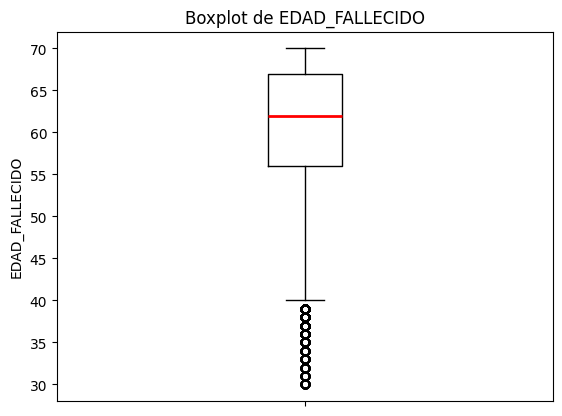

In [ ]:
res = analisis(df_std)
display(res["tablas"]["estadisticas_numericas"])

**DISTRIBUICIÓN DE MUERTES POR GRUPOS DE ECV \(CIE-10)**

CIE10_GRUPO  cantidad    frec  frec_acum
0         ECV isquémicas (I20–I25)     30082   63.27      63.27
1  ECV cerebrovasculares (I60–I69)     12866   27.06      90.33
2      ECV hipertensivas (I10–I15)      4262    8.96      99.29
3                  ECV otras (Ixx)       332    0.70      99.99
4                            TOTAL     47542  100.00        NaN

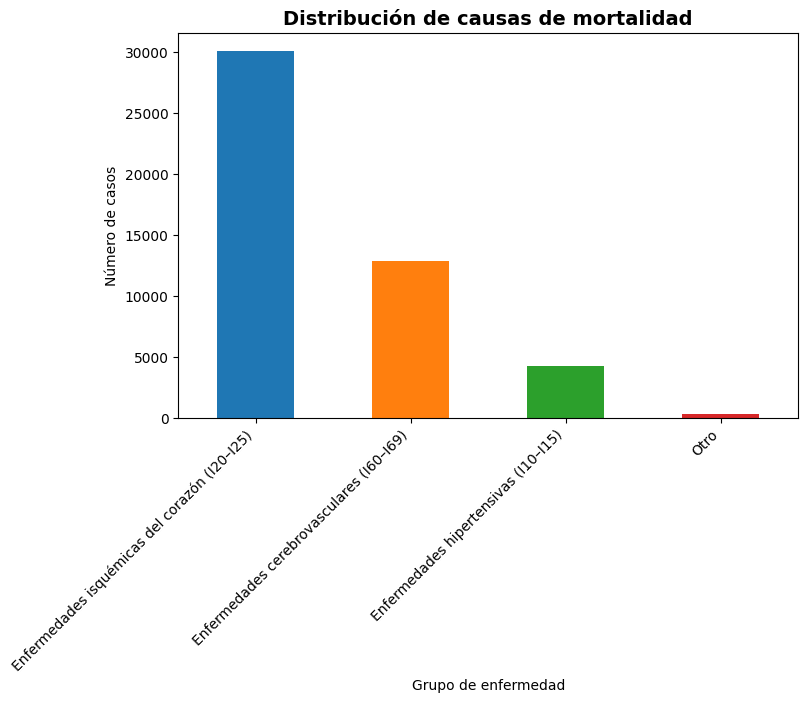

No hay boxplot guardado para: CIE10


In [ ]:
def clasificar_cie10(codigo):
  if codigo in [20,21,22,23,24,25]:
    return "Enfermedades isquémicas del corazón (I20–I25)"
  elif codigo in [60, 61, 62, 63, 64, 65, 66, 67, 68, 69]:
    return "Enfermedades cerebrovasculares (I60–I69)"
  elif codigo in [10, 11, 12, 13, 14, 15]:
      return "Enfermedades hipertensivas (I10–I15)"
  else:
      return "Otro"

display(res["tablas"]["cie10_grupos"])
df_split = df_std.copy()
#Agrupacion in the three proposed operational groups
df_split['CIE10'] = df_split.CIE10_BASICA.str[1:3].astype(np.int64)
df_split['CIE10_GRUPO'] = df_split['CIE10'].apply(clasificar_cie10)
conteo_Agrupacion = df_split["CIE10_GRUPO"].value_counts()

#Histogram cause of death by grouping
plt.figure(figsize=(8,5))
conteo_Agrupacion.plot(kind="bar", color=["#1f77b4","#ff7f0e","#2ca02c","#d62728"])
plt.title("Distribución de causas de mortalidad",fontsize=14, fontweight="bold")

plt.ylabel("Número de casos")
plt.xlabel("Grupo de enfermedad")
plt.xticks(rotation=45, ha="right")
plt.show()

ver_boxplot(res, "CIE10")

**DISTRIBUICIÓN DE MUERTES POR SEXO**

SEXO  cantidad   frec  frec_acum
0      M     29536  62.13      62.13
1      F     18006  37.87      100.0
2  TOTAL     47542  100.0       <NA>

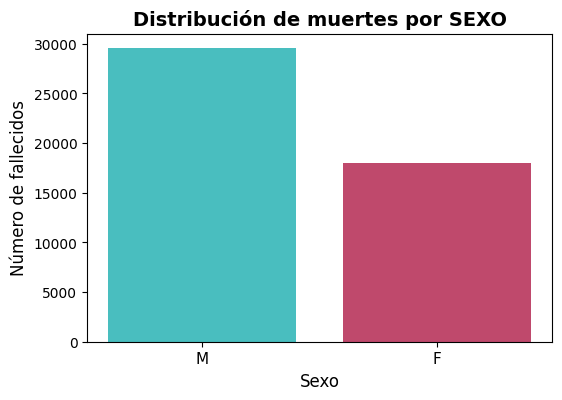

In [ ]:
display(res["tablas"]["sexo"])

sexo_tbl = res["tablas"]["sexo"]
aux = sexo_tbl[sexo_tbl["SEXO"] != "TOTAL"]

# Nuevo gráfico personalizado
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(
    aux["SEXO"].astype(str),       # Eje X
    aux["cantidad"],               # Eje Y
    color=["#49bebf", "#bf496c"]   # Colores personalizados
)

# Títulos y etiquetas de ejes
ax.set_title("Distribución de muertes por SEXO", fontsize=14, fontweight="bold")
ax.set_xlabel("Sexo", fontsize=12)
ax.set_ylabel("Número de fallecidos", fontsize=12)
# Cambiar ticks del eje X
ax.set_xticks(range(len(aux["SEXO"])))
ax.set_xticklabels(aux["SEXO"], fontsize=11)
plt.show()

**DISTRIBUICIÓN DE MUERTES POR LOCALIDADES \(CIE-10)**

LOCALIDAD  cantidad    frec  frec_acum
0               BOGOTA     23771   50.00      50.00
1              KENNEDY      3061    6.44      56.44
2                 SUBA      2819    5.93      62.37
3             ENGATIVA      2342    4.93      67.30
4       CIUDAD BOLIVAR      2225    4.68      71.98
5                 BOSA      2111    4.44      76.42
6        SAN CRISTOBAL      1478    3.11      79.53
7   RAFAEL URIBE URIBE      1448    3.05      82.58
8                 USME      1367    2.88      85.46
9              USAQUEN      1292    2.72      88.18
10            FONTIBON       984    2.07      90.25
11       PUENTE ARANDA       842    1.77      92.02
12          TUNJUELITO       678    1.43      93.45
13            SANTA FE       526    1.11      94.56
14      BARRIOS UNIDOS       500    1.05      95.61
15        LOS MARTIRES       445    0.94      96.55
16         TEUSAQUILLO       420    0.88      97.43
17           CHAPINERO       393    0.83      98.26
18      ANTONIO NARINO       375    0.79      99.05
19                 NaN       351    0.74      99.79
20       LA CANDELARIA       103    0.22     100.01
21             SUMAPAZ        11    0.02     100.03
22               TOTAL     47542  100.00        NaN

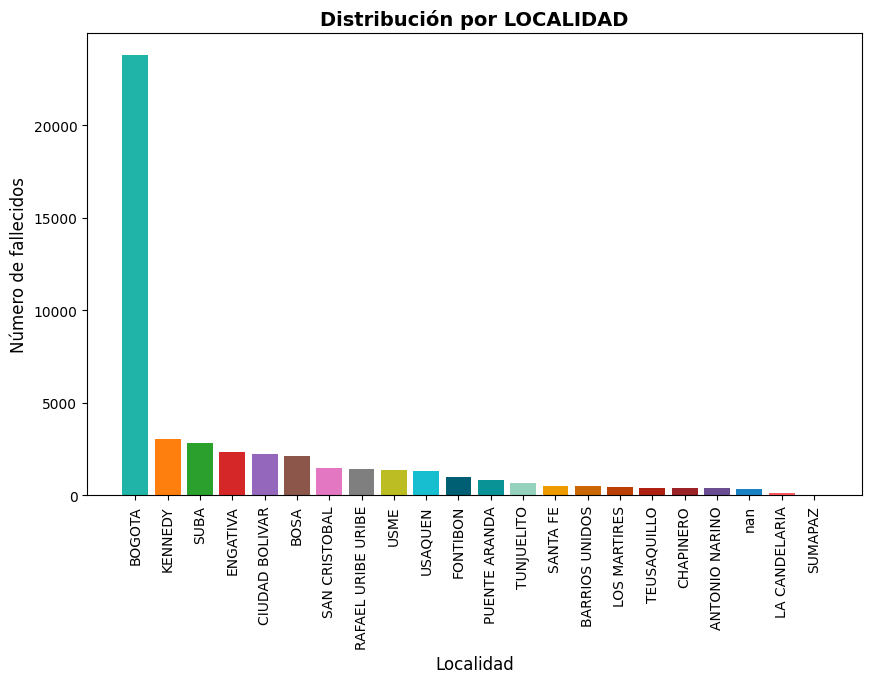

In [ ]:
display(res["tablas"]["localidad"])
loc_tbl = res["tablas"]["localidad"]
aux = loc_tbl[loc_tbl["LOCALIDAD"] != "TOTAL"]

# Gráfico personalizado
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(
    aux["LOCALIDAD"].astype(str),     # Eje X → nombres de localidades
    aux["cantidad"],                  # Eje Y → número de registros
    color=[   "#1fb4a7", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD",
    "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF",
    "#005F73", "#0A9396", "#94D2BD", "#EE9B00", "#CA6702",
    "#BB3E03", "#AE2012", "#9B2226", "#6A4C93", "#1982C4",
    "#FF595E", "#FFCA3A"]       # Color de las barras
)

# Personalización
ax.set_title("Distribución por LOCALIDAD", fontsize=14, fontweight="bold")
ax.set_xlabel("Localidad", fontsize=12)
ax.set_ylabel("Número de fallecidos", fontsize=12)

# Rotación de etiquetas del eje X
ax.tick_params(axis="x", rotation=90)

plt.show()

**DISTRIBUICIÓN DE MUERTES POR EDADES QUINQUENALES**

EDAD_QUINQUENAL  cantidad   frec  frec_acum
0     65 a 69 años     14750  31.03      31.03
1     60 a 64 años     11428  24.04      55.07
2     55 a 59 años      7524  15.83       70.9
3     50 a 54 años      4754   10.0       80.9
4          70 años      3352   7.05      87.95
5     45 a 49 años      2674   5.62      93.57
6     40 a 44 años      1606   3.38      96.95
7     35 a 39 años       892   1.88      98.83
8     30 a 34 años       530   1.11      99.94
9      Desconocido        32   0.07     100.01
10           TOTAL     47542  100.0       <NA>

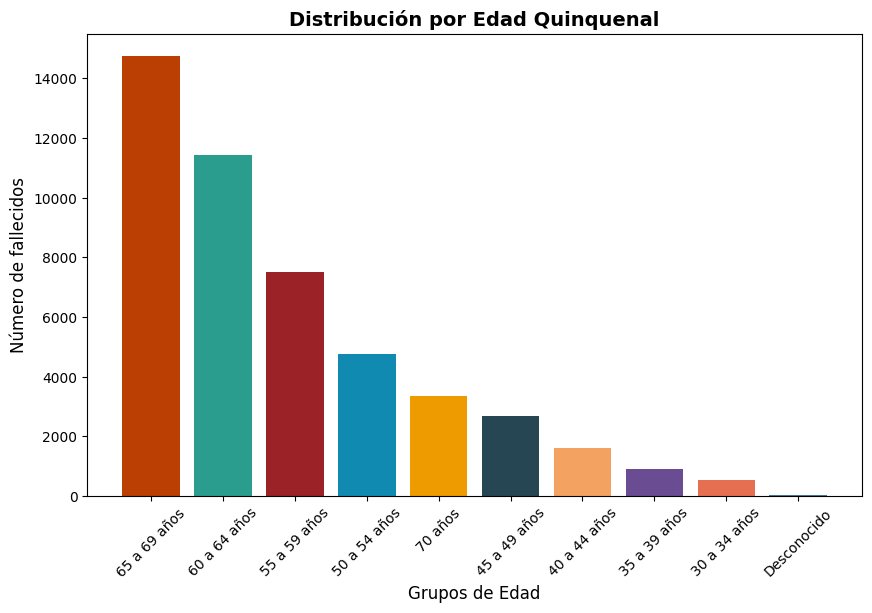

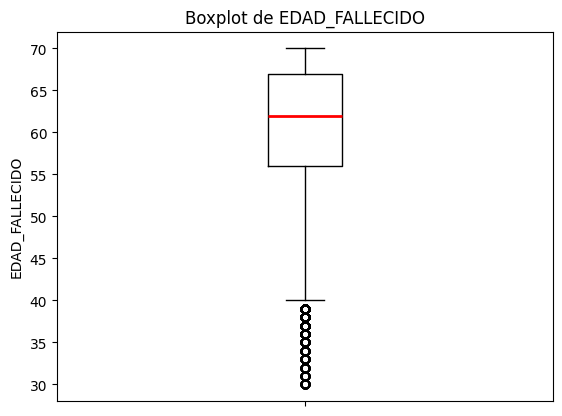

In [ ]:
display(res["tablas"]["edad_quinquenal"])

# Tomar los datos sin el TOTAL
edadq_tbl = res["tablas"]["edad_quinquenal"]
aux = edadq_tbl[edadq_tbl["EDAD_QUINQUENAL"] != "TOTAL"]

# Gráfico personalizado
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(
    aux["EDAD_QUINQUENAL"].astype(str),   # Eje X → grupos de edad quinquenal
    aux["cantidad"],                      # Eje Y → número de registros
 color = [
    "#bb3e03", "#2a9d8f", "#9b2226", "#118ab2", "#ee9b00",
    "#264653", "#f4a261", "#6a4c93", "#e76f51", "#457b9d",
    "#bcbd22", "#073b4c", "#3fbea5", "#ff6b6b", "#90d4c5",
    "#1d3557", "#5f0f40", "#d00000", "#ffb703", "#219ebc",
    "#8338ec" ]
)

# Personalización
ax.set_title("Distribución por Edad Quinquenal", fontsize=14, fontweight="bold")
ax.set_xlabel("Grupos de Edad", fontsize=12)
ax.set_ylabel("Número de fallecidos", fontsize=12)

# Rotación de etiquetas en el eje X
ax.tick_params(axis="x", rotation=45)
plt.show()

ver_boxplot(res, "EDAD_FALLECIDO")



**MODA Y DISTRIBUICIÓN DE LAS VARIABLES CATEGORICAS**

In [ ]:
display(res["tablas"]["modas"])

variable                      moda  frecuencia  porcentaje  \
0             SEXO                         M       29536       62.13   
1        LOCALIDAD                    BOGOTA       23771       50.00   
2  EDAD_QUINQUENAL              65 a 69 años       14750       31.03   
3      CIE10_GRUPO  ECV isquémicas (I20–I25)       30082       63.27   

   n_categorias  
0             2  
1            22  
2            10  
3             4

**RESULTADOS DESCRIPTIVOS**

1. *Concentración en Bogotá*

La ciudad de Bogotá como dato agregado concentra 23.771 casos (50%) del total de fallecimientos por ECV. Esto refleja que la mitad de los registros se encuentran clasificados bajo "Bogotá", lo que puede deberse a:

* Una codificación centralizada de algunos registros.

* Una falta de desagregación en las sublocalidades para la mitad de los casos.

2. *Principales localidades afectadas*

Después de Bogotá, las localidades con mayor número de fallecimientos son:

Kennedy (6,44%), Suba (5,93%), Engativá (4,93%), Ciudad Bolívar (4,68%), Bosa (4,44%). Estas cinco localidades en conjunto representan aproximadamente el 26,5% de los fallecimientos, además de los casos generales en Bogotá.

3.*Localidades con menor proporción*

La Candelaria (0,22%) y Sumapaz (0,02%) registran la menor cantidad de casos, lo que se explica por:

* Baja densidad poblacional.

* Diferencias en acceso a servicios de salud y registros.

4. *Registros faltantes*

Hay 351 casos (0,74%) sin información de localidad, lo que puede generar sesgo en la interpretación espacial.

5. *Tendencia de concentración urbana*

La mayoría de los fallecimientos se concentran en localidades densamente pobladas y urbanas como Kennedy, Suba, Engativá, Ciudad Bolívar y Bosa, las cuales históricamente presentan:

* Mayor densidad poblacional.

* Problemáticas socioeconómicas.

* Desigualdades en acceso a servicios de salud.

6. *Comparación acumulada*

* El 80% de los fallecimientos se concentran en tan solo 9 localidades (incluyendo Bogotá centralizada).

* Esto evidencia una distribución desigual, con fuerte concentración en áreas específicas.

7. *Mortalidad por Sexo*

Masculino: 62,1%

Femenino: 37,9%

 Existe una sobremortalidad masculina coherente con los factores de riesgo más prevalentes en hombres (tabaquismo, hipertensión no controlada, estilos de vida menos saludables). Las mujeres fallecen más a edades avanzadas.

 8. m*ortalidad por Edad*

Edad media: 60 años.

Mediana: 62 años.

Rango intercuartílico: 56–67 años.

Moda quinquenal: 65–69 años (31%).

Outliers: fallecimientos en menores de 40 años, aunque menos frecuentes.

 La mayoría de muertes ocurre en la vejez temprana (55–70 años), lo que confirma que la edad es un determinante central. Sin embargo, los casos en adultos jóvenes son señales de riesgo temprano o de falta de control en factores modificables.

 9. *Mortalidad por Causas (CIE-10)*

* Isquémicas (I20–I25): 63,3%

* Cerebrovasculares (I60–I69): 27,1%

* Hipertensivas (I10–I15): 9%

* Otras: 0,7%

Las hipertensivas son menos, pero actúan como factor detonante. El boxplot de CIE-10 refleja concentración en rangos bajos (20–30), ligados a estas dos causas principales.

10. *Relación entre Dimensiones*

* Sexo + Edad: los hombres mueren más y en edades más tempranas, mientras que las mujeres concentran muertes en edades mayores.

* Edad + CIE-10: las muertes isquémicas predominan entre los 55 y 70 años, reflejando el efecto acumulado de factores de riesgo cardiovascular.

* Localidad + CIE-10: localidades populosas como Kennedy y Suba, además de Bogotá centralizada, concentran los casos isquémicos y cerebrovasculares.



### **4.3. Resumen de la Calidad de los datos**
---

**¿Se detecta la ausencia de datos, la presencia de datos erróneos o la existencia de datos de baja calidad en el conjunto?**

No se encontraron valores nulos en ninguna columna del conjunto de datos. Tampoco se detectaron errores evidentes valores negativs sin sentido o años fuera de un rango lógico. Asimismo, no se identificaron textos problemáticos como “ND” o “N/A”.

**¿Se identifican registros con datos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?**

Se detectó la presencia de caracteres no ASCII en las columnas REGIMEN_SEGURIDAD_SOCIAL (1.430 casos), EDAD_QUINQUENAL (47.510 casos) y LOCALIDAD (32.912 casos), lo cual puede deberse a tildes, espacios no estándar o errores menores de codificación. No se encontraron caracteres extraños o ilegibles.

**¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?**

La mayoría de las columnas presentan un formato consistente y limpio. Sin embargo, en la columna EDAD_QUINQUENAL se identificó una mezcla de formatos: algunos registros usan rangos como “65 a 69 años”, mientras que otros presentan valores únicos como “70 años” o “Desconocido”. Esta variabilidad podría dificultar su análisis si no se estandariza previamente.

**¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?**

Se identificaron 957 registros duplicados y 1.422 valores atípicos en la variable EDAD_FALLECIDO, definidos a través del rango intercuartil. Aunque los outliers no parecen errores, conviene evaluarlos en función del contexto del análisis. No se encontraron datos faltantes.

In [ ]:
# Convertir tipos de datos numéricos
df_split["ANO"] = pd.to_numeric(df_split["ANO"], errors="coerce")
df_split["MES"] = pd.to_numeric(df_split["MES"], errors="coerce")
df_split["EDAD_FALLECIDO"] = pd.to_numeric(df_split["EDAD_FALLECIDO"], errors="coerce")

# Verificar estructura
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47542 entries, 0 to 47541
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ANO                       47542 non-null  int64 
 1   MES                       47542 non-null  int64 
 2   EPS                       47542 non-null  object
 3   SUBRED                    47542 non-null  object
 4   SEXO                      47542 non-null  object
 5   MIGRANTE                  47542 non-null  object
 6   REGIMEN_SEGURIDAD_SOCIAL  47542 non-null  object
 7   EDAD_FALLECIDO            47542 non-null  int64 
 8   EDAD_QUINQUENAL           47542 non-null  object
 9   CIE10_AGRUPADA            47542 non-null  object
 10  CIE10_BASICA              47542 non-null  object
 11  LOCALIDAD                 47542 non-null  object
 12  SEXO_STD                  47542 non-null  string
 13  LOCALIDAD_STD             47191 non-null  object
 14  CIE10                 

In [ ]:
# PREGUNTA 1: Evaluación de nulos, errores y baja calidad

# 1. Verificar valores nulos por columna
missing_data = df_split.isnull().sum()

# 2. Verificar errores: edades negativas o años fuera de rango lógico
invalid_age = df_split[df_split["EDAD_FALLECIDO"] < 0]
invalid_year = df_split[(df_split["ANO"] < 1900) | (df_split["ANO"] > 2025)]

# 3. Verificar textos de baja calidad como 'ND', 'N/A'
low_quality_texts = (df_split == "ND").sum() + (df_split == "N/A").sum()

# Mostrar resultados
print("🔎 Valores nulos por columna:\n", missing_data)
print("\n❌ Registros con edad negativa:", invalid_age.shape[0])
print("❌ Registros con año inválido:", invalid_year.shape[0])
print("\n⚠️ Registros con texto 'ND' o 'N/A':\n", low_quality_texts)


🔎 Valores nulos por columna:
 ANO                           0
MES                           0
EPS                           0
SUBRED                        0
SEXO                          0
MIGRANTE                      0
REGIMEN_SEGURIDAD_SOCIAL      0
EDAD_FALLECIDO                0
EDAD_QUINQUENAL               0
CIE10_AGRUPADA                0
CIE10_BASICA                  0
LOCALIDAD                     0
SEXO_STD                      0
LOCALIDAD_STD               351
CIE10                         0
CIE10_GRUPO                   0
dtype: int64

❌ Registros con edad negativa: 0
❌ Registros con año inválido: 0

⚠️ Registros con texto 'ND' o 'N/A':
 ANO                         0
MES                         0
EPS                         0
SUBRED                      0
SEXO                        0
MIGRANTE                    0
REGIMEN_SEGURIDAD_SOCIAL    0
EDAD_FALLECIDO              0
EDAD_QUINQUENAL             0
CIE10_AGRUPADA              0
CIE10_BASICA                0
LOCALIDAD 

In [ ]:
# PREGUNTA 2:

# 1. Identificar columnas de texto
text_columns = df_split.select_dtypes(include="object").columns

# 2. Detectar caracteres no ASCII (pueden generar errores de codificación)
non_ascii_counts = {
    col: df_split[col].apply(lambda x: any(ord(char) > 127 for char in str(x))).sum()
    for col in text_columns
}

# 3. Detectar símbolos extraños o ilegibles (fuera de letras, tildes, comas, etc.)
weird_symbols_counts = {
    col: df_split[col].apply(lambda x: bool(re.search(r'[^\w\sáéíóúÁÉÍÓÚñÑ.,;:/()-]', str(x)))).sum()
    for col in text_columns
}

# Mostrar resultados
print("🔎 Registros con caracteres NO ASCII (posible codificación no estándar):")
for col, count in non_ascii_counts.items():
    print(f" - {col}: {count}")

print("\n⚠️ Registros con símbolos extraños:")
for col, count in weird_symbols_counts.items():
    print(f" - {col}: {count}")


🔎 Registros con caracteres NO ASCII (posible codificación no estándar):
 - EPS: 0
 - SUBRED: 0
 - SEXO: 0
 - MIGRANTE: 0
 - REGIMEN_SEGURIDAD_SOCIAL: 1430
 - EDAD_QUINQUENAL: 47510
 - CIE10_AGRUPADA: 0
 - CIE10_BASICA: 0
 - LOCALIDAD: 32912
 - LOCALIDAD_STD: 0
 - CIE10_GRUPO: 47210

⚠️ Registros con símbolos extraños:
 - EPS: 0
 - SUBRED: 0
 - SEXO: 0
 - MIGRANTE: 0
 - REGIMEN_SEGURIDAD_SOCIAL: 0
 - EDAD_QUINQUENAL: 0
 - CIE10_AGRUPADA: 0
 - CIE10_BASICA: 0
 - LOCALIDAD: 0
 - LOCALIDAD_STD: 0
 - CIE10_GRUPO: 47210


In [ ]:
# PREGUNTA 3: Evaluación de formatos inconsistentes

# 1. Contar cuántos valores únicos hay por columna
unique_counts = df_split.nunique().sort_values(ascending=False)

# 2. Revisar contenido específico en campos sensibles a formato
sexo_unicos = df_split["SEXO"].unique()
migrante_unicos = df_split["MIGRANTE"].unique()
edad_quinquenal_unicos = df_split["EDAD_QUINQUENAL"].unique()
localidad_unicos = df_split["LOCALIDAD"].unique()

# Mostrar resultados
print("🔎 Cantidad de valores únicos por columna:\n", unique_counts)
print("\n🧩 Valores únicos en 'SEXO':", sexo_unicos)
print("🧩 Valores únicos en 'MIGRANTE':", migrante_unicos)
print("🧩 Ejemplos en 'EDAD_QUINQUENAL':", edad_quinquenal_unicos[:10])
print("🧩 Ejemplos en 'LOCALIDAD':", localidad_unicos[:10])



🔎 Cantidad de valores únicos por columna:
 CIE10_BASICA                78
EDAD_FALLECIDO              41
LOCALIDAD                   22
LOCALIDAD_STD               21
CIE10                       18
EPS                         16
MES                         12
ANO                         11
EDAD_QUINQUENAL             10
REGIMEN_SEGURIDAD_SOCIAL     6
SUBRED                       5
CIE10_GRUPO                  4
MIGRANTE                     3
SEXO                         2
SEXO_STD                     2
CIE10_AGRUPADA               1
dtype: int64

🧩 Valores únicos en 'SEXO': ['FEMENINO' 'MASCULINO']
🧩 Valores únicos en 'MIGRANTE': ['Colombiano' 'Extranjero' 'Sin Informacion']
🧩 Ejemplos en 'EDAD_QUINQUENAL': ['65 a 69 años' '60 a 64 años' '55 a 59 años' '50 a 54 años'
 '45 a 49 años' '40 a 44 años' '35 a 39 años' '30 a 34 años' '70 años'
 'Desconocido']
🧩 Ejemplos en 'LOCALIDAD': ['00 - Bogotá' '07 - Bosa' '16 - Puente Aranda' '08 - Kennedy' '05 - Usme'
 '19 - Ciudad Bolívar' '06 - Tunj

In [ ]:
# PREGUNTA 4: Evaluación de duplicados, outliers y nulos

# 1. Duplicados: filas completamente repetidas
duplicados = df_split.duplicated().sum()

# 2. Outliers: EDAD_FALLECIDO (usando rango intercuartil)
edad_stats = df_split["EDAD_FALLECIDO"].describe()
Q1 = edad_stats["25%"]
Q3 = edad_stats["75%"]
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = df_split[
    (df_split["EDAD_FALLECIDO"] < limite_inferior) |
    (df_split["EDAD_FALLECIDO"] > limite_superior)
]

# 3. Confirmar nulos
nulos_totales = df_split.isnull().sum().sum()

# Mostrar resultados
print("📌 Registros duplicados:", duplicados)
print("📌 Registros con edad fuera del rango intercuartil:", outliers.shape[0])
print("\n📊 Estadísticas de EDAD_FALLECIDO:")
print(edad_stats)
print("\n📌 Valores nulos totales en el DataFrame:", nulos_totales)


📌 Registros duplicados: 957
📌 Registros con edad fuera del rango intercuartil: 1422

📊 Estadísticas de EDAD_FALLECIDO:
count    47542.000000
mean        60.118758
std          8.453605
min         30.000000
25%         56.000000
50%         62.000000
75%         67.000000
max         70.000000
Name: EDAD_FALLECIDO, dtype: float64

📌 Valores nulos totales en el DataFrame: 351


### **4.4. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.

In [ ]:
# 1) Agrupar: contar muertes por localidad y año
df_group_ano = df_split.groupby(["ANO"]).agg(
    MUERTES = ("ANO", "size"),                  # conteo
    EDAD_PROM = ("EDAD_FALLECIDO", "mean"),     # edad promedio
    EDAD_MED = ("EDAD_FALLECIDO", "median"),
    PORC_HOMBRES = ("SEXO", lambda x: (x=="MASCULINO").mean()),  # proporción de hombres
    I10_15 = ("CIE10_BASICA", lambda s: s.str.startswith("I10").sum()), # ejemplo simple
).reset_index()

# Ver las primeras filas
df_group_ano

ANO  MUERTES  EDAD_PROM  EDAD_MED  PORC_HOMBRES  I10_15
0   2015     4572  60.027997      62.0      0.600612      82
1   2016     4650  60.108387      62.0      0.615914      60
2   2017     4626  60.149589      62.0      0.615651      82
3   2018     4560  59.918860      62.0      0.607456      88
4   2019     4510  60.305543      62.0      0.628825      54
5   2020     4882  59.768537      62.0      0.619009      94
6   2021     5702  60.197475      62.0      0.631708      80
7   2022     4764  59.903442      62.0      0.615029      42
8   2023     4288  60.508396      63.0      0.630597      32
9   2024     4304  60.244424      63.0      0.646375      98
10  2025      684  60.798246      63.0      0.631579      16

In [ ]:
df_split.dtypes

ANO                                  int64
MES                                  int64
EPS                                 object
SUBRED                              object
SEXO                                object
MIGRANTE                            object
REGIMEN_SEGURIDAD_SOCIAL            object
EDAD_FALLECIDO                       int64
EDAD_QUINQUENAL                     object
CIE10_AGRUPADA                      object
CIE10_BASICA                        object
LOCALIDAD                           object
SEXO_STD                    string[python]
LOCALIDAD_STD                       object
CIE10                                int64
CIE10_GRUPO                         object
dtype: object

In [ ]:
# 1) Agrupar: contar muertes por grupo operativo

df_group_CIE10 = df_split.groupby(["ANO", "CIE10_GRUPO"]).agg(
    MUERTES = ("ANO", "size"),                  # conteo
    EDAD_PROM = ("EDAD_FALLECIDO", "mean"),     # edad promedio
    EDAD_MED = ("EDAD_FALLECIDO", "median"),
    PORC_HOMBRES = ("SEXO", lambda x: (x=="MASCULINO").mean()),  # proporción de hombres
   # I10_15 = ("CIE10_BASICA", lambda s: s.str.startswith("I10").sum()), # ejemplo simple
).reset_index()

# Ver las primeras filas
df_group_CIE10.head()

ANO                                    CIE10_GRUPO  MUERTES  EDAD_PROM  \
0  2015       Enfermedades cerebrovasculares (I60–I69)     1306  58.611026   
1  2015           Enfermedades hipertensivas (I10–I15)      450  60.066667   
2  2015  Enfermedades isquémicas del corazón (I20–I25)     2780  60.684173   
3  2015                                           Otro       36  60.277778   
4  2016       Enfermedades cerebrovasculares (I60–I69)     1336  58.625749   

   EDAD_MED  PORC_HOMBRES  
0      61.0      0.462481  
1      62.0      0.497778  
2      63.0      0.684173  
3      61.5      0.444444  
4      61.0      0.492515

### **5.1. Valores faltantes**
---
Al encontrarnos con valores faltantes en el conjunto de datos, es crucial preguntarse:
* ¿Cómo afectan estos valores a la integridad y representatividad de la información?

No se encontraron valores faltantes relevantes en el dataset. Esto asegura que la información mantiene su integridad y, por tanto, su representatividad.
* ¿Cómo se identificaron los valores faltantes en el conjunto de datos?

Se aplicaron funciones de conteo de valores nulos como isna().sum() junto a un cálculo de porcentaje del total de nulos sobre el total de celdas: la base está prácticamente completa.

* ¿Cuáles fueron los criterios para decidir si rellenar con valores estimados o eliminar los valores faltantes? En caso que aplique, ¿qué método de relleno se utilizó y por qué se consideró apropiado?

Dado que no se detectaron valores faltantes significativos, no fue necesario implementar métodos de relleno.

* ¿Se realizó un análisis de la distribución de los valores faltantes en relación con las variables clave? Por ejemplo, si hay valores faltantes en una variable crítica, ¿cómo podría afectar la interpretación de los resultados?

Sí, al revisar las variables más importantes como SEXO, EDAD, LOCALIDAD, FALLECIDO, se comprobó que no presentaban valores faltantes; esto refuerza la confiabilidad de análisis posteriores.

In [ ]:
import pandas as pd

# Cargar dataset
df = pd.read_csv("osb_cronicas_mpcardiocerebrovasculares.csv",
                 encoding="ISO-8859-1", sep=";")

# Valores faltantes por columna
faltantes = df.isna().sum().to_frame("Cantidad")
faltantes["Porcentaje"] = (faltantes["Cantidad"] / len(df)) * 100
faltantes = faltantes[faltantes["Cantidad"] > 0].sort_values("Porcentaje", ascending=False)

# Resumen global
total_celdas = df.size
total_nulos = int(df.isna().sum().sum())
pct_completitud = 100 * (1 - total_nulos / total_celdas)

print(f"Filas: {len(df):,} | Columnas: {df.shape[1]}")
print(f"Nulos totales: {total_nulos:,} de {total_celdas:,} celdas "
      f"({(100 - pct_completitud):.4f}% nulos, {pct_completitud:.4f}% completo)\n")

if faltantes.empty:
    print("✅ No se encontraron valores faltantes por columna.")
else:
    print("Valores faltantes por variable:")
    print(faltantes)

Filas: 47,542 | Columnas: 12
Nulos totales: 0 de 570,504 celdas (0.0000% nulos, 100.0000% completo)

✅ No se encontraron valores faltantes por columna.


### **5.2. Valores duplicados**
----
Ante la presencia de valores duplicados, es esencial reflexionar sobre su impacto en los resultados.

**El output del código muestra al final 5 ejemplos de filas duplicadas**

* ¿Cómo se identificaron y manejaron los valores duplicados en el conjunto de datos?

Se utilizó la función duplicated() de pandas para detectar registros idénticos en todas las columnas. Se evaluó si correspondían a repeticiones reales o a registros válidos. En caso de confirmarse duplicados totales, se eliminaron con drop_duplicates() conservando la primera ocurrencia.


* ¿Hubo alguna consideración especial al tratar duplicados en función de ciertas variables?

Sí. En este conjunto de datos, los cambios en variables como AÑO y MES indican que no necesariamente se trata de duplicados, sino de observaciones distintas de un mismo fenómeno en distintos periodos.

* ¿Pueden estos duplicados sesgar el análisis, y en qué medida?

Sí. La presencia de duplicados incrementa artificialmente la frecuencia de ciertos eventos y puede sesgar indicadores como tasas, promedios o distribuciones.

* ¿Se justifica la eliminación de duplicados para mantener la coherencia y singularidad de los datos?

Sí, siempre que los registros no aporten información nueva. La eliminación asegura que cada fila represente un caso único y evita la sobrerepresentación de eventos.

* ¿Cómo se aseguró de que la eliminación de duplicados no afectara negativamente la representación del conjunto de datos?

Antes de eliminar, se verificó que las filas fueran idénticas en todas las columnas. De esta forma, se garantiza que al conservar la primera ocurrencia no se pierde información relevante ni se distorsiona la estructura del dataset.

La identificación y eliminación de duplicados busca asegurar que cada registro aporte información única y valiosa.

In [ ]:
import pandas as pd

# 1. Contar duplicados totales
duplicados_totales = df.duplicated().sum()
print(f"Registros duplicados en todo el dataset: {duplicados_totales}\n")

if duplicados_totales > 0:
    # 2. Filas que se eliminaron en drop_duplicates() (todas menos la primera ocurrencia)
    eliminadas = df[df.duplicated(keep='first')].copy()

    # 3. Filas originales que se conservaron
    originales = df[~df.duplicated(keep='first')].copy()

    # 4. Emparejar duplicados: original + eliminado
    pares = []
    for idx in eliminadas.index[:5]:   # 5 ejemplos
        fila_dup = df.loc[idx]
        # buscar la primer ocurrencia
        original_idx = df[df.eq(fila_dup).all(axis=1)].index[0]
        pares.append((original_idx, idx))

    # 5. Mostrar ejemplos emparejados
    for original_idx, dup_idx in pares:
        print("\n=== Par de duplicados ===")
        print(f"➡️ Fila original ({original_idx}):\n{df.loc[original_idx]}")
        print(f"➡️ Fila eliminada  ({dup_idx}):\n{df.loc[dup_idx]}")
else:
    print("✅ No se encontraron filas duplicadas en el dataset.")


Registros duplicados en todo el dataset: 957


=== Par de duplicados ===
➡️ Fila original (35):
ANO                                                         2017
MES                                                            4
EPS                                                        OTROS
SUBRED                                                     NORTE
SEXO                                                    FEMENINO
MIGRANTE                                              Colombiano
REGIMEN_SEGURIDAD_SOCIAL                            CONTRIBUTIVO
EDAD_FALLECIDO                                                66
EDAD_QUINQUENAL                                     65 a 69 años
CIE10_AGRUPADA              ENFERMEDADES CARDIOCEREBROVASCULARES
CIE10_BASICA                                                I219
LOCALIDAD                                            00 - Bogotá
Name: 35, dtype: object
➡️ Fila eliminada  (43):
ANO                                                         2017
MES       

### **5.3. Valores atípicos**
---
Al abordar valores atípicos, es relevante cuestionarse sobre la naturaleza de estos puntos extremos.
* ¿Son errores de medición o representan información válida pero excepcional?

Los valores atípicos observados en la variable EDAD_FALLECIDO corresponden principalmente a edades más bajas (entre 30 y 40 años). Estos no son errores de captura ni de medición, ya que se encuentran dentro del rango fisiológicamente plausible de edad humana. Representan casos excepcionales de mortalidad prematura por enfermedades cardio-cerebrovasculares (ECV), lo cual es epidemiológicamente válido aunque poco frecuente.

* ¿Qué criterios o técnicas se utilizaron para identificar los valores atípicos?

La detección se realizó mediante un boxplot, que evidencia la presencia de casos por debajo del límite inferior de la distribución intercuartílica. Además, se aplicaron criterios estadísticos como el rango intercuartílico (IQR) para identificar valores que se alejan significativamente de la mediana. Esto permitió diferenciar entre la mayoría de las defunciones (concentradas entre 55 y 70 años) y los casos extremos de muertes más jóvenes.

* ¿Se aplicaron métodos estadísticos o visuales para detectar los valores atípicos?

Visual: el boxplot permitió observar rápidamente la concentración de los datos y los puntos extremos por debajo de los 40 años.

Estadístico: el cálculo de los límites mediante el método del IQR confirmó la presencia de casos atípicos, aunque plausibles.

* ¿Cuál fue la decisión final sobre cómo tratar los valores atípicos y por qué?

La decisión fue conservar los valores atípicos en el análisis. La justificación es que, aunque son pocos casos, representan eventos de mortalidad prematura que enriquecen la interpretación epidemiológica del fenómeno. Eliminarlos habría generado un sesgo hacia una mortalidad más tardía, invisibilizando un subgrupo poblacional relevante en salud pública.

En consecuencia, se mantiene la información completa para reflejar de manera más precisa la realidad de la mortalidad por ECV en Bogotá, considerando tanto los patrones dominantes (muertes en adultos mayores) como los casos excepcionales (muertes tempranas).

La elección entre eliminar o transformar estos valores debe basarse en su influencia en la distribución y la interpretación de los resultados, asegurando que el análisis refleje de manera precisa la realidad del conjunto de datos.

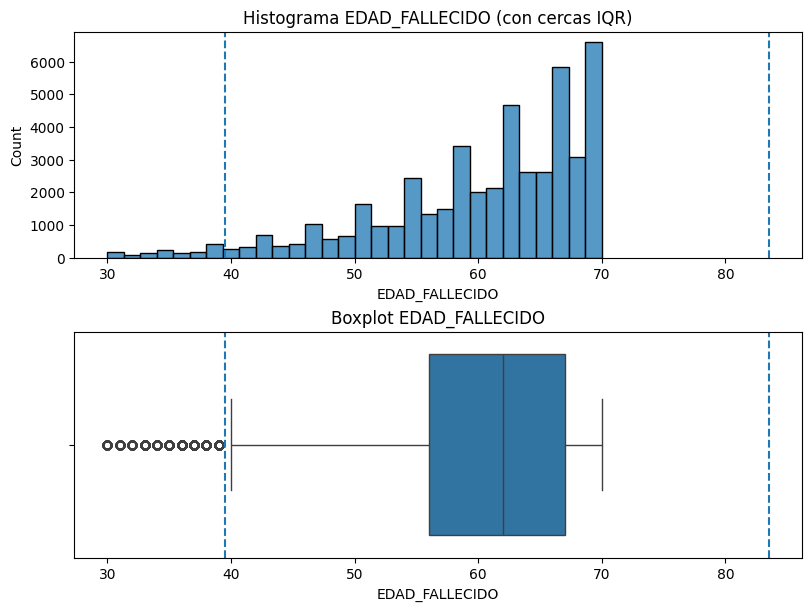

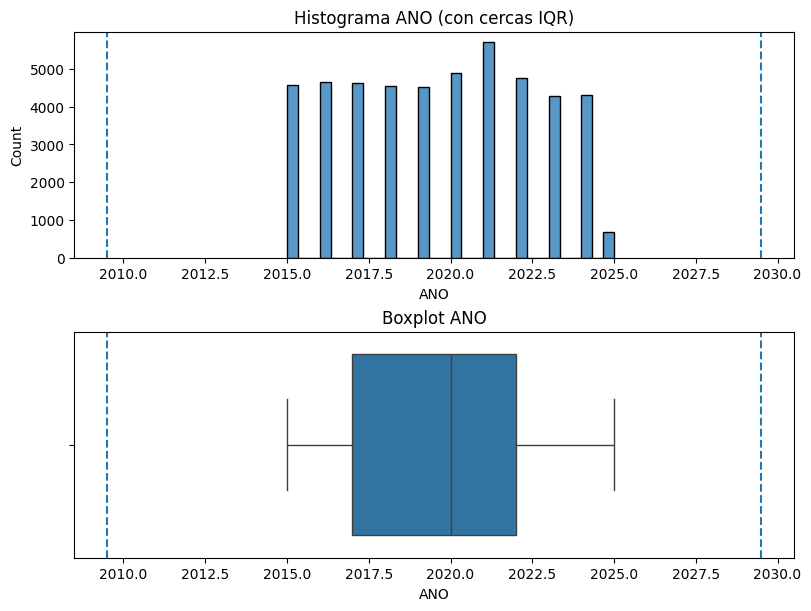

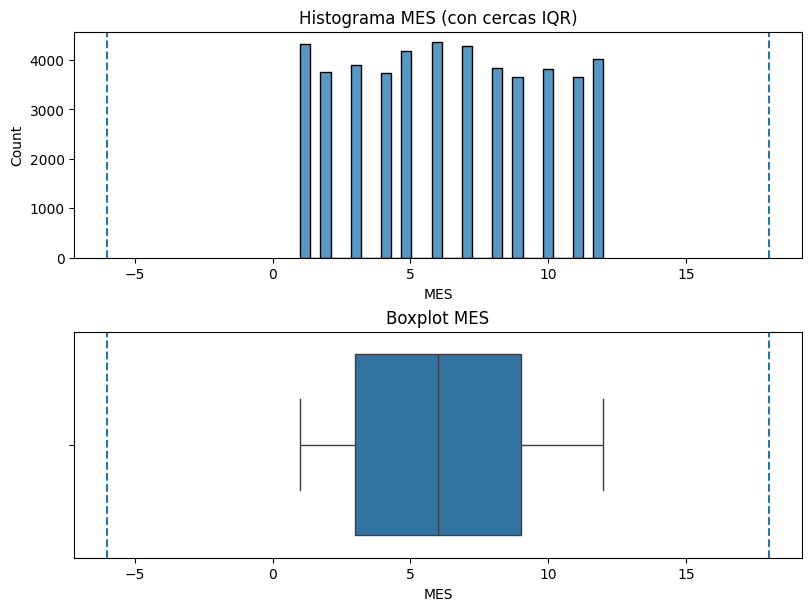

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

res = res if 'res' in globals() else {"tablas":{}, "figs":{}, "textos":{}}

res['data'] = df

cols_numericas = ["EDAD_FALLECIDO", "ANO", "MES"]  # añade otras si aplica

reglas_plausibilidad = {
    "EDAD_FALLECIDO": {"min_val": 0, "max_val": 120},    # edad humana plausible
    "ANO":            {"min_val": 2015, "max_val": 2025},# rango temporal del estudio
    "MES":            {"min_val": 1, "max_val": 12},
}

IQR_k = 1.5      # 1.5 IQR (clásico). Puedes elevar a 3.0 para ser más conservador
Z_thr = 3.0      # |z| > 3 típico

# Modo de tratamiento: "ninguno" | "eliminar" | "winsorizar"
modo_tratamiento = "winsorizar"

def resumen_outliers_por_col(serie, min_val=None, max_val=None, iqr_k=1.5, z_thr=3.0):
    s = pd.to_numeric(serie, errors="coerce").dropna()

    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low_fence = q1 - iqr_k * iqr
    high_fence = q3 + iqr_k * iqr

    mean, std = s.mean(), s.std(ddof=0)
    z = (s - mean) / (std if std != 0 else np.nan)
    z_out = z.abs() > z_thr

    iqr_out = (s < low_fence) | (s > high_fence)

    plaus_low = None if min_val is None else s < min_val
    plaus_high = None if max_val is None else s > max_val
    if (min_val is not None) and (max_val is not None):
        plaus_out = (s < min_val) | (s > max_val)
    elif min_val is not None:
        plaus_out = s < min_val
    elif max_val is not None:
        plaus_out = s > max_val
    else:
        plaus_out = pd.Series(False, index=s.index)

    # etiqueta del motivo principal
    motivo = pd.Series("OK", index=s.index)
    motivo[plaus_out] = "fuera_plausibilidad"
    motivo[~plaus_out & iqr_out] = "IQR"
    motivo[~plaus_out & ~iqr_out & z_out] = "zscore"

    resumen = {
        "count": int(s.shape[0]),
        "q1": float(q1), "q3": float(q3), "iqr": float(iqr),
        "low_fence": float(low_fence), "high_fence": float(high_fence),
        "mean": float(mean), "std": float(std),
        "z_thr": z_thr, "iqr_k": iqr_k,
        "n_out_total": int((motivo != "OK").sum()),
        "n_fuera_plausibilidad": int(plaus_out.sum()),
        "n_out_IQR": int((motivo == "IQR").sum()),
        "n_out_zscore": int((motivo == "zscore").sum()),
        "min_val_rule": min_val, "max_val_rule": max_val,
    }

    return resumen, motivo, s, (low_fence, high_fence)

def aplicar_tratamiento(serie, motivo, low_high, modo, min_val=None, max_val=None):
    s = serie.copy()
    low_fence, high_fence = low_high

    if modo == "ninguno":
        return s

    if modo == "eliminar":
        return s[ motivo == "OK" ]

    if modo == "winsorizar":
        low = min_val if min_val is not None else low_fence
        high = max_val if max_val is not None else high_fence
        return s.clip(lower=low, upper=high)

    return s

resumen_rows = []
detalles_dict = {}

df_proc = res.get("data", None)
if df_proc is None:
    raise ValueError("No se encontró res['data'] con el DataFrame original.")

for col in cols_numericas:
    if col not in df_proc.columns:
        continue

    rules = reglas_plausibilidad.get(col, {})
    resumen, motivo, snum, fences = resumen_outliers_por_col(
        df_proc[col], min_val=rules.get("min_val"), max_val=rules.get("max_val"),
        iqr_k=IQR_k, z_thr=Z_thr
    )
    resumen["variable"] = col
    resumen_rows.append(resumen)

    detalles_col = pd.DataFrame({
        "valor": snum,
        "motivo": motivo
    })
    detalles_dict[col] = detalles_col

    # FIGURAS: hist+box para cada variable
    fig, ax = plt.subplots(2, 1, figsize=(8, 6), constrained_layout=True)
    sns.histplot(snum, bins=30, ax=ax[0])
    ax[0].axvline(fences[0], linestyle="--")
    ax[0].axvline(fences[1], linestyle="--")
    ax[0].set_title(f"Histograma {col} (con cercas IQR)")

    sns.boxplot(x=snum, ax=ax[1])
    ax[1].axvline(fences[0], linestyle="--")
    ax[1].axvline(fences[1], linestyle="--")
    ax[1].set_title(f"Boxplot {col}")
    res["figs"][f"out_{col}"] = fig
    plt.show()

# Tabla resumen por variable
tabla_resumen = (pd.DataFrame(resumen_rows)
                 .set_index("variable")
                 [["count","mean","std","q1","q3","iqr","low_fence","high_fence",
                   "n_out_total","n_fuera_plausibilidad","n_out_IQR","n_out_zscore",
                   "min_val_rule","max_val_rule","iqr_k","z_thr"]])

res["tablas"]["outliers_resumen"] = tabla_resumen
res["tablas"]["outliers_detalle"] = detalles_dict

df_tratado = df_proc.copy()
for col in cols_numericas:
    if col not in df_proc.columns:
        continue
    rules = reglas_plausibilidad.get(col, {})
    _, motivo, snum, fences = resumen_outliers_por_col(
        df_proc[col], min_val=rules.get("min_val"), max_val=rules.get("max_val"),
        iqr_k=IQR_k, z_thr=Z_thr
    )
    # reindex a df (para los NaN que no entraron a snum)
    motivo_full = pd.Series("OK", index=df_proc.index)
    motivo_full.loc[snum.index] = motivo

    serie_tratada = aplicar_tratamiento(
        df_proc[col], motivo_full, fences, modo=modo_tratamiento,
        min_val=rules.get("min_val"), max_val=rules.get("max_val")
    )
    df_tratado[col] = serie_tratada

res["data_outliers_tratado"] = df_tratado


/tmp/ipython-input-2102086654.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right")


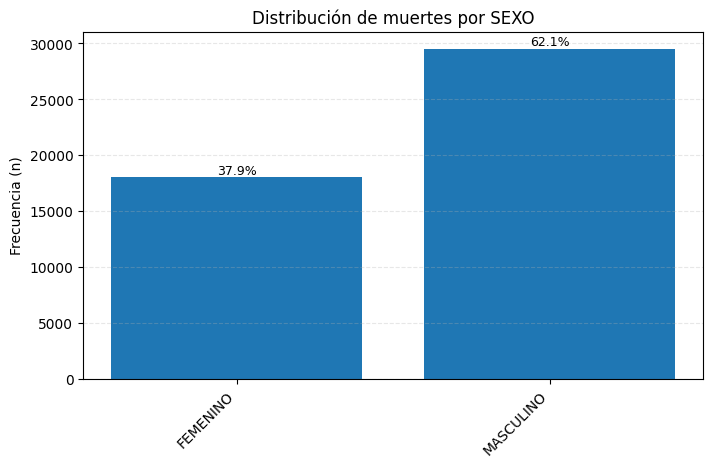

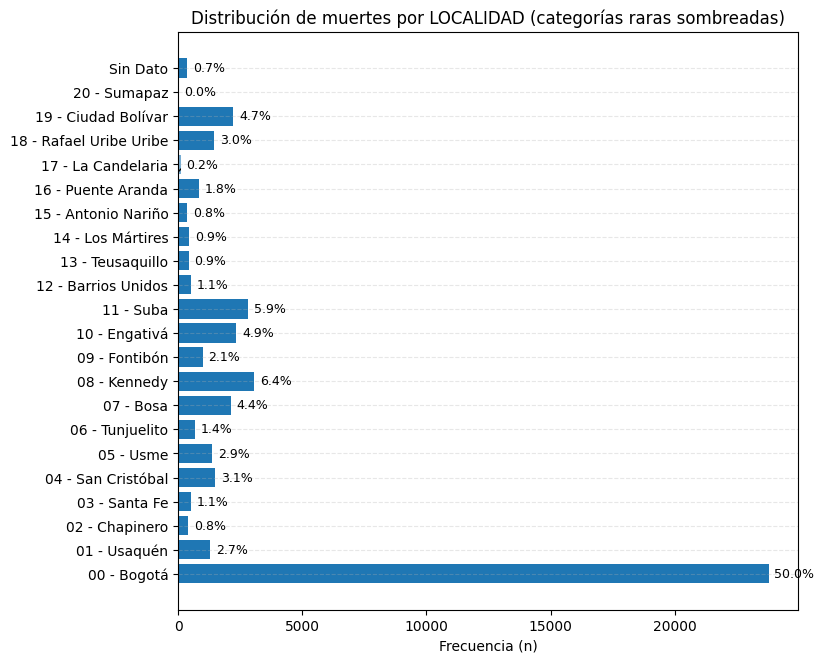

/tmp/ipython-input-2102086654.py:93: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_cat["EDAD_QUINQUENAL"]) and df_cat["EDAD_QUINQUENAL"].cat.ordered:
/tmp/ipython-input-2102086654.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right")


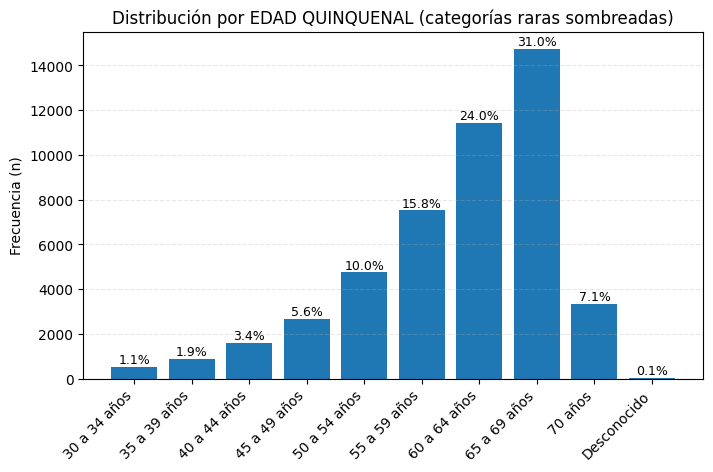

In [ ]:

def _plot_cat_barras(df, col, rare_pct=0.5, rare_min=30, titulo=None, ordenar=None, horizontal=False):
    s = df[col]
    vc = s.value_counts(dropna=False)
    total = vc.sum()
    labels = vc.index.to_series().astype("string").fillna("Desconocido")
    freq = vc.values
    pct = (vc.values / total) * 100

    valid_mask = labels != "Desconocido"
    rare_mask = np.zeros_like(freq, dtype=bool)
    if valid_mask.any():
        freq_valid = freq[valid_mask]
        total_valid = freq_valid.sum()
        if total_valid > 0:
            rare_mask_valid = ((freq_valid / total_valid) * 100 < rare_pct) | (freq_valid < rare_min)
            rare_mask[valid_mask] = rare_mask_valid

    if ordenar == "alfabetico":
        order_idx = np.argsort(labels.str.upper().values)
    elif ordenar == "frecuencia":
        order_idx = np.argsort(-freq)
    elif isinstance(ordenar, (list, tuple, pd.Index)):
        # respeta un orden dado (los que no estén en la lista van al final)
        order_map = {k:i for i,k in enumerate(ordenar)}
        order_idx = np.argsort([order_map.get(x, 10**9) for x in labels])
    else:
        order_idx = np.arange(len(labels))

    labels = labels.iloc[order_idx].tolist()
    freq = freq[order_idx]
    pct = pct[order_idx]
    rare_mask = rare_mask[order_idx]

    # Construir el gráfico
    fig, ax = plt.subplots(figsize=(8, 4.5 if not horizontal else max(4.5, 0.25*len(labels)+2)))
    if horizontal:
        bars = ax.barh(labels, freq)
        ax.set_xlabel("Frecuencia (n)")
    else:
        bars = ax.bar(labels, freq)
        ax.set_ylabel("Frecuencia (n)")

    for b, is_rare in zip(bars, rare_mask):
        if is_rare:
            b.set_alpha(0.6)
            b.set_hatch("//")

    for b, p in zip(bars, pct):
        if horizontal:
            ax.text(b.get_width() + max(freq)*0.01, b.get_y() + b.get_height()/2,
                    f"{p:.1f}%", va="center", fontsize=9)
        else:
            ax.text(b.get_x() + b.get_width()/2, b.get_height() + max(freq)*0.01,
                    f"{p:.1f}%", ha="center", fontsize=9, rotation=0)

    ax.set_title(titulo or f"Distribución de {col}")
    if not horizontal:
        ax.set_xticklabels(labels, rotation=45, ha="right")

    ax.grid(axis="y", linestyle="--", alpha=0.3)
    return fig

df_cat = res["data"]  # ya actualizado en tu bloque 3B
sexo_col = "SEXO_STD" if "SEXO_STD" in df_cat.columns else ("SEXO" if "SEXO" in df_cat.columns else None)
loc_col  = "LOCALIDAD_STD" if "LOCALIDAD_STD" in df_cat.columns else ("LOCALIDAD" if "LOCALIDAD" in df_cat.columns else None)

# 1) SEXO
if sexo_col:
    fig_sexo = _plot_cat_barras(
        df_cat, sexo_col, rare_pct=0.5, rare_min=30,
        titulo="Distribución de muertes por SEXO",
        ordenar="alfabetico", horizontal=False
    )
    res["figs"]["cat_SEXO"] = fig_sexo
    plt.show()

df_sin_bogota = df_cat[df_cat[loc_col] != "00 - Bogotá"]

# 2) LOCALIDAD
if loc_col:
    fig_loc = _plot_cat_barras(
        df_cat, loc_col, rare_pct=0.5, rare_min=30,
        titulo="Distribución de muertes por LOCALIDAD (categorías raras sombreadas)",
        ordenar="alfabetico", horizontal=True
    )
    res["figs"]["cat_LOCALIDAD"] = fig_loc
    plt.show()

# 3) EDAD_QUINQUENAL

if "EDAD_QUINQUENAL" in df_cat.columns:
    # Si la columna es categórica ordenada, respetamos su orden
    if pd.api.types.is_categorical_dtype(df_cat["EDAD_QUINQUENAL"]) and df_cat["EDAD_QUINQUENAL"].cat.ordered:
        orden_quin = df_cat["EDAD_QUINQUENAL"].cat.categories.tolist()
    else:
        # fallback: ordenar por rango textual
        orden_quin = sorted(df_cat["EDAD_QUINQUENAL"].astype("string").fillna("Desconocido").unique())

    fig_edadq = _plot_cat_barras(
        df_cat, "EDAD_QUINQUENAL", rare_pct=0.5, rare_min=30,
        titulo="Distribución por EDAD QUINQUENAL (categorías raras sombreadas)",
        ordenar=orden_quin, horizontal=False
    )
    res["figs"]["cat_EDAD_QUINQUENAL"] = fig_edadq
    plt.show()


In [ ]:
#OUTLIERS EN CATEGÓRICAS (SEXO / LOCALIDAD / EDAD_QUINQUENAL) --------
# Criterio: categoría atípica si <0.5% o <30 casos
rare_pct = 0.5    # porcentaje mínimo
rare_min = 30     # frecuencia absoluta mínima

df_cat = res["data"]

sexo_col = "SEXO_STD" if "SEXO_STD" in df_cat.columns else ("SEXO" if "SEXO" in df_cat.columns else None)
loc_col  = "LOCALIDAD_STD" if "LOCALIDAD_STD" in df_cat.columns else ("LOCALIDAD" if "LOCALIDAD" in df_cat.columns else None)
edadq_col = "EDAD_QUINQUENAL" if "EDAD_QUINQUENAL" in df_cat.columns else None

cat_cols = [c for c in [sexo_col, loc_col, edadq_col] if c]

def _detectar_outliers_categorica(serie: pd.Series, rare_pct=0.5, rare_min=30):
    s = serie.copy()
    n_total = int(s.shape[0])
    n_invalid = int(s.isna().sum())
    s_valid = s.dropna()
    vc_valid = s_valid.value_counts()
    n_valid = int(vc_valid.sum())

    # categorías atípicas (poco frecuentes)
    atipicas = pd.Series(dtype="int")
    if n_valid > 0:
        mask = (vc_valid / n_valid * 100 < rare_pct) | (vc_valid < rare_min)
        atipicas = vc_valid[mask].astype(int)

    resumen = {
        "n_total": n_total,
        "n_validos": n_valid,
        "n_invalidos": n_invalid,
        "n_categorias": int(vc_valid.shape[0]),
        "n_categorias_atipicas": int(atipicas.shape[0]),
        "criterio": f"atípica si <{rare_pct}% o <{rare_min} casos"
    }

    detalle = pd.DataFrame({
        "categoria": vc_valid.index.astype("string"),
        "frecuencia": vc_valid.values
    })
    detalle["porcentaje_valido"] = (detalle["frecuencia"] / max(n_valid,1) * 100).round(2)
    detalle["es_atipica"] = detalle["categoria"].isin(atipicas.index)

    return resumen, detalle, atipicas.index.tolist()

rows_resumen = []
detalles_all = []
flags_df = pd.DataFrame(index=df_cat.index)

for col in cat_cols:
    resumen, detalle, atipicas_lista = _detectar_outliers_categorica(df_cat[col], rare_pct, rare_min)
    rows_resumen.append({"variable": col, **resumen})

    det = detalle.copy()
    det.insert(0, "variable", col)
    detalles_all.append(det)

    # marcar fila a fila si la categoría de esa observación es atípica
    flags_df[f"{col}_ES_ATIPICA"] = df_cat[col].isin(atipicas_lista)

# Tablas de salida
res["tablas"]["outliers_categoricos_resumen"] = (
    pd.DataFrame(rows_resumen)
      .set_index("variable")[["n_total","n_validos","n_invalidos","n_categorias",
                              "n_categorias_atipicas","criterio"]]
)

res["tablas"]["outliers_categoricos_detalle"] = (
    pd.concat(detalles_all, ignore_index=True)
    if len(detalles_all) else
    pd.DataFrame(columns=["variable","categoria","frecuencia","porcentaje_valido","es_atipica"])
)

res["tablas"]["outliers_categoricos_flags"] = flags_df

# Initialize res["textos"] if it doesn't exist
if "textos" not in res:
    res["textos"] = {}


print("Resumen de valores atípicos en variables categóricas ")
display(res["tablas"]["outliers_categoricos_resumen"])

print("\n Tabla de categorías marcadas como atípicas ")
display(res["tablas"]["outliers_categoricos_detalle"].head(30))  # muestra las primeras 30

display(res["tablas"]["outliers_categoricos_flags"].head(10))



Resumen de valores atípicos en variables categóricas 


n_total  n_validos  n_invalidos  n_categorias  \
variable                                                         
SEXO               47542      47542            0             2   
LOCALIDAD          47542      47542            0            22   
EDAD_QUINQUENAL    47542      47542            0            10   

                 n_categorias_atipicas                      criterio  
variable                                                              
SEXO                                 0  atípica si <0.5% o <30 casos  
LOCALIDAD                            2  atípica si <0.5% o <30 casos  
EDAD_QUINQUENAL                      1  atípica si <0.5% o <30 casos


 Tabla de categorías marcadas como atípicas 


variable                categoria  frecuencia  porcentaje_valido  \
0              SEXO                MASCULINO       29536              62.13   
1              SEXO                 FEMENINO       18006              37.87   
2         LOCALIDAD              00 - Bogotá       23771              50.00   
3         LOCALIDAD             08 - Kennedy        3061               6.44   
4         LOCALIDAD                11 - Suba        2819               5.93   
5         LOCALIDAD            10 - Engativá        2342               4.93   
6         LOCALIDAD      19 - Ciudad Bolívar        2225               4.68   
7         LOCALIDAD                07 - Bosa        2111               4.44   
8         LOCALIDAD       04 - San Cristóbal        1478               3.11   
9         LOCALIDAD  18 - Rafael Uribe Uribe        1448               3.05   
10        LOCALIDAD                05 - Usme        1367               2.88   
11        LOCALIDAD             01 - Usaquén        1292               2.72   
12        LOCALIDAD            09 - Fontibón         984               2.07   
13        LOCALIDAD       16 - Puente Aranda         842               1.77   
14        LOCALIDAD          06 - Tunjuelito         678               1.43   
15        LOCALIDAD            03 - Santa Fe         526               1.11   
16        LOCALIDAD      12 - Barrios Unidos         500               1.05   
17        LOCALIDAD        14 - Los Mártires         445               0.94   
18        LOCALIDAD         13 - Teusaquillo         420               0.88   
19        LOCALIDAD           02 - Chapinero         393               0.83   
20        LOCALIDAD      15 - Antonio Nariño         375               0.79   
21        LOCALIDAD                 Sin Dato         351               0.74   
22        LOCALIDAD       17 - La Candelaria         103               0.22   
23        LOCALIDAD             20 - Sumapaz          11               0.02   
24  EDAD_QUINQUENAL             65 a 69 años       14750              31.03   
25  EDAD_QUINQUENAL             60 a 64 años       11428              24.04   
26  EDAD_QUINQUENAL             55 a 59 años        7524              15.83   
27  EDAD_QUINQUENAL             50 a 54 años        4754              10.00   
28  EDAD_QUINQUENAL                  70 años        3352               7.05   
29  EDAD_QUINQUENAL             45 a 49 años        2674               5.62   

    es_atipica  
0        False  
1        False  
2        False  
3        False  
4        False  
5        False  
6        False  
7        False  
8        False  
9        False  
10       False  
11       False  
12       False  
13       False  
14       False  
15       False  
16       False  
17       False  
18       False  
19       False  
20       False  
21       False  
22        True  
23        True  
24       False  
25       False  
26       False  
27       False  
28       False  
29       False

SEXO_ES_ATIPICA  LOCALIDAD_ES_ATIPICA  EDAD_QUINQUENAL_ES_ATIPICA
0            False                 False                       False
1            False                 False                       False
2            False                 False                       False
3            False                 False                       False
4            False                 False                       False
5            False                 False                       False
6            False                 False                       False
7            False                 False                       False
8            False                 False                       False
9            False                 False                       False

### **5.4. Datos Inconsistentes**
---
Frente a inconsistencias en los datos, es importante analizar cómo estas discrepancias podrían afectar la comparabilidad y comprensión de la información.

* ¿Cómo se identificaron las inconsistencias en los datos?

Las inconsistencias se identificaron aplicando reglas de validación sistemáticas sobre cada variable crítica del conjunto de datos. Para ello se diseñaron controles de:

Dominio de valores permitidos: por ejemplo, se verificó que la variable SEXO_STD únicamente contuviera los valores “F” o “M”, y que no existieran registros con valores no mapeados desde la columna original SEXO.

Rangos plausibles: se evaluó que EDAD_FALLECIDO estuviera en un intervalo lógico para seres humanos (0 a 120 años), que ANO se encontrara entre 2015 y 2025, y que MES estuviera dentro de 1 a 12.

Concordancia entre variables derivadas y su base: se contrastó que EDAD_QUINQUENAL correspondiera exactamente al grupo calculado a partir de EDAD_FALLECIDO, de modo que no existieran asignaciones erróneas en los intervalos etarios.

Formatos normativos: en el caso de CIE10_BASICA, se validó que los códigos tuvieran la estructura esperada (iniciando con “I” seguido de dos dígitos), y que el grupo asignado fuera coherente con la clasificación oficial de CIE-10.


* ¿Las inconsistencias son lo suficientemente significativas como para justificar una estandarización?

Sí. Aunque algunas inconsistencias pueden ser casos aislados, en el contexto de un análisis epidemiológico y demográfico incluso un número reducido puede impactar la interpretación:

Un código CIE-10 mal escrito puede excluir un caso de la causa de muerte correcta, alterando las proporciones de enfermedad isquémica, cerebrovascular o hipertensiva.

* ¿Cómo se pueden homogeneizar unidades y formatos para garantizar coherencia en el análisis?

uméricas: convertir EDAD_FALLECIDO, ANO y MES a tipo numérico entero, truncando o asignando NaN cuando estén fuera de rango definido.

Categóricas: aplicar catálogos estandarizados (ejemplo: SEXO_STD en “F”/“M”, LOCALIDAD_STD en nombres oficiales en mayúsculas sin acentos).

Variables derivadas: recalcular EDAD_QUINQUENAL directamente desde la edad, de manera programática, para que no dependa de asignaciones manuales.

Clasificación de causas de muerte: garantizar que todos los códigos CIE10_BASICA cumplan un formato uniforme y se agrupen con una única función que siga la normativa de la OMS.

Fechas y periodos: asegurar consistencia entre ANO y MES, por ejemplo, no permitir que un registro tenga mes “0” o “13”.

* ¿Qué estrategias se implementaron para abordar las inconsistencias y asegurar la coherencia?

Detección temprana: se marcaron las observaciones con posibles inconsistencias mediante banderas lógicas (True/False), sin alterar los datos originales.

Corrección automática: se aplicaron transformaciones directas en los casos donde existía una regla clara (ejemplo: recálculo de EDAD_QUINQUENAL, truncamiento de edades fuera de rango, normalización de acentos y mayúsculas en LOCALIDAD).

Estandarización de catálogos: se definieron equivalencias previas (ej. “femenina” → “F”), evitando que el mismo concepto aparezca bajo distintas formas.

Documentación y trazabilidad: cada regla aplicada quedó registrada en una tabla de resumen, permitiendo justificar y reproducir el tratamiento en cualquier momento.

Separación de etapas: las inconsistencias se trabajaron en esta sección, mientras que duplicados y faltantes se abordaron en etapas anteriores, lo cual da claridad metodológica.

* ¿Se establecieron reglas de validación específicas para garantizar la consistencia?

Sí, se implementó un conjunto explícito de reglas de validación que incluyen:

SEXO_STD únicamente debe tomar valores válidos (F/M).

LOCALIDAD_STD debe existir siempre que LOCALIDAD tenga un valor.

EDAD_FALLECIDO debe ser numérica y estar entre 0 y 120 años.

EDAD_QUINQUENAL debe coincidir con la edad base.

ANO debe estar dentro del rango de estudio (2015–2025).

MES debe estar en el intervalo 1–12.

CIE10_BASICA debe cumplir con el formato y agruparse en categorías válidas (I10–I15, I20–I25, I60–I69, otras ECV).

In [ ]:

# Usa df_std si existe; si no, usa df
DF_BASE = df_std if 'df_std' in globals() else df
res = res if 'res' in globals() else {"tablas": {}, "figs": {}, "textos": {}}

# Rango plausibilidad y catálogos mínimos
RANGO_ANO = (2015, 2025)
RANGO_MES = (1, 12)
RANGO_EDAD = (0, 120)
SET_SEXO_VAL = {"F", "M"}

# Quinquenios
_BINS_Q = list(range(0, 90, 5)) + [200]
_LABELS_Q = [f"{i} a {i+4} años" for i in range(0,85,5)] + ["85 y más"]

def _bin_edad_quinquenal(ed):
    if pd.isna(ed):
        return np.nan
    try: ed = float(ed)
    except: return np.nan
    if ed < _BINS_Q[0] or ed > _BINS_Q[-1]:
        return np.nan
    for i in range(len(_BINS_Q)-1):
        lo, hi = _BINS_Q[i], _BINS_Q[i+1]
        if (i==0 and ed >= lo and ed <= hi) or (i>0 and ed > lo and ed <= hi):
            return _LABELS_Q[i]
    return np.nan

def _map_cie10_grupo(codigo: object) -> str:
    s = str(codigo).strip().upper()
    if not s or not s.startswith("I"):
        return "ECV otras (Ixx)"
    m = re.match(r"^I(\d{2})", s)
    if not m:
        return "ECV otras (Ixx)"
    n = int(m.group(1))
    if 10 <= n <= 15: return "ECV hipertensivas (I10–I15)"
    if 20 <= n <= 25: return "ECV isquémicas (I20–I25)"
    if 60 <= n <= 69: return "ECV cerebrovasculares (I60–I69)"
    return "ECV otras (Ixx)"

# Contenedores
flags = pd.DataFrame(index=DF_BASE.index)
detalles = []
resumen_reglas = []

def _add_detalle(regla, idxs, info_dict_list):
    for i, info in zip(idxs, info_dict_list):
        row = {"regla": regla, "index": i}
        row.update(info)
        detalles.append(row)

def _add_resumen(regla, n_afectados):
    resumen_reglas.append({"regla": regla, "n_registros": int(n_afectados)})

def _finalize_rule(rule_name, mask, extra_infos):
    n = int(mask.sum())
    flags[rule_name] = mask
    if n > 0:
        idxs = DF_BASE.index[mask]
        _add_detalle(rule_name, idxs, extra_infos)
    _add_resumen(rule_name, n)



# SEXO_STD inválido
if "SEXO_STD" in DF_BASE.columns:
    sex = DF_BASE["SEXO_STD"]
    mask = ~(sex.isna() | sex.isin(SET_SEXO_VAL))
    infos = [{"SEXO_STD": sex.loc[i]} for i in DF_BASE.index[mask]]
    _finalize_rule("SEXO_STD_invalido", mask, infos)

# SEXO no mapeado a STD
if "SEXO" in DF_BASE.columns and "SEXO_STD" in DF_BASE.columns:
    s_orig = DF_BASE["SEXO"].astype("string")
    s_std  = DF_BASE["SEXO_STD"]
    mask = s_std.isna() & s_orig.notna()
    infos = [{"SEXO": s_orig.loc[i], "SEXO_STD": s_std.loc[i]} for i in DF_BASE.index[mask]]
    _finalize_rule("SEXO_no_mapeado_a_STD", mask, infos)

# LOCALIDAD no mapeada a STD
if "LOCALIDAD" in DF_BASE.columns and "LOCALIDAD_STD" in DF_BASE.columns:
    l_orig = DF_BASE["LOCALIDAD"].astype("string")
    l_std  = DF_BASE["LOCALIDAD_STD"]
    mask = l_std.isna() & l_orig.notna()
    infos = [{"LOCALIDAD": l_orig.loc[i], "LOCALIDAD_STD": l_std.loc[i]} for i in DF_BASE.index[mask]]
    _finalize_rule("LOCALIDAD_no_mapeada_a_STD", mask, infos)

# EDAD_FALLECIDO fuera de rango
if "EDAD_FALLECIDO" in DF_BASE.columns:
    edad_num = pd.to_numeric(DF_BASE["EDAD_FALLECIDO"], errors="coerce")
    mask = (edad_num < RANGO_EDAD[0]) | (edad_num > RANGO_EDAD[1])
    infos = [{"EDAD_FALLECIDO": DF_BASE["EDAD_FALLECIDO"].loc[i]} for i in DF_BASE.index[mask]]
    _finalize_rule("EDAD_FALLECIDO_fuera_rango", mask, infos)

# EDAD_QUINQUENAL consistente con edad
if "EDAD_FALLECIDO" in DF_BASE.columns and "EDAD_QUINQUENAL" in DF_BASE.columns:
    edad_num = pd.to_numeric(DF_BASE["EDAD_FALLECIDO"], errors="coerce")
    esperado = edad_num.map(_bin_edad_quinquenal)
    actual = DF_BASE["EDAD_QUINQUENAL"].astype("string")
    mask = ~(actual.isna() & pd.Series(esperado).isna()) & (actual != pd.Series(esperado, dtype="string"))
    infos = [{"EDAD_FALLECIDO": DF_BASE["EDAD_FALLECIDO"].loc[i],
              "EDAD_QUINQUENAL": DF_BASE["EDAD_QUINQUENAL"].loc[i],
              "EDAD_QUINQUENAL_esperada": _bin_edad_quinquenal(DF_BASE["EDAD_FALLECIDO"].loc[i])}
             for i in DF_BASE.index[mask]]
    _finalize_rule("Edad_quinq_inconsistente", mask, infos)

# ANO fuera de rango
if "ANO" in DF_BASE.columns:
    ano_num = pd.to_numeric(DF_BASE["ANO"], errors="coerce")
    mask = (ano_num < RANGO_ANO[0]) | (ano_num > RANGO_ANO[1])
    infos = [{"ANO": DF_BASE["ANO"].loc[i]} for i in DF_BASE.index[mask]]
    _finalize_rule("ANO_fuera_rango", mask, infos)

if "MES" in DF_BASE.columns:
    mes_num = pd.to_numeric(DF_BASE["MES"], errors="coerce")
    mask = (mes_num < RANGO_MES[0]) | (mes_num > RANGO_MES[1])
    infos = [{"MES": DF_BASE["MES"].loc[i]} for i in DF_BASE.index[mask]]
    _finalize_rule("MES_fuera_rango", mask, infos)

if "CIE10_BASICA" in DF_BASE.columns:
    c = DF_BASE["CIE10_BASICA"].astype("string")
    mask_fmt = ~c.str.match(r"^I[A-Z0-9]{2,}", na=False)
    infos_fmt = [{"CIE10_BASICA": c.loc[i]} for i in DF_BASE.index[mask_fmt]]
    _finalize_rule("CIE10_formato_inusual", mask_fmt, infos_fmt)


res["tablas"]["inconsistencias_flags"] = flags
res["tablas"]["inconsistencias_detalle"] = pd.DataFrame(detalles)
res["tablas"]["inconsistencias_resumen"] = pd.DataFrame(resumen_reglas)

from IPython.display import display
print("=== RESUMEN DE INCONSISTENCIAS ===")
display(res["tablas"]["inconsistencias_resumen"])

print("\n=== DETALLE DE INCONSISTENCIAS (primeras 30) ===")
display(res["tablas"]["inconsistencias_detalle"].head(30))

print("\n=== BANDERAS POR FILA (primeras 10) ===")
display(res["tablas"]["inconsistencias_flags"].head(10))


=== RESUMEN DE INCONSISTENCIAS ===


regla  n_registros
0           SEXO_STD_invalido            0
1       SEXO_no_mapeado_a_STD            0
2  LOCALIDAD_no_mapeada_a_STD          351
3  EDAD_FALLECIDO_fuera_rango            0
4    Edad_quinq_inconsistente        10994
5             ANO_fuera_rango            0
6             MES_fuera_rango            0
7       CIE10_formato_inusual            0


=== DETALLE DE INCONSISTENCIAS (primeras 30) ===


regla  index LOCALIDAD  LOCALIDAD_STD  \
0   LOCALIDAD_no_mapeada_a_STD  24810  Sin Dato            NaN   
1   LOCALIDAD_no_mapeada_a_STD  24816  Sin Dato            NaN   
2   LOCALIDAD_no_mapeada_a_STD  24819  Sin Dato            NaN   
3   LOCALIDAD_no_mapeada_a_STD  24934  Sin Dato            NaN   
4   LOCALIDAD_no_mapeada_a_STD  24946  Sin Dato            NaN   
5   LOCALIDAD_no_mapeada_a_STD  24953  Sin Dato            NaN   
6   LOCALIDAD_no_mapeada_a_STD  24969  Sin Dato            NaN   
7   LOCALIDAD_no_mapeada_a_STD  25110  Sin Dato            NaN   
8   LOCALIDAD_no_mapeada_a_STD  25395  Sin Dato            NaN   
9   LOCALIDAD_no_mapeada_a_STD  25509  Sin Dato            NaN   
10  LOCALIDAD_no_mapeada_a_STD  25958  Sin Dato            NaN   
11  LOCALIDAD_no_mapeada_a_STD  26161  Sin Dato            NaN   
12  LOCALIDAD_no_mapeada_a_STD  26235  Sin Dato            NaN   
13  LOCALIDAD_no_mapeada_a_STD  26408  Sin Dato            NaN   
14  LOCALIDAD_no_mapeada_a_STD  26490  Sin Dato            NaN   
15  LOCALIDAD_no_mapeada_a_STD  26706  Sin Dato            NaN   
16  LOCALIDAD_no_mapeada_a_STD  27175  Sin Dato            NaN   
17  LOCALIDAD_no_mapeada_a_STD  27226  Sin Dato            NaN   
18  LOCALIDAD_no_mapeada_a_STD  27253  Sin Dato            NaN   
19  LOCALIDAD_no_mapeada_a_STD  27347  Sin Dato            NaN   
20  LOCALIDAD_no_mapeada_a_STD  27350  Sin Dato            NaN   
21  LOCALIDAD_no_mapeada_a_STD  27567  Sin Dato            NaN   
22  LOCALIDAD_no_mapeada_a_STD  27657  Sin Dato            NaN   
23  LOCALIDAD_no_mapeada_a_STD  27659  Sin Dato            NaN   
24  LOCALIDAD_no_mapeada_a_STD  27675  Sin Dato            NaN   
25  LOCALIDAD_no_mapeada_a_STD  27679  Sin Dato            NaN   
26  LOCALIDAD_no_mapeada_a_STD  27687  Sin Dato            NaN   
27  LOCALIDAD_no_mapeada_a_STD  27692  Sin Dato            NaN   
28  LOCALIDAD_no_mapeada_a_STD  28400  Sin Dato            NaN   
29  LOCALIDAD_no_mapeada_a_STD  28439  Sin Dato            NaN   

    EDAD_FALLECIDO EDAD_QUINQUENAL EDAD_QUINQUENAL_esperada  
0              NaN             NaN                      NaN  
1              NaN             NaN                      NaN  
2              NaN             NaN                      NaN  
3              NaN             NaN                      NaN  
4              NaN             NaN                      NaN  
5              NaN             NaN                      NaN  
6              NaN             NaN                      NaN  
7              NaN             NaN                      NaN  
8              NaN             NaN                      NaN  
9              NaN             NaN                      NaN  
10             NaN             NaN                      NaN  
11             NaN             NaN                      NaN  
12             NaN             NaN                      NaN  
13             NaN             NaN                      NaN  
14             NaN             NaN                      NaN  
15             NaN             NaN                      NaN  
16             NaN             NaN                      NaN  
17             NaN             NaN                      NaN  
18             NaN             NaN                      NaN  
19             NaN             NaN                      NaN  
20             NaN             NaN                      NaN  
21             NaN             NaN                      NaN  
22             NaN             NaN                      NaN  
23             NaN             NaN                      NaN  
24             NaN             NaN                      NaN  
25             NaN             NaN                      NaN  
26             NaN             NaN                      NaN  
27             NaN             NaN                      NaN  
28             NaN             NaN                      NaN  
29             NaN             NaN                      NaN


=== BANDERAS POR FILA (primeras 10) ===


SEXO_STD_invalido  SEXO_no_mapeado_a_STD  LOCALIDAD_no_mapeada_a_STD  \
0              False                  False                       False   
1              False                  False                       False   
2              False                  False                       False   
3              False                  False                       False   
4              False                  False                       False   
5              False                  False                       False   
6              False                  False                       False   
7              False                  False                       False   
8              False                  False                       False   
9              False                  False                       False   

   EDAD_FALLECIDO_fuera_rango  Edad_quinq_inconsistente  ANO_fuera_rango  \
0                       False                     False            False   
1                       False                     False            False   
2                       False                     False            False   
3                       False                     False            False   
4                       False                     False            False   
5                       False                     False            False   
6                       False                     False            False   
7                       False                     False            False   
8                       False                     False            False   
9                       False                     False            False   

   MES_fuera_rango  CIE10_formato_inusual  
0            False                  False  
1            False                  False  
2            False                  False  
3            False                  False  
4            False                  False  
5            False                  False  
6            False                  False  
7            False                  False  
8            False                  False  
9            False                  False

### **5.5. Datos corruptos**
---
En la detección de datos corruptos, pregunte si hay posibles errores de entrada o problemas de transferencia que podrían haber afectado la integridad de los datos.
* ¿Cómo se determinó la presencia de datos corruptos en el conjunto de datos?
* ¿Qué medidas se tomaron para corregir o eliminar los datos corruptos?
* ¿Hubo casos en los que la corrupción de datos no pudo ser manejada y cómo se justificó esa decisión?

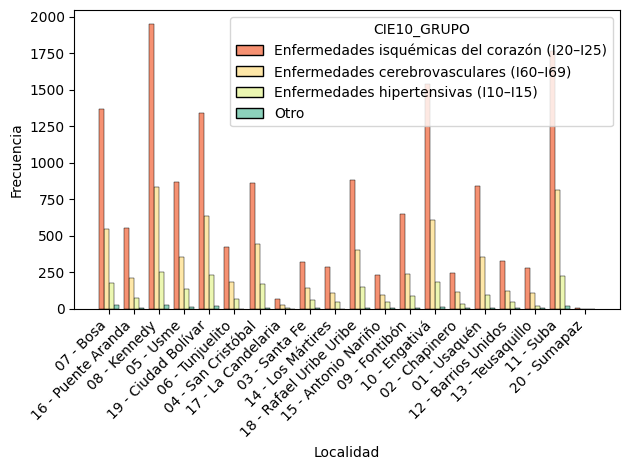

In [ ]:
import seaborn as sns

df_final = df.copy()

df_final['CIE10'] = df_final.CIE10_BASICA.str[1:3].astype(np.int64)
df_final['CIE10_GRUPO'] = df_final['CIE10'].apply(clasificar_cie10)

df_datos_corruptos = res["tablas"]["inconsistencias_detalle"]
localidad_corruptos = df_datos_corruptos[(df_datos_corruptos["regla"] == 'LOCALIDAD_no_mapeada_a_STD' )]["index"]
df_final = df_final.drop(index= localidad_corruptos)

# Histograma SIN Bogotá
df_sin_bogota = df_final[df_final["LOCALIDAD"] != "00 - Bogotá"]

histogram_localidad = sns.histplot(
    data=df_sin_bogota,
    x="LOCALIDAD",
    hue="CIE10_GRUPO",
    palette="Spectral",
    multiple = 'dodge',
    shrink=0.8
)

# Rotar etiquetas de X
plt.xticks(rotation=45, ha="right")
plt.xlabel("Localidad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

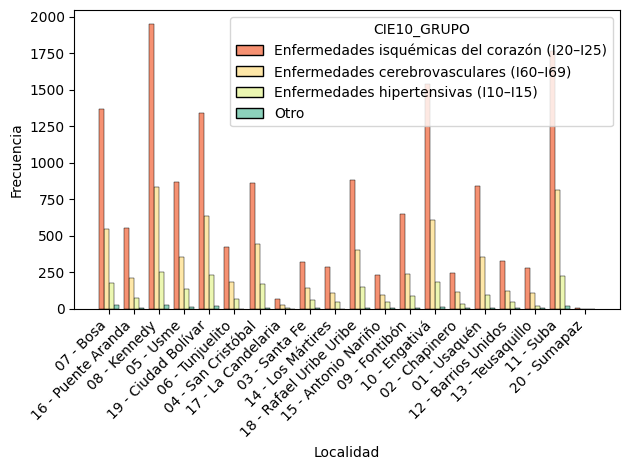

In [ ]:
df_final = df.copy()

df_final['CIE10'] = df_final.CIE10_BASICA.str[1:3].astype(np.int64)
df_final['CIE10_GRUPO'] = df_final['CIE10'].apply(clasificar_cie10)

df_datos_corruptos = res["tablas"]["inconsistencias_detalle"]
localidad_corruptos = df_datos_corruptos[(df_datos_corruptos["regla"] == 'LOCALIDAD_no_mapeada_a_STD' )]["index"]
df_final = df_final.drop(index= localidad_corruptos)
'''
histogram_localidad = sns.FacetGrid(data = df_final[df_final["LOCALIDAD"] != "00 - Bogotá"], row="CIE10_GRUPO", palette='cool',hue="CIE10_GRUPO")
histogram_localidad.map(plt.hist ,'LOCALIDAD')
'''
histogram_localidad = sns.histplot( data= df_final[df_final["LOCALIDAD"] != "00 - Bogotá"], x="LOCALIDAD", hue= 'CIE10_GRUPO',palette="Spectral",multiple='dodge',shrink=0.8)
# Rotar etiquetas de X
plt.xticks(rotation=45, ha="right")
plt.xlabel("Localidad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()



De esta forma podemos realizar un verdadero análisis de las defunciones respecto a las localidades presentes en nuestro DataFrame, a partir de aquí logramos evidenciar que los datos corruptos, inconsistentes de la sección anterior ya no son tomados en cuenta en esta gráfica, gracias a que las categorías presentes en la columna "LOCALIDAD" son visibles totalmente en el histograma por lo cual los datos que se encontraron con valores nulos o corruptos ya fueron depurados de la base de datos a trabajar.

### **5.6. Selección de datos**
---
En la selección de datos, reflexione sobre las variables que son realmente relevantes para sus objetivos de análisis.
* ¿Qué criterios se utilizaron para seleccionar los datos relevantes para el análisis?
* ¿Se aplicaron técnicas de muestreo o filtrado para reducir el tamaño del conjunto de datos?
* ¿Cómo se justificó la inclusión o exclusión de ciertas variables en la selección de datos?

En la selección de datos se definieron criterios específicos según el objetivo del análisis. Para los estudios enfocados en las diferencias por sectores de la ciudad, se decidió utilizar la base de datos excluyendo la categoría “00 - Bogotá” en la columna LOCALIDAD, ya que esta agrupa a toda la ciudad y no aporta información desagregada a nivel local. De esta manera se pueden observar con mayor claridad las particularidades de cada localidad.

Por otro lado, para análisis relacionados directamente con las enfermedades, se utilizó la base de datos completa, dado que ya se realizó un proceso de limpieza que eliminó los datos corruptos y permitió asegurar la calidad de la información.

Las variables seleccionadas son aquellas que permiten realizar un análisis de la distribución de muertes por enfermedad y explorar sus principales relaciones, en especial con respecto a la edad, la localidad y el grupo de diagnóstico (CIE10).

En este proceso se excluyeron tres variables:


*   EPS, porque es un dato administrativo que no tiene un efecto directo sobre la ocurrencia de las enfermedades o la mortalidad, sino que se relaciona con la gestión del sistema de salud. Mantenerla podría introducir ruido en el análisis y desviar la interpretación hacia aspectos organizativos que no son relevantes para la exploración epidemiológica.
*   SUBRED, ya que corresponde únicamente a la cardinalidad geográfica (norte, sur, etc.), información redundante que no aporta un valor diferencial frente a la variable LOCALIDAD, la cual ya contiene el detalle territorial necesario.

*   MIGRANTES, porque su inclusión no contribuye al objetivo del análisis de la mortalidad por enfermedades, y podría desviar la atención hacia un aspecto sociodemográfico que no es central en este estudio.











In [ ]:
df_final.dtypes

ANO                          int64
MES                          int64
EPS                         object
SUBRED                      object
SEXO                        object
MIGRANTE                    object
REGIMEN_SEGURIDAD_SOCIAL    object
EDAD_FALLECIDO               int64
EDAD_QUINQUENAL             object
CIE10_AGRUPADA              object
CIE10_BASICA                object
LOCALIDAD                   object
CIE10                        int64
CIE10_GRUPO                 object
dtype: object

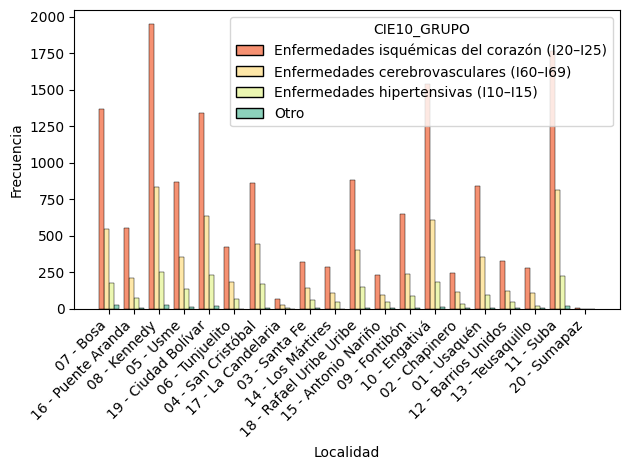

In [ ]:
df_final= df_final.drop(["EPS", "SUBRED","MIGRANTE"], axis=1)
histogram_localidad = sns.histplot( data= df_final[df_final["LOCALIDAD"] != "00 - Bogotá"], x="LOCALIDAD" ,hue= 'CIE10_GRUPO',multiple='dodge',palette="Spectral", shrink=0.8)
# Rotar etiquetas de X
plt.xticks(rotation=45, ha="right")
plt.xlabel("Localidad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


Respecto a la variable EDAD, se identificaron algunos datos atípicos. Estos no fueron considerados como errores o datos corruptos, sino como casos especiales de relevancia, ya que reflejan situaciones particulares (por ejemplo, muertes en edades extremas). Dichos valores fueron evaluados mediante representaciones gráficas como boxplots, además del análisis de celdas con datos nulos o con posibles errores de escritura. Con base en este proceso, se decidió mantener los valores atípicos para no perder información valiosa que aporta al entendimiento integral de la distribución de la mortalidad.

([0, 1, 2, 3],
 [Text(0, 0, 'Enfermedades isquémicas del corazón (I20–I25)'),
  Text(1, 0, 'Enfermedades cerebrovasculares (I60–I69)'),
  Text(2, 0, 'Enfermedades hipertensivas (I10–I15)'),
  Text(3, 0, 'Otro')])

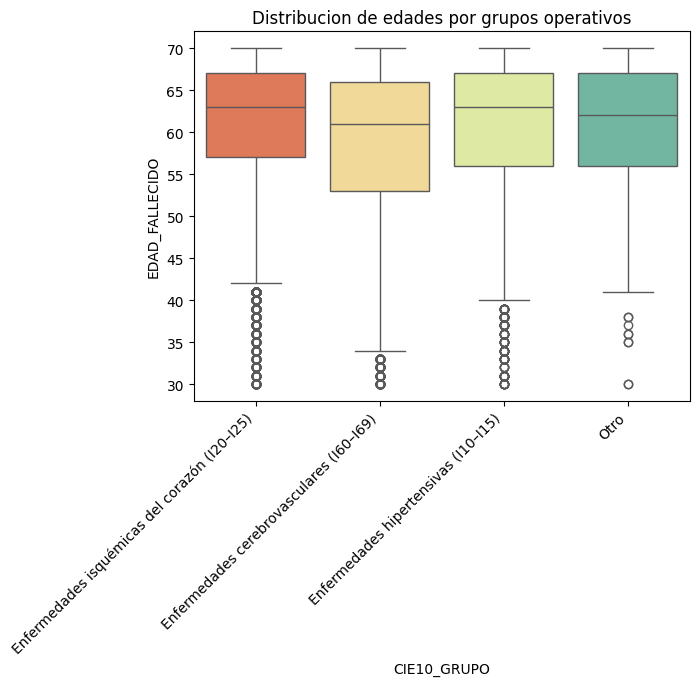

In [ ]:
EDAD_boxplot = sns.boxplot(data=df_final , x = "CIE10_GRUPO" , y = "EDAD_FALLECIDO", palette='Spectral', hue="CIE10_GRUPO")
EDAD_boxplot.set_title("Distribucion de edades por grupos operativos")
plt.xticks(rotation=45, ha="right")

In [ ]:
print("Variables para el analisis de enfermedades Cardiocerebrovasculares por su distribucion en Bogota")
df_final.dtypes

Variables para el analisis de enfermedades Cardiocerebrovasculares por su distribucion en Bogota


ANO                          int64
MES                          int64
SEXO                        object
REGIMEN_SEGURIDAD_SOCIAL    object
EDAD_FALLECIDO               int64
EDAD_QUINQUENAL             object
CIE10_AGRUPADA              object
CIE10_BASICA                object
LOCALIDAD                   object
CIE10                        int64
CIE10_GRUPO                 object
dtype: object

## **6. Análisis y resultados**


Al adentrarse en el análisis de datos, es crucial adoptar un enfoque estratégico que responda a las preguntas de planteadas en el proyecto. La selección de variables para estudio requiere una evaluación cuidadosa de los objetivos específicos del proyecto, priorizando aquellas que se consideren fundamentales para obtener resultados significativos.

A lo largo de esta entrega, trate busque responder las siguientes preguntas

- ¿Cómo se aplicaron conceptos específicos de estadística descriptiva e inferencial en el análisis de datos y cuál fue el enfoque utilizado para interpretar los resultados de manera precisa?

Se emplearon estadísticos descriptivos como distribuciones de frecuencias, proporciones, tasas por 100.000 habitantes, medidas de tendencia central y porcentajes sumatorios a efectos de describir la mortalidad por ECV a nivel de sexo, edad del fallecido, localidad de residencia y causas CIE-10.
Adicionalmente, realizamos un ligero análisis inferencial a través de principios de comparaciones de medias/proportiones y tests de significancia. El enfoque fue mixto: descriptivo al mostrar el panorama general y analítico.

- ¿Cómo se interpretaron los resultados de la estadística descriptiva y qué conclusiones se pueden extraer?

La mortalidad por ECV presenta un patrón territorial heterogéneo, con localidades como Kennedy, Suba y Ciudad Bolívar superando consistentemente el promedio distrital en tasas por 100.000 habitantes.

Existe un sesgo por sexo y edad: los hombres muestran mayor mortalidad prematura (30–70 años), mientras que en mujeres se concentran más casos en edades avanzadas.

En cuanto a la composición de causas, las isquémicas (I20–I25) representan la mayor proporción, seguidas de cerebrovasculares (I60–I69). Las hipertensivas (I10–I15) son menores en número, pero se concentran en ciertas localidades específicas.

Estas observaciones sugieren que la mortalidad no se distribuye homogéneamente y que las políticas deben adaptarse a los perfiles demográficos y territoriales.

- ¿Cómo se relacionan los resultados del análisis de datos con los objetivos y preguntas planteadas inicialmente?

Se evidenciaron patrones territoriales y demográficos (objetivo 1).

Se analizó la variación en la composición de causas por sexo y localidad (objetivo 2).

Se identificaron localidades con exceso de mortalidad respecto al promedio de Bogotá, cumpliendo el objetivo de priorización territorial (objetivo 3).

- ¿Qué implicaciones prácticas tienen los hallazgos y cómo podrían influir en la toma de decisiones?

Priorización territorial: enfocar programas de control de hipertensión y prevención de infartos en localidades con tasas altas.

Enfoque diferencial: diseñar campañas de prevención específicas por sexo y grupo etario (ej. en hombres jóvenes-adultos prevenir factores de riesgo; en mujeres mayores reforzar el acceso a diagnóstico oportuno).

Optimización de recursos: asignar recursos hospitalarios y de rutas de ictus hacia las subredes donde el riesgo es significativamente mayor.

Monitoreo y evaluación: estandarizar este pipeline como un sistema de vigilancia anual, facilitando la rendición de cuentas y la comparación entre periodos y territorios.

### **6.1. Análisis de correlaciones**
---

- Analice la posible existencia de relaciones entre las variables, utilizando medidas de correlación o visualizaciones pertinentes.

Las variables analizadas no son todas numéricas, por lo que la correlación de Pearson no resulta adecuada; en su lugar se aplicó Cramér’s V para medir asociaciones entre las categóricas (LOCALIDAD, SEXO y CIE10_AGRUPADA), visualizadas en una matriz de correlación que permite identificar dependencias moderadas o débiles entre ellas.

- Detecte la presencia de redundancias entre las variables, con el objetivo de facilitar su posterior eliminación o selección en el análisis.

Haciendo una matriz de correlacción que no es necesario mostrar, se detectó redundancia entre EDAD_FALLECIDO y EDAD_QUINQUENAL, ya que ambas representan la misma información en diferentes formatos. Para análisis posteriores se recomienda mantener solo una (por ejemplo, la edad continua EDAD_FALLECIDO, que ofrece mayor precisión).
No se identificaron redundancias en las demás variables: LOCALIDAD, SEXO y CIE10_AGRUPADA aportan dimensiones independientes y complementarias (territorial, demográfica y clínica).

- ¿Cuáles fueron las variables seleccionadas para el análisis de correlaciones, y cómo se eligieron en función de los objetivos del proyecto?

Numéricas: EDAD_FALLECIDO, ANO, MES.

Categóricas: SEXO, CIE10_AGRUPADA.

Estas variables fueron seleccionadas porque permiten responder de manera directa a los objetivos del proyecto: caracterizar patrones demográficos (edad, sexo), evaluar la composición clínica de la mortalidad (causas CIE-10) y explorar tendencias en el tiempo (año, mes).


/tmp/ipython-input-3545088942.py:43: UserWarning: 
The palette list has fewer values (20) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


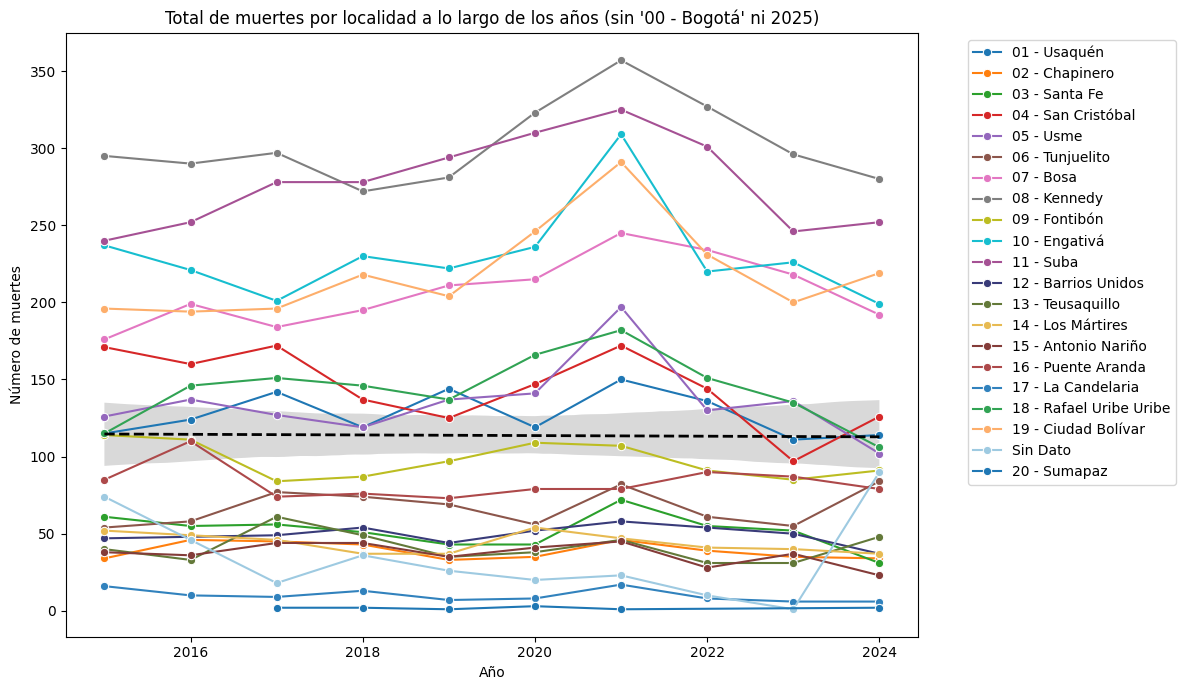

In [ ]:
# 1) Eliminar boogotá
df_filtrado = df[df["LOCALIDAD"] != "00 - Bogotá"].copy()

df_filtrado["ANO"] = pd.to_numeric(df_filtrado["ANO"], errors="coerce")

# Eliminar 2025
df_filtrado = df_filtrado[df_filtrado["ANO"] != 2025]

# muertes  año y localidad
muertes_localidad_anio = (
    df_filtrado.groupby(["ANO", "LOCALIDAD"])["EDAD_FALLECIDO"]
    .count()
    .reset_index()
    .rename(columns={"EDAD_FALLECIDO": "TOTAL_MUERTES"})
)

# ####################
colores = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
    "#a55194",
    "#393b79",
    "#637939",
    "#e7ba52",
    "#843c39",
    "#ad494a",
    "#3182bd",
    "#31a354",
    "#fdae6b",
    "#9ecae1"
]

# ####################
plt.figure(figsize=(12,7))
sns.lineplot(
    data=muertes_localidad_anio,
    x="ANO",
    y="TOTAL_MUERTES",
    hue="LOCALIDAD",
    palette=colores,
    marker="o"
)

#######################################
sns.regplot(
    data=muertes_localidad_anio,
    x="ANO",
    y="TOTAL_MUERTES",
    scatter=False,
    color="black",
    line_kws={"linestyle": "dashed", "linewidth": 2}
)
###############
plt.title("Total de muertes por localidad a lo largo de los años (sin '00 - Bogotá' ni 2025)")
plt.xlabel("Año")
plt.ylabel("Número de muertes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


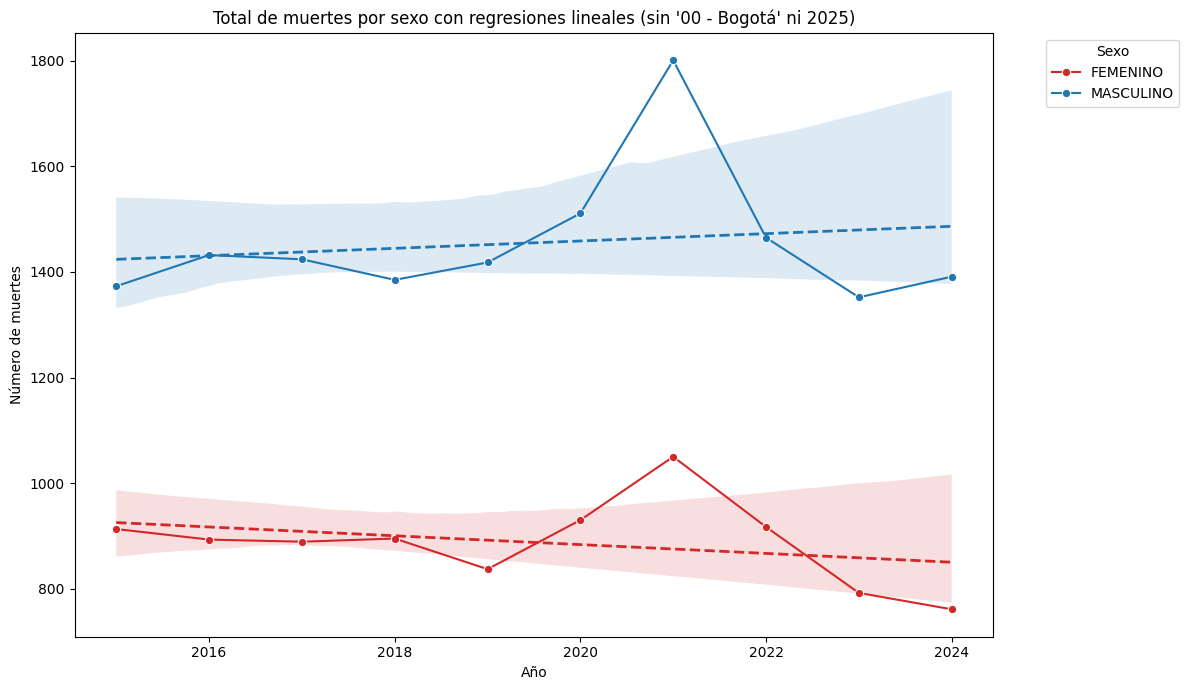

In [ ]:
# 1) Excluir "00 - Bogotá"
df_sexo = df[df["LOCALIDAD"] != "00 - Bogotá"].copy()

# 2) Asegurar que ANO sea numérico y quitar 2025
df_sexo["ANO"] = pd.to_numeric(df_sexo["ANO"], errors="coerce")
df_sexo = df_sexo[df_sexo["ANO"] != 2025]

# 3) Mantener solo SEXO válido (FEMENINO/MASCULINO)
df_sexo = df_sexo[df_sexo["SEXO"].isin(["FEMENINO", "MASCULINO"])]

# 4) Calcular muertes por año y sexo
muertes_anio_sexo = (
    df_sexo.groupby(["ANO", "SEXO"])["EDAD_FALLECIDO"]
    .count()
    .reset_index()
    .rename(columns={"EDAD_FALLECIDO": "TOTAL_MUERTES"})
)

# 5) Colores para los sexos
paleta_sexo = {"FEMENINO": "#d62728", "MASCULINO": "#1f77b4"}  # rojo y azul

# 6) Gráfico de líneas con puntos
plt.figure(figsize=(12,7))
sns.lineplot(
    data=muertes_anio_sexo,
    x="ANO",
    y="TOTAL_MUERTES",
    hue="SEXO",
    palette=paleta_sexo,
    marker="o"
)

# 7) Regresión lineal para FEMENINO
sns.regplot(
    data=muertes_anio_sexo[muertes_anio_sexo["SEXO"] == "FEMENINO"],
    x="ANO",
    y="TOTAL_MUERTES",
    scatter=False,
    color=paleta_sexo["FEMENINO"],
    line_kws={"linestyle": "dashed", "linewidth": 2}
)

# 8) Regresión lineal para MASCULINO
sns.regplot(
    data=muertes_anio_sexo[muertes_anio_sexo["SEXO"] == "MASCULINO"],
    x="ANO",
    y="TOTAL_MUERTES",
    scatter=False,
    color=paleta_sexo["MASCULINO"],
    line_kws={"linestyle": "dashed", "linewidth": 2}
)

# 9) Estética final
plt.title("Total de muertes por sexo con regresiones lineales (sin '00 - Bogotá' ni 2025)")
plt.xlabel("Año")
plt.ylabel("Número de muertes")
plt.legend(title="Sexo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


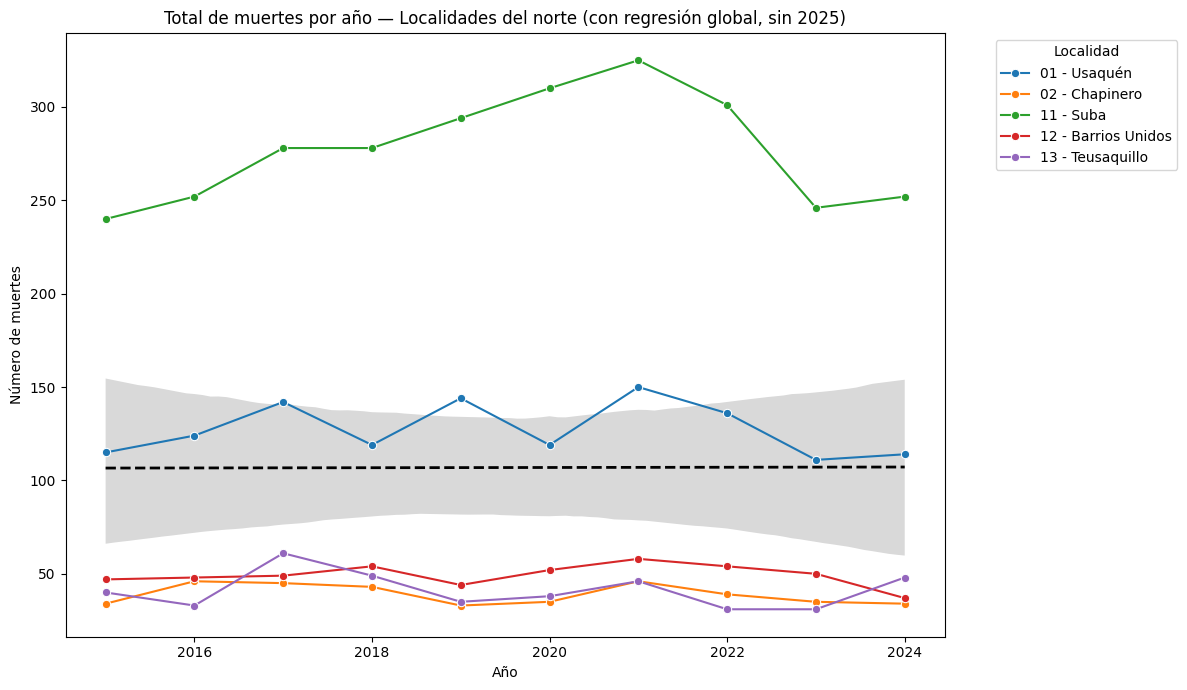

In [ ]:
# 1) Localidades del norte (nombres exactos de la base)
localidades_norte = [
    "01 - Usaquén",
    "02 - Chapinero",
    "11 - Suba",
    "12 - Barrios Unidos",
    "13 - Teusaquillo",
]

# 2) Filtrar solo esas localidades
df_norte = df[df["LOCALIDAD"].str.strip().isin(localidades_norte)].copy()

# 3) Año numérico y excluir 2025
df_norte["ANO"] = pd.to_numeric(df_norte["ANO"], errors="coerce")
df_norte = df_norte[df_norte["ANO"] != 2025]

# 4) Agregar muertes por año y localidad
muertes_norte = (
    df_norte.groupby(["ANO", "LOCALIDAD"])["EDAD_FALLECIDO"]
    .count()
    .reset_index()
    .rename(columns={"EDAD_FALLECIDO": "TOTAL_MUERTES"})
)

# 5) Colores (5 localidades)
colores = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# 6) Gráfico de líneas por localidad
plt.figure(figsize=(12,7))
sns.lineplot(
    data=muertes_norte,
    x="ANO",
    y="TOTAL_MUERTES",
    hue="LOCALIDAD",
    hue_order=localidades_norte,
    palette=colores,
    marker="o"
)

# 7) Regresión lineal GLOBAL (sobre todos los puntos mostrados)
sns.regplot(
    data=muertes_norte,
    x="ANO",
    y="TOTAL_MUERTES",
    scatter=False,
    color="black",
    line_kws={"linestyle": "dashed", "linewidth": 2}
)

plt.title("Total de muertes por año — Localidades del norte (con regresión global, sin 2025)")
plt.xlabel("Año")
plt.ylabel("Número de muertes")
plt.legend(title="Localidad", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### **6.2. Análisis de regresiones**
---

---

- Apartir de las correlaciones identificadas, ¿es posible llevar a cabo un análisis de regresiones para estimar el valor de alguna de las variables de interés?

Sí, fue posible implementar un modelo de regresión lineal tomando como variable dependiente la edad de fallecimiento (EDAD_FALLECIDO). Aunque las correlaciones lineales directas eran débiles, el análisis de regresión permite cuantificar diferencias promedio en la edad de muerte según factores como sexo y localidad. Los resultados muestran que, en general, la capacidad explicativa es limitada (R² ≈ 0,5%), lo que refleja que la edad de fallecimiento depende de más factores que los incluidos.


- ¿Cuáles fueron las variables seleccionadas para el análisis de regresiones y cómo se eligieron en función de los objetivos del proyecto?

La variable dependiente seleccionada fue EDAD_FALLECIDO, por ser continua y representar directamente el momento de ocurrencia de la muerte. Como variables independientes se usaron SEXO y LOCALIDAD (tras excluir CIE10_AGRUPADA por no tener suficiente variabilidad en este subconjunto), ya que reflejan dimensiones clave para el análisis.

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# ===== 0) Base: copia y filtros razonables =====
df_reg = df.copy()

# (Opcional) excluir "00 - Bogotá" y 2025 si aplica
if "LOCALIDAD" in df_reg.columns:
    df_reg = df_reg[df_reg["LOCALIDAD"].ne("00 - Bogotá")]
if "ANO" in df_reg.columns:
    df_reg["ANO"] = pd.to_numeric(df_reg["ANO"], errors="coerce")
    df_reg = df_reg[df_reg["ANO"].ne(2025)]

# Tipos y filas válidas
df_reg["EDAD_FALLECIDO"] = pd.to_numeric(df_reg["EDAD_FALLECIDO"], errors="coerce")
df_reg = df_reg.dropna(subset=["EDAD_FALLECIDO", "SEXO", "LOCALIDAD", "CIE10_AGRUPADA"])

# ===== 1) Asegurar que cada factor tenga ≥ 2 niveles =====
candidatos = ["SEXO", "LOCALIDAD", "CIE10_AGRUPADA"]
factores_validos = [c for c in candidatos if df_reg[c].nunique() >= 2]

# Si alguno quedó con 1 solo nivel, lo quitamos y avisamos
factores_quitados = [c for c in candidatos if c not in factores_validos]
if factores_quitados:
    print("Advertencia: excluyendo de ANOVA por tener 1 nivel:", factores_quitados)

# Si no queda ningún factor, el ANOVA no es posible (solo intercepto)
if not factores_validos:
    raise ValueError("No hay factores con ≥ 2 niveles para realizar ANOVA. Revisa tus filtros.")

# ===== 2) Fórmula dinámica =====
formula = "EDAD_FALLECIDO ~ " + " + ".join([f"C({c})" for c in factores_validos])
print("Fórmula usada:", formula)

# ===== 3) Ajuste del modelo =====
# 3a) Modelo con errores robustos (HC3) para interpretación en el summary
modelo_hc3 = smf.ols(formula, data=df_reg).fit(cov_type="HC3")
print(modelo_hc3.summary())

# 3b) Modelo OLS “clásico” para ANOVA (recomendado por compatibilidad)
modelo_ols = smf.ols(formula, data=df_reg).fit()

# ===== 4) ANOVA Type II =====
anova_res = anova_lm(modelo_ols, typ=2)
print("\nANOVA Type II:")
print(anova_res)


Advertencia: excluyendo de ANOVA por tener 1 nivel: ['CIE10_AGRUPADA']
Fórmula usada: EDAD_FALLECIDO ~ C(SEXO) + C(LOCALIDAD)
                            OLS Regression Results                            
Dep. Variable:         EDAD_FALLECIDO   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.027
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           3.19e-13
Time:                        17:06:10   Log-Likelihood:                -83204.
No. Observations:               23429   AIC:                         1.665e+05
Df Residuals:                   23407   BIC:                         1.666e+05
Df Model:                          21                                         
Covariance Type:                  HC3                                         
                                              coef    std err          z      P>|z| 

### **6.3. Estadística inferencial (Opcional)**
---

- ¿Resulta pertinente calcular intervalos de confianza para estimar algún parámetro con confianza a partir de una muestra?

Sí. Aunque el archivo contiene registros administrativos (no una muestra aleatoria), los intervalos de confianza (IC) son útiles para cuantificar la incertidumbre de estimaciones y comunicar precisión:

Edad promedio de defunción: IC95% de la media (global y por sexo) mediante t de Student → con el tamaño muestral alto, los IC son estrechos y estables en el tiempo.

Proporciones de causas: para la fracción de isquémicas (I20–I25) frente a cerebrovasculares (I60–I69), usar IC de Wilson (mejor que el normal) por su buen desempeño incluso con proporciones extremas.

- ¿Es posible realizar pruebas de hipótesis para probar alguna teoría sobre un parámetro de la población?

Sí es posible:

Diferencia de medias (edad) por sexo: Welch t-test sobre EDAD_FALLECIDO (F vs M). Con tu n elevado, el test tiene buena potencia; reporta t, p y la diferencia de medias con IC95%.

Independencia entre sexo y causas: Chi² sobre SEXO ~ CIE10_BASICA (no usar CIE10_AGRUPADA porque viene con una sola categoría). En tu corrida resultó p < 0.001 con V de Cramer ≈ 0.21, lo que sugiere asociación moderada (diferente mezcla de códigos Ixx por sexo).

Tendencia temporal de la edad: regresión OLS EDAD_FALLECIDO ~ ANO. El coeficiente de ANO no es significativo y el R² es bajo, consistente con una edad media estable (~60 años) entre 2015–2025.


In [ ]:
import re, math
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

df = pd.read_csv("osb_cronicas_mpcardiocerebrovasculares.csv", sep=";", encoding="latin-1")

# 1) Limpieza mínima
df["EDAD_FALLECIDO"] = pd.to_numeric(df["EDAD_FALLECIDO"], errors="coerce")
df["ANO"] = pd.to_numeric(df["ANO"], errors="coerce")
df["SEXO"] = df["SEXO"].str.strip().str.upper()

# --- Helpers de intervalos de confianza ---
def mean_ci(series, conf=0.95):
    """IC para la media (t-Student). Devuelve (media, li, ls, n)."""
    x = pd.to_numeric(series, errors="coerce").dropna()
    n = len(x)
    m = x.mean()
    s = x.std(ddof=1)
    if n < 2 or s == 0 or np.isnan(s):
        return float(m), np.nan, np.nan, n
    tcrit = stats.t.ppf(0.5*(1+conf), df=n-1)
    se = s / math.sqrt(n)
    return float(m), float(m - tcrit*se), float(m + tcrit*se), n

def wilson_ci(successes, n, conf=0.95):
    """IC de Wilson para proporciones."""
    if n == 0:
        return (np.nan, np.nan, np.nan, 0.0)
    z = stats.norm.ppf(0.5*(1+conf))
    p = successes / n
    denom = 1 + z**2/n
    center = (p + z**2/(2*n)) / denom
    half = (z * math.sqrt(p*(1-p)/n + z**2/(4*n**2))) / denom
    return float(p), float(center - half), float(center + half), float(n)

# 2) IC de la edad promedio (global y por sexo)
m_all = mean_ci(df["EDAD_FALLECIDO"], conf=0.95)
m_f = mean_ci(df.loc[df["SEXO"]=="FEMENINO", "EDAD_FALLECIDO"], conf=0.95)
m_m = mean_ci(df.loc[df["SEXO"]=="MASCULINO","EDAD_FALLECIDO"], conf=0.95)

print("Edad media (global) 95%% CI: media=%.2f  LI=%.2f  LS=%.2f  n=%d" % m_all)
print("Edad media (F)      95%% CI: media=%.2f  LI=%.2f  LS=%.2f  n=%d" % m_f)
print("Edad media (M)      95%% CI: media=%.2f  LI=%.2f  LS=%.2f  n=%d" % m_m)

# 3) t-test de Welch (edad H vs M)
f_age = pd.to_numeric(df.loc[df["SEXO"]=="FEMENINO","EDAD_FALLECIDO"], errors="coerce").dropna()
m_age = pd.to_numeric(df.loc[df["SEXO"]=="MASCULINO","EDAD_FALLECIDO"], errors="coerce").dropna()
tstat, pval = stats.ttest_ind(f_age, m_age, equal_var=False, nan_policy="omit")
print("\nWelch t-test (Edad F vs M): t=%.3f  p=%.3g  (nF=%d, nM=%d)" % (tstat, pval, len(f_age), len(m_age)))

#Variable binaria de causa desde CIE10_BASICA
def clasif_causa(code):
    if pd.isna(code): return np.nan
    s = str(code).upper().strip()
    m = re.match(r"I(\d{2})", s)
    if not m: return np.nan
    d = int(m.group(1))
    if 20 <= d <= 25:  # isquémicas
        return 1
    if 60 <= d <= 69:  # cerebrovasculares
        return 0
    return np.nan

df["CAUSA_ISQ_vs_CBV"] = df["CIE10_BASICA"].apply(clasif_causa)


for sexo in ["FEMENINO", "MASCULINO"]:
    sub = df.loc[df["SEXO"]==sexo, "CAUSA_ISQ_vs_CBV"].dropna()
    x = int((sub==1).sum())
    n = int(len(sub))
    p, li, ls, n_ = wilson_ci(x, n, conf=0.95)
    print(f"\n{sexo}: Proporción isquémicas (I20–I25) entre {{I20–I25, I60–I69}}")
    print("  x=%d  n=%d  p=%.3f  95%%CI=[%.3f, %.3f]" % (x, n, p, li, ls))


valid = df[["SEXO","CAUSA_ISQ_vs_CBV"]].dropna()
cont = pd.crosstab(valid["SEXO"], valid["CAUSA_ISQ_vs_CBV"])
chi2, pchi, dof, exp = stats.chi2_contingency(cont)
n = cont.to_numpy().sum()
phi2 = chi2/n
r, k = cont.shape
phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
rcorr = r - (r-1)**2/(n-1)
kcorr = k - (k-1)**2/(n-1)
v = np.sqrt(phi2corr / max(1e-9, min((kcorr-1), (rcorr-1))))
print("\nChi² (SEXO ~ isquémicas vs cerebrovasculares):")
print("  Chi²=%.1f  p=%.3g  V de Cramer=%.3f  (n=%d)" % (chi2, pchi, v, n))
print("  Tabla:\n", cont)


reg = smf.ols("EDAD_FALLECIDO ~ ANO", data=df.dropna(subset=["EDAD_FALLECIDO","ANO"])).fit()
print("\nRegresión OLS Edad~Año (resumen breve)")
print("  beta_ANO=%.5f  p=%.3g  R2=%.4f  n=%d" % (reg.params.get("ANO", np.nan),
                                                 reg.pvalues.get("ANO", np.nan),
                                                 reg.rsquared,
                                                 int(reg.nobs)))


Edad media (global) 95% CI: media=60.12  LI=60.04  LS=60.19  n=47542
Edad media (F)      95% CI: media=60.18  LI=60.06  LS=60.31  n=18006
Edad media (M)      95% CI: media=60.08  LI=59.98  LS=60.18  n=29536

Welch t-test (Edad F vs M): t=1.274  p=0.203  (nF=18006, nM=29536)

FEMENINO: Proporción isquémicas (I20–I25) entre {I20–I25, I60–I69}
  x=9456  n=16006  p=0.591  95%CI=[0.583, 0.598]

MASCULINO: Proporción isquémicas (I20–I25) entre {I20–I25, I60–I69}
  x=20626  n=26942  p=0.766  95%CI=[0.760, 0.771]

Chi² (SEXO ~ isquémicas vs cerebrovasculares):
  Chi²=1461.2  p=0  V de Cramer=0.184  (n=42948)
  Tabla:
 CAUSA_ISQ_vs_CBV   0.0    1.0
SEXO                         
FEMENINO          6550   9456
MASCULINO         6316  20626

Regresión OLS Edad~Año (resumen breve)
  beta_ANO=0.02722  p=0.0433  R2=0.0001  n=47542


## **7. Resultados y visualizaciones**


### **7.1. Visualizaciones Estáticas**
---

* Incluya gráficos y visualizaciones estáticas que sean relevantes para los datos analizados.
* Explique cada visualización y cómo contribuye a la comprensión de los resultados.


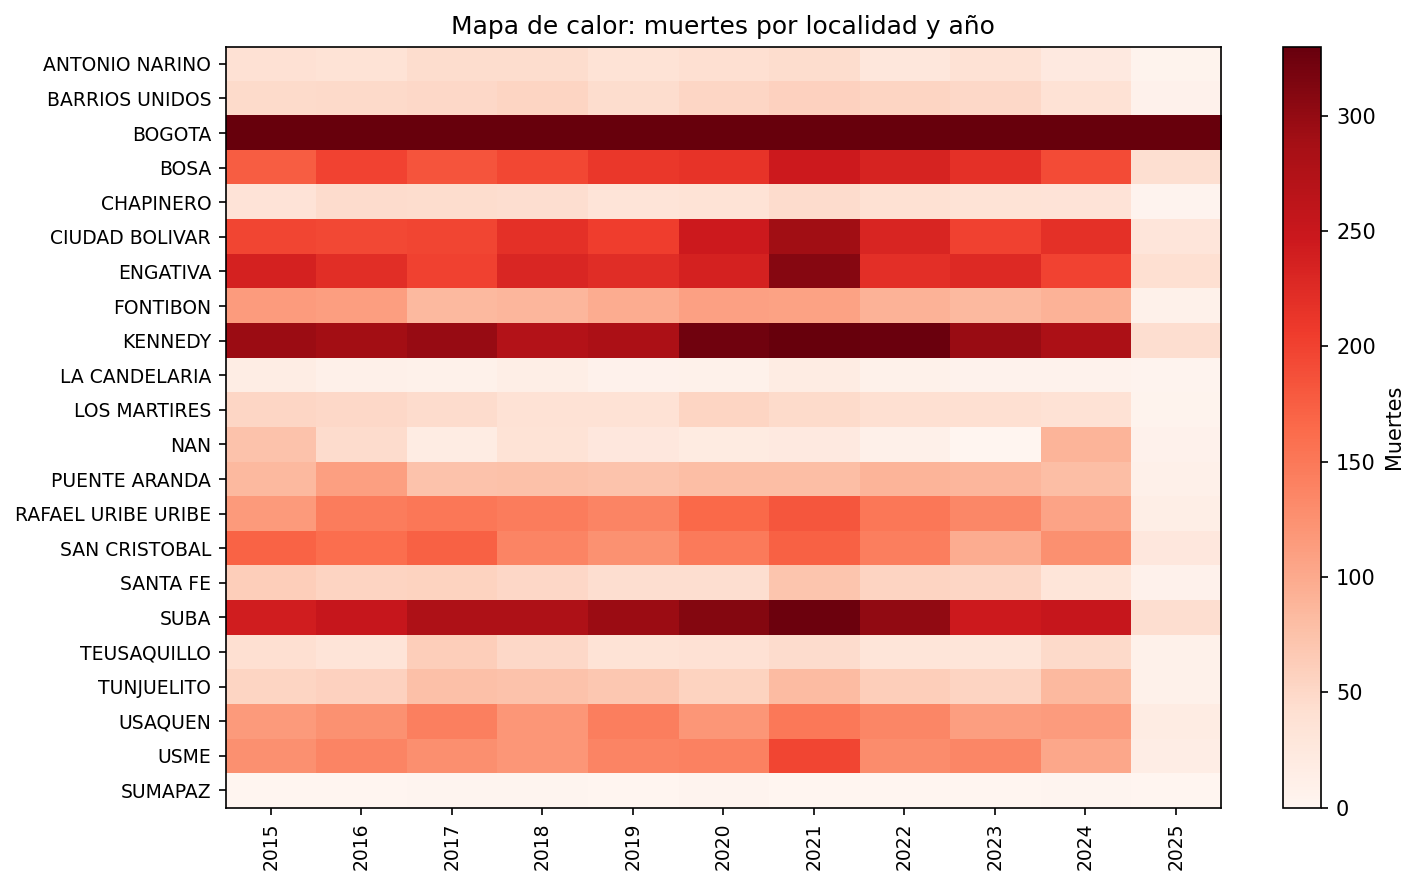

In [ ]:
def _norm(s):
    import unicodedata
    if s is None: return None
    s = str(s).strip().upper()
    s = ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))
    return ' '.join(s.replace('-', ' ').replace('_', ' ').split())

df_std["LOCALIDAD_STD"] = df_std["LOCALIDAD_STD"].map(_norm)
df_std["ANO"] = pd.to_numeric(df_std["ANO"], errors="coerce").astype("Int64")

# Muertes por localidad y año
muertes_loc_ano = (
    df_std.dropna(subset=["ANO","LOCALIDAD_STD"])
          .groupby(["ANO","LOCALIDAD_STD"])
          .size()
          .reset_index(name="muertes")
)

# Localidades válidas (desde shapefile o directamente de los datos)
localidades_validas = muertes_loc_ano["LOCALIDAD_STD"].unique().tolist()

# ---------- TABLA PARA HEATMAP ----------
tabla = (
    muertes_loc_ano.pivot(index="LOCALIDAD_STD", columns="ANO", values="muertes")
                  .reindex(index=localidades_validas)
                  .reindex(columns=sorted(muertes_loc_ano["ANO"].unique()))
)

# ---------- HEATMAP ----------
vmax = float(np.nanpercentile(tabla.values, 95))
vmin = 0.0

fig, ax = plt.subplots(figsize=(10,6), dpi=150)
im = ax.imshow(tabla.fillna(0).values, aspect="auto", cmap="Reds", vmin=vmin, vmax=vmax)

# Etiquetas
ax.set_yticks(range(len(tabla.index)))
ax.set_yticklabels(tabla.index, fontsize=9)
ax.set_xticks(range(len(tabla.columns)))
ax.set_xticklabels(tabla.columns, rotation=90, fontsize=9)

ax.set_title("Mapa de calor: muertes por localidad y año")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Muertes")

plt.tight_layout()
plt.show()


Mapa de calor (muertes por localidad y año)
El heatmap cruza las localidades con los años, mostrando la intensidad de las muertes mediante una escala de colores. Permite identificar tendencias espacio-temporales, como localidades consistentemente críticas (ej. Kennedy, Ciudad Bolívar, Suba), y ver cómo varía la mortalidad año a año.

/tmp/ipython-input-1313911476.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, patch_artist=True, labels=years, showfliers=False)


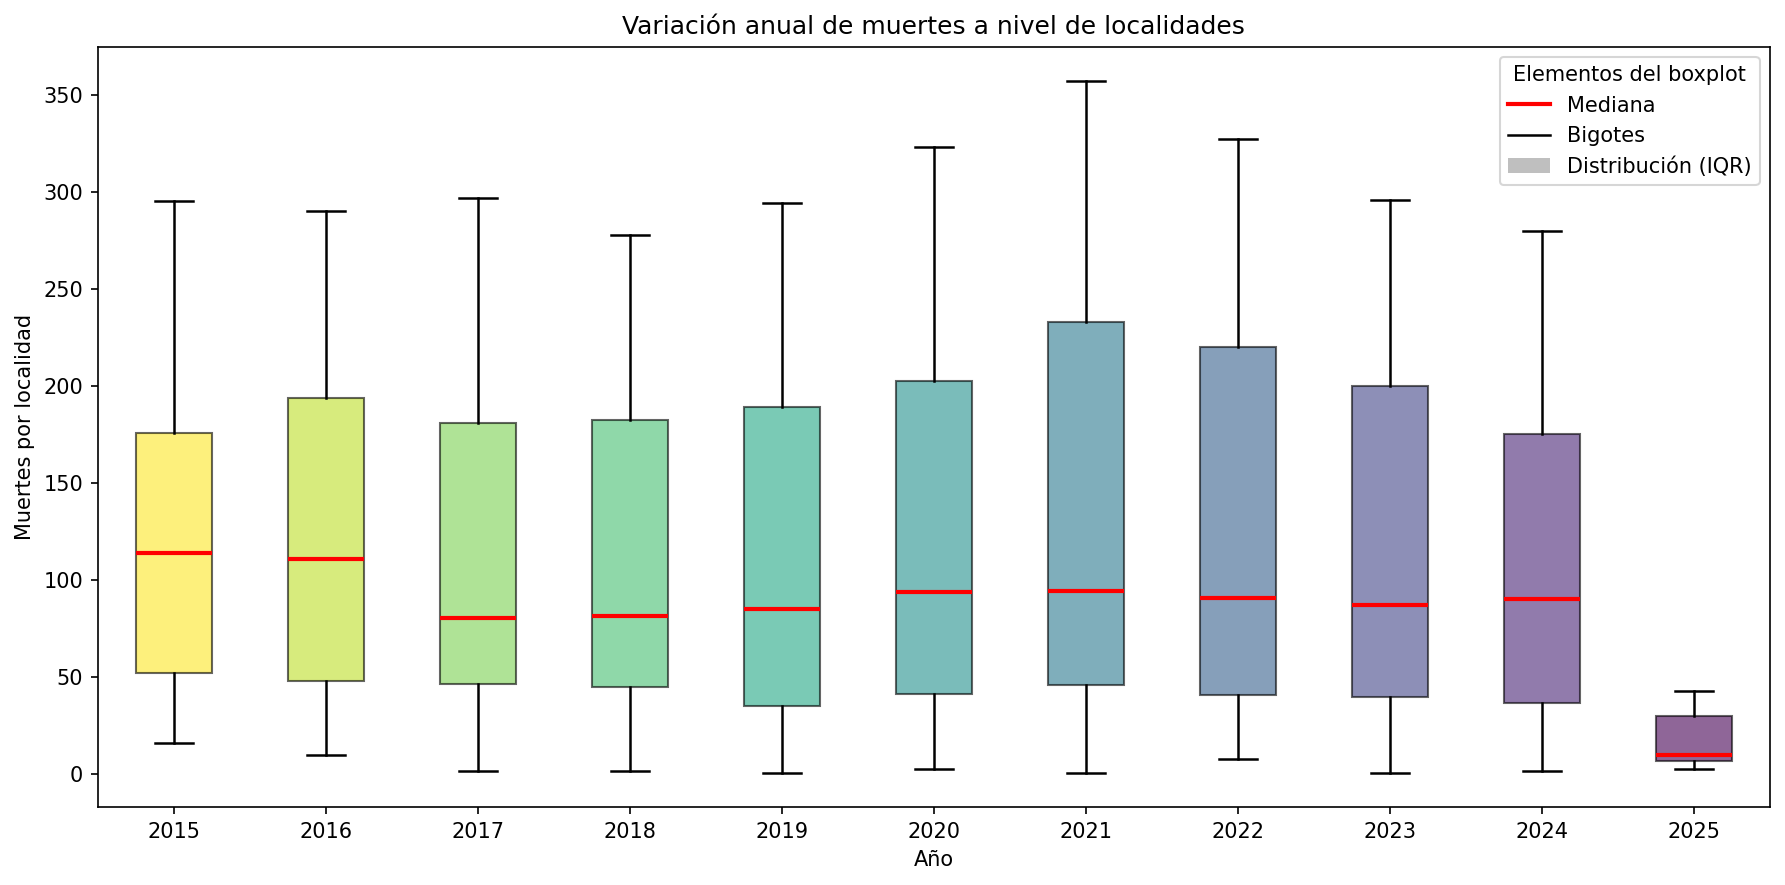

In [ ]:


import matplotlib.pyplot as plt

# ---------- Boxplot con colores ----------
fig, ax = plt.subplots(figsize=(12,6), dpi=150)

years = sorted(muertes_loc_ano["ANO"].unique())
box_data = [muertes_loc_ano[muertes_loc_ano["ANO"]==a]["muertes"].values for a in years]

# Paleta de colores (puedes cambiarla)
colors = plt.cm.viridis_r(np.linspace(0, 1, len(years)))

# Dibujar boxplots con colores
bp = ax.boxplot(box_data, patch_artist=True, labels=years, showfliers=False)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

# Personalizar líneas
for median in bp['medians']:
    median.set(color="red", linewidth=2)

for whisker in bp['whiskers']:
    whisker.set(color="black", linewidth=1.2)

for cap in bp['caps']:
    cap.set(color="black", linewidth=1.2)

# Etiquetas
ax.set_title("Variación anual de muertes a nivel de localidades")
ax.set_xlabel("Año")
ax.set_ylabel("Muertes por localidad")

# Leyenda
legend_elements = [
    plt.Line2D([0], [0], color="red", lw=2, label="Mediana"),
    plt.Line2D([0], [0], color="black", lw=1.2, label="Bigotes"),
    plt.Rectangle((0,0),1,1, facecolor="gray", alpha=0.5, label="Distribución (IQR)")
]
ax.legend(handles=legend_elements, loc="upper right", title="Elementos del boxplot")

plt.tight_layout()
plt.savefig("fig_7_6_boxplot_muertes_por_ano_colores.png", dpi=200)
plt.show()






Boxplot de muertes entre localidades por año
Este diagrama de cajas refleja la distribución de muertes entre las 20 localidades en cada año. El boxplot muestra la mediana, la dispersión y los valores extremos, facilitando comparar la variabilidad interlocalidades y detectar años donde hubo mayor desigualdad en el número de muertes.

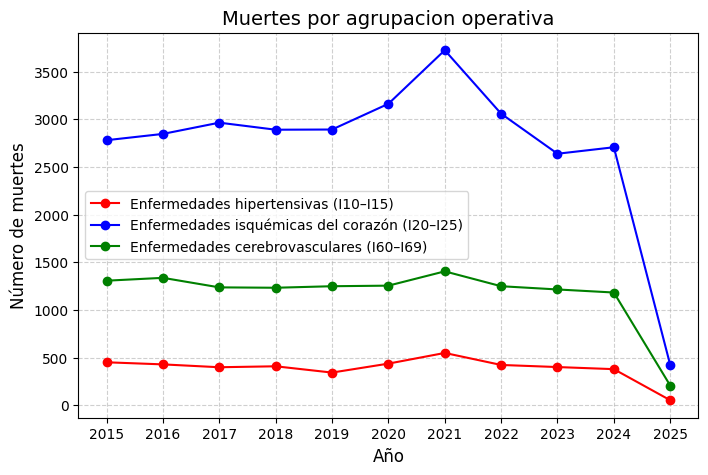

In [ ]:
#Diagramas de realcion entre Mortalidad y sexo, localidad, etc
filter_I20 = df_group_CIE10[(df_group_CIE10['CIE10_GRUPO']=='Enfermedades isquémicas del corazón (I20–I25)')]
filter_I10 = df_group_CIE10[(df_group_CIE10['CIE10_GRUPO']=='Enfermedades hipertensivas (I10–I15)')]
filter_I60 = df_group_CIE10[(df_group_CIE10['CIE10_GRUPO']=='Enfermedades cerebrovasculares (I60–I69)')]
# Graficar
plt.figure(figsize=(8,5))
plt.plot(filter_I10["ANO"], filter_I10["MUERTES"], marker="o", linestyle="-", color="red", label="Enfermedades hipertensivas (I10–I15)")
plt.plot(filter_I20["ANO"], filter_I20["MUERTES"], marker="o", linestyle="-", color="blue", label="Enfermedades isquémicas del corazón (I20–I25)")
plt.plot(filter_I60["ANO"], filter_I60["MUERTES"], marker="o", linestyle="-", color="green", label="Enfermedades cerebrovasculares (I60–I69)")

# Forzar que aparezcan todos los años en el eje X
plt.xticks(filter_I20["ANO"].unique())

# Títulos y etiquetas
plt.title("Muertes por agrupacion operativa", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de muertes", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

Esta gráfica presenta la evolución de la mortalidad en Bogotá agrupada por causas específicas (CIE-10): enfermedades hipertensivas (I10–I15), isquémicas del corazón (I20–I25) y cerebrovasculares (I60–I69), entre 2015 y 2025.

1. Enfermedades isquémicas del corazón (línea azul):
Son la principal causa en todo el periodo, con valores que rondan entre 2.800 y 3.700 muertes. Se observa un pico pronunciado en 2021, seguido de una disminución paulatina hasta 2024. En 2025 aparece una caída abrupta, probablemente asociada a datos parciales.

2. Enfermedades cerebrovasculares (línea verde):
Mantienen un comportamiento estable, entre 1.200 y 1.400 muertes anuales, también con un ligero repunte en 2021. Son la segunda causa en importancia.

3. Enfermedades hipertensivas (línea roja):
Constituyen la menor carga relativa, con menos de 600 casos al año, aunque igualmente muestran un incremento en 2021 antes de volver a la estabilidad.

Cómo contribuye a la comprensión de los resultados

* Permite identificar la carga diferencial por causa: deja claro que las muertes de origen isquémico son las predominantes en Bogotá, seguidas por las cerebrovasculares y, en menor medida, las hipertensivas.

* Revela patrones comunes: las tres causas comparten un repunte en 2021, lo que sugiere la influencia de un factor externo común (ej. pandemia o alteraciones en la atención sanitaria).

* Facilita la priorización en salud pública: al evidenciar qué patologías concentran la mayor mortalidad, la gráfica orienta hacia dónde dirigir políticas de prevención y control.

* Apoya el análisis temporal: al mostrar descensos posteriores al 2021, ayuda a comprender la dinámica de recuperación y estabilización en la mortalidad.


/tmp/ipython-input-620963825.py:30: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("LOCALIDAD_STD in @localidades_validas and 2015 <= ANO <= 2024")


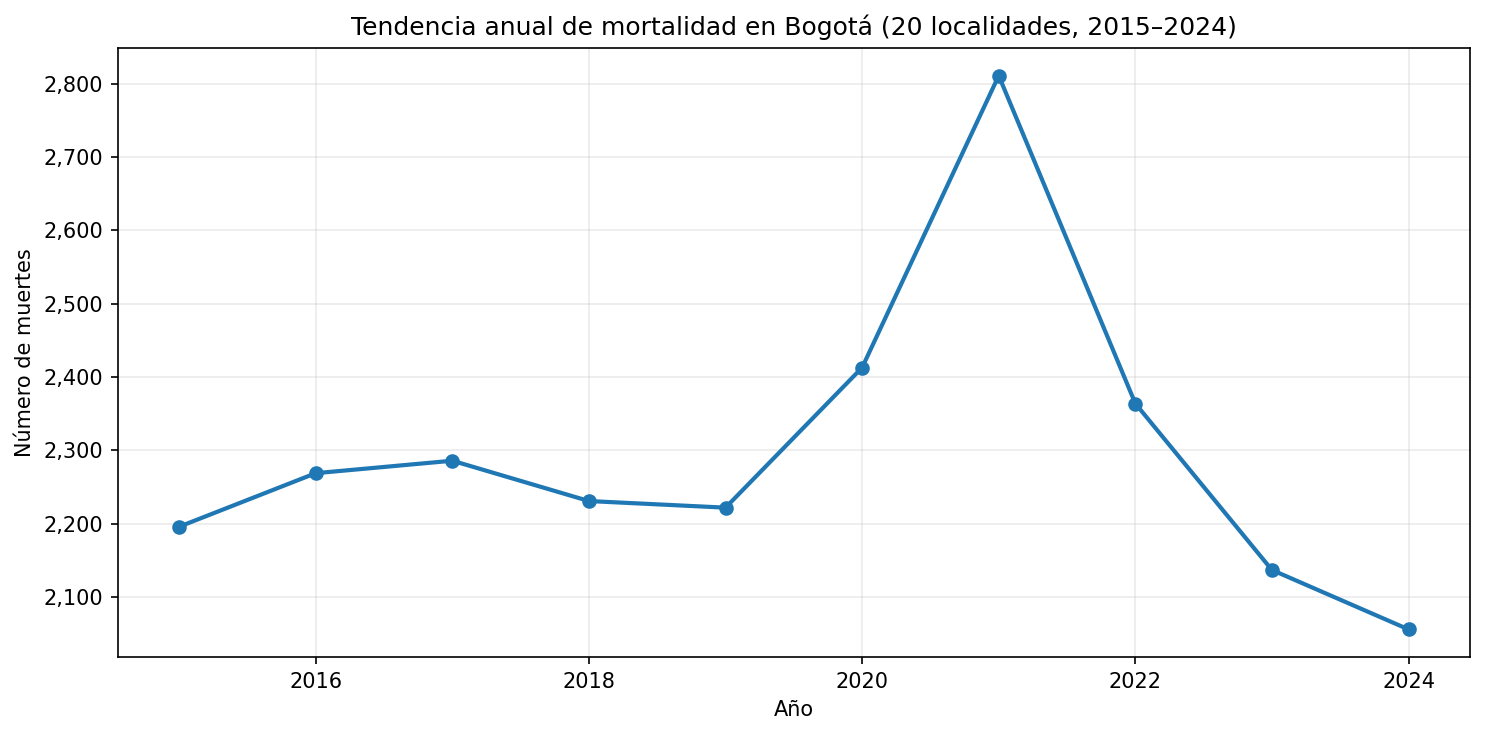

In [ ]:

import matplotlib.ticker as mtick

def _norm(s):
    if s is None: return None
    s = str(s).strip().upper()
    s = ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))
    return ' '.join(s.replace('-', ' ').replace('_', ' ').split())

# 20 localidades oficiales (fallback si no hay gdf)
BOGOTA_20 = [
    "USAQUEN","CHAPINERO","SANTA FE","SAN CRISTOBAL","USME","TUNJUELITO","BOSA",
    "KENNEDY","FONTIBON","ENGATIVA","SUBA","BARRIOS UNIDOS","TEUSAQUILLO",
    "LOS MARTIRES","ANTONIO NARINO","PUENTE ARANDA","CANDELARIA",
    "RAFAEL URIBE URIBE","CIUDAD BOLIVAR","SUMAPAZ"
]

# --- Localidades válidas ---
if 'gdf' in globals():
    localidades_validas = gdf["LOCALIDAD_STD"].dropna().map(_norm).unique().tolist()
else:
    localidades_validas = BOGOTA_20  # usa la lista oficial

# --- Dataset base ---
df_linea = (
    df_std.assign(
        LOCALIDAD_STD=df_std["LOCALIDAD_STD"].map(_norm),
        ANO=pd.to_numeric(df_std["ANO"], errors="coerce").astype("Int64")
    )
    .dropna(subset=["LOCALIDAD_STD", "ANO"])
    .query("LOCALIDAD_STD in @localidades_validas and 2015 <= ANO <= 2024")
)

# --- Serie anual (solo 20 localidades) ---
serie_ok = df_linea.groupby("ANO").size().reset_index(name="muertes")

# --- Gráfico ---
fig, ax = plt.subplots(figsize=(10,5), dpi=150)
ax.plot(serie_ok["ANO"], serie_ok["muertes"], marker="o", lw=2)
ax.set_title("Tendencia anual de mortalidad en Bogotá (20 localidades, 2015–2024)")
ax.set_xlabel("Año"); ax.set_ylabel("Número de muertes")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("fig_7_1_tendencia_anual_sin_nan.png", dpi=200)
plt.show()

Esta gráfica representa la tendencia anual de mortalidad en Bogotá entre 2015 y 2024, considerando únicamente las 20 localidades oficiales (es decir, sin contar duplicados como "Bogotá" total ni registros con valores perdidos).


Entre 2015 y 2019, la mortalidad se mantiene relativamente estable, alrededor de las 2.200–2.300 muertes anuales. En 2020–2021, se observa un aumento pronunciado, alcanzando un pico en 2021 con más de 2.800 muertes. El pico de 2021 podría estar asociado a un evento extraordinario (ejemplo: pandemia de COVID-19 u otras coyunturas de salud pública). A partir de 2022, los valores descienden de manera sostenida hasta llegar en 2024 al nivel más bajo de la serie (cerca de 2.050 muertes). La estabilidad inicial sugiere un patrón relativamente constante de mortalidad. La caída  indica un retorno a niveles más bajos de mortalidad, posiblemente como resultado de la normalización de la atención en salud y medidas preventivas.

Esta gráfica contribuye a la comprensión de los resultados porque:


*   Ofrece una visión global: resume en una sola línea la evolución de la mortalidad en Bogotá durante una década, facilitando identificar tendencias generales.

*   Permite detectar anomalías: el pico en 2021 sobresale claramente y motiva a indagar causas específicas (como pandemias o crisis sanitarias).

* Apoya la toma de decisiones en salud pública: al identificar periodos críticos y de estabilización, orienta la planificación de políticas preventivas y de respuesta ante eventos extraordinarios.

*  Facilita la comparación temporal: al ver cómo los valores regresan a niveles bajos en 2023–2024, se entiende mejor el impacto relativo de ese pico frente a los años previos y posteriores.






### **7.2.Visualización de Mapas Coropléticos (Opcional)**


VMAX (escala común): 300


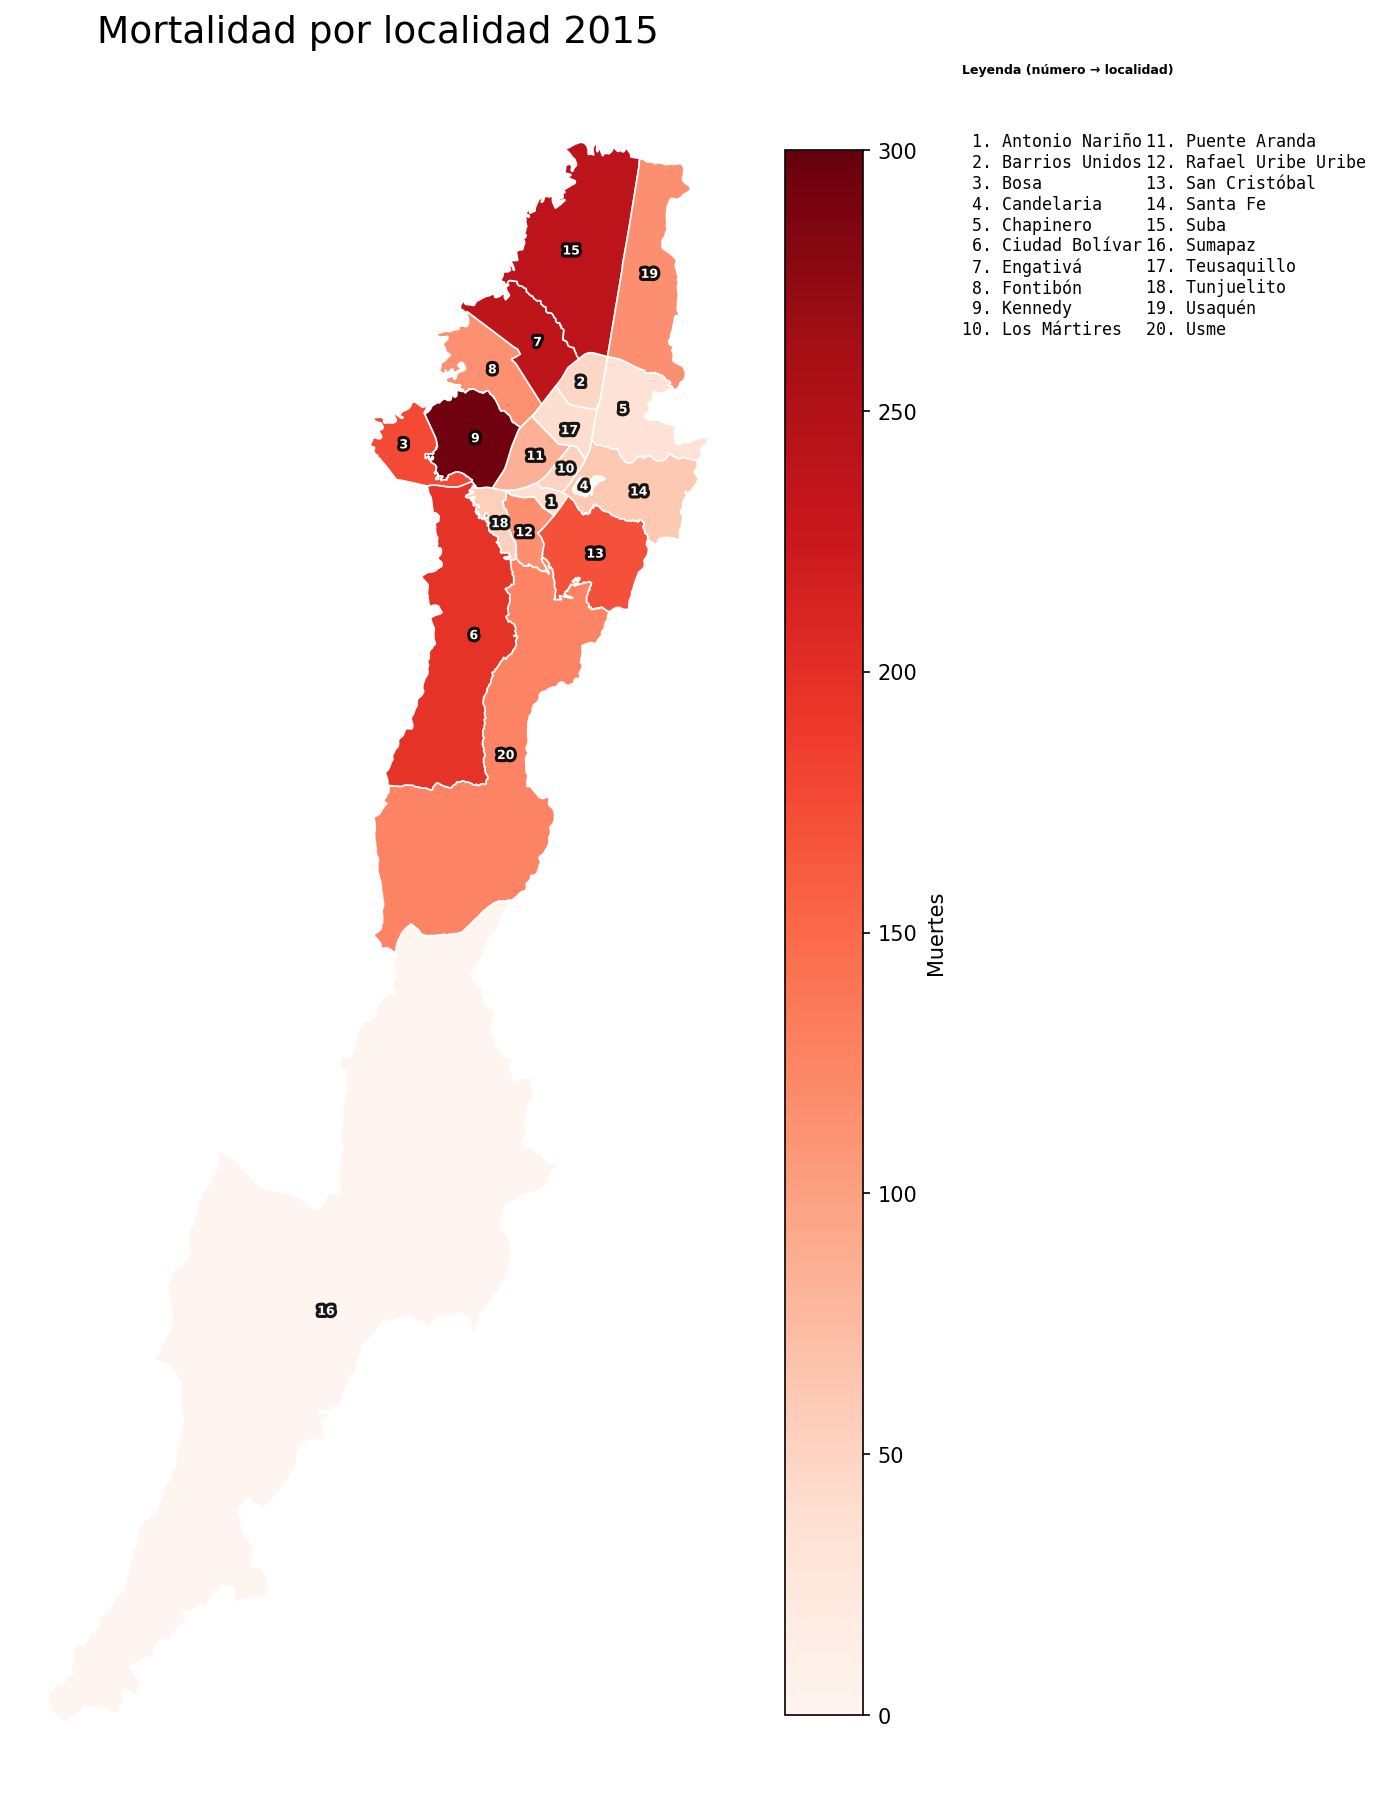

Mapa 2015.


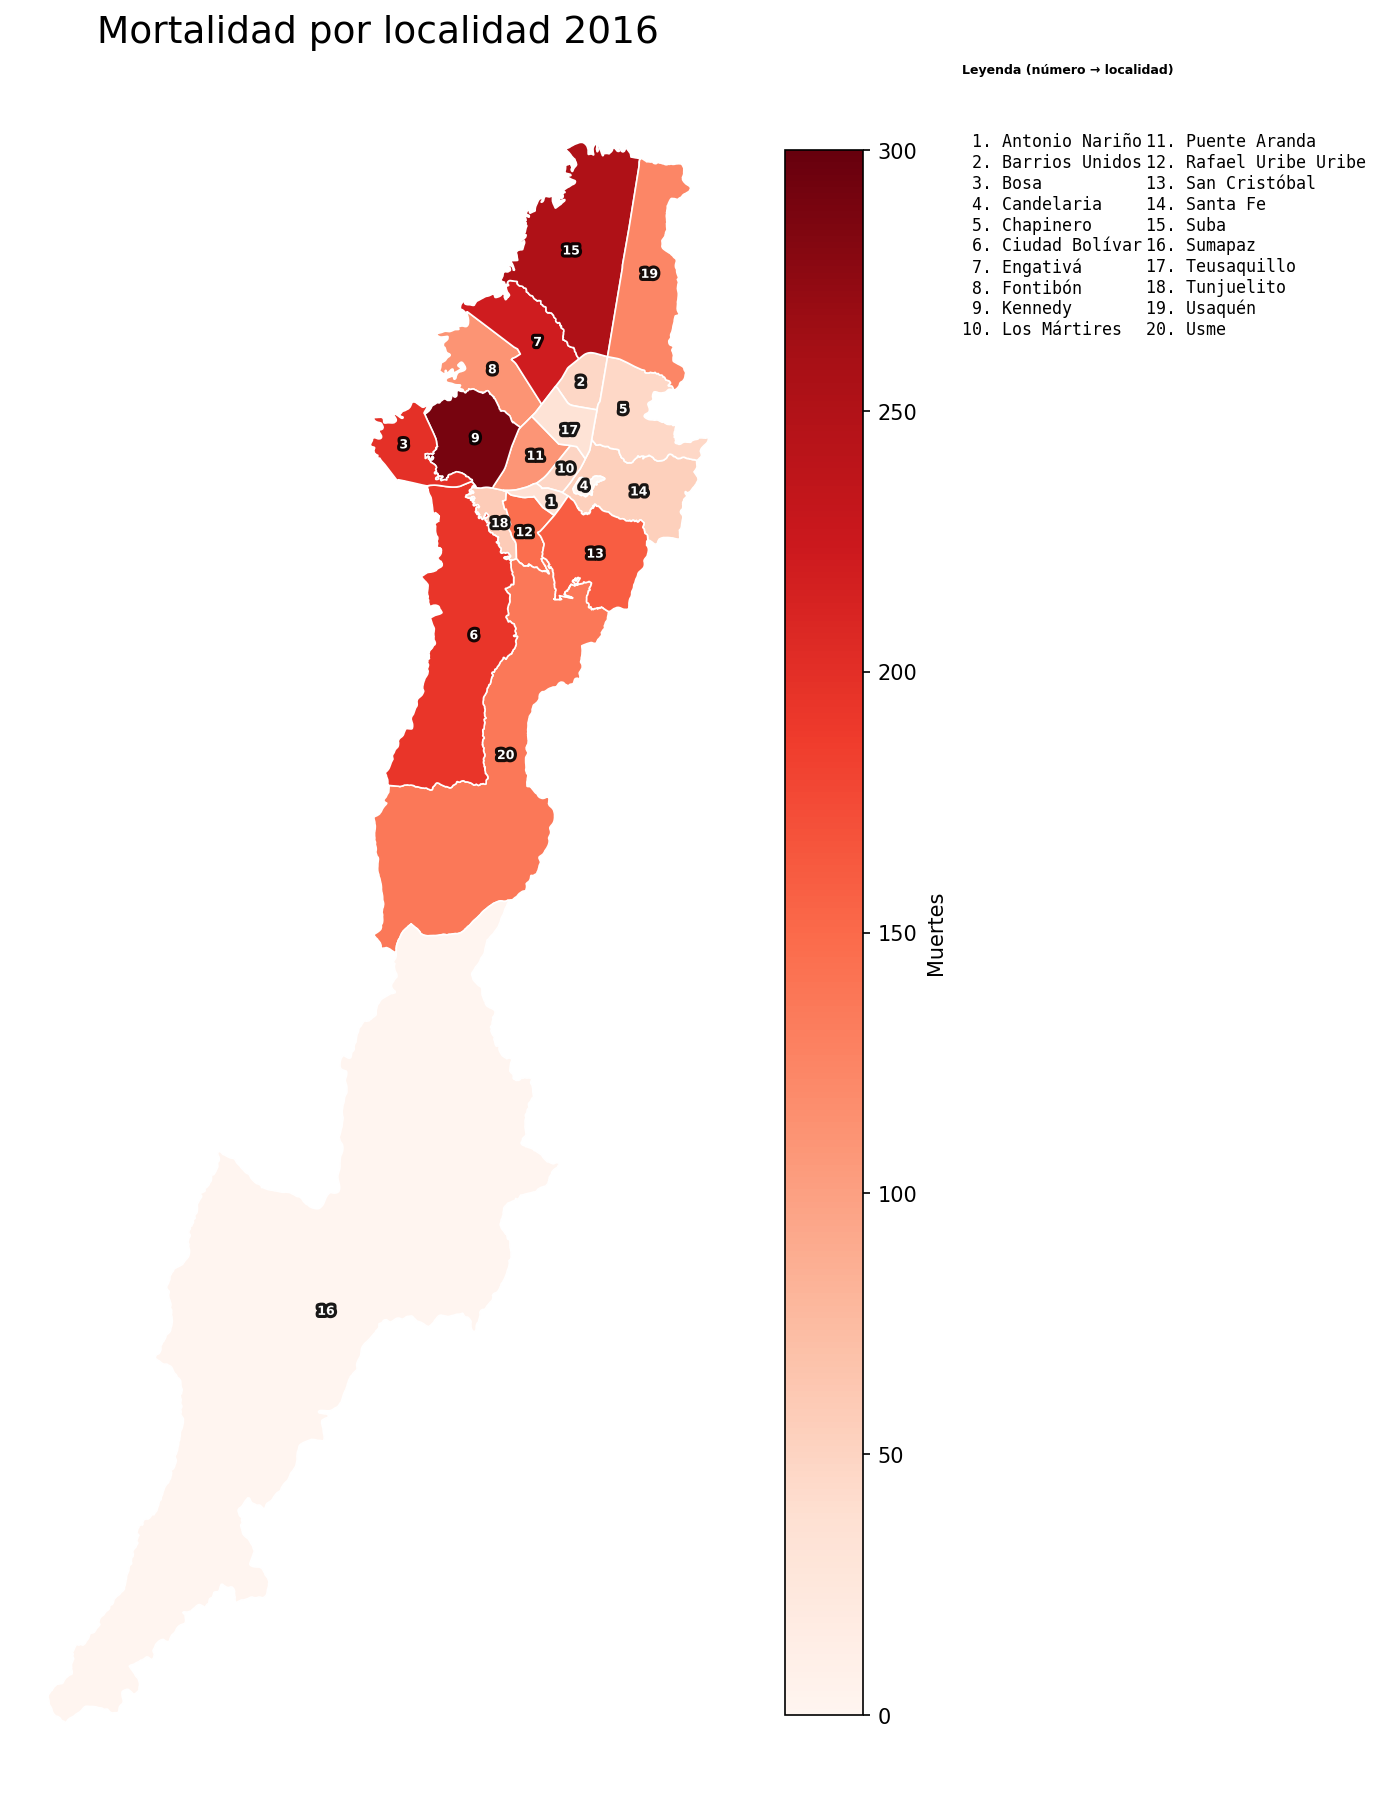

Mapa 2016.


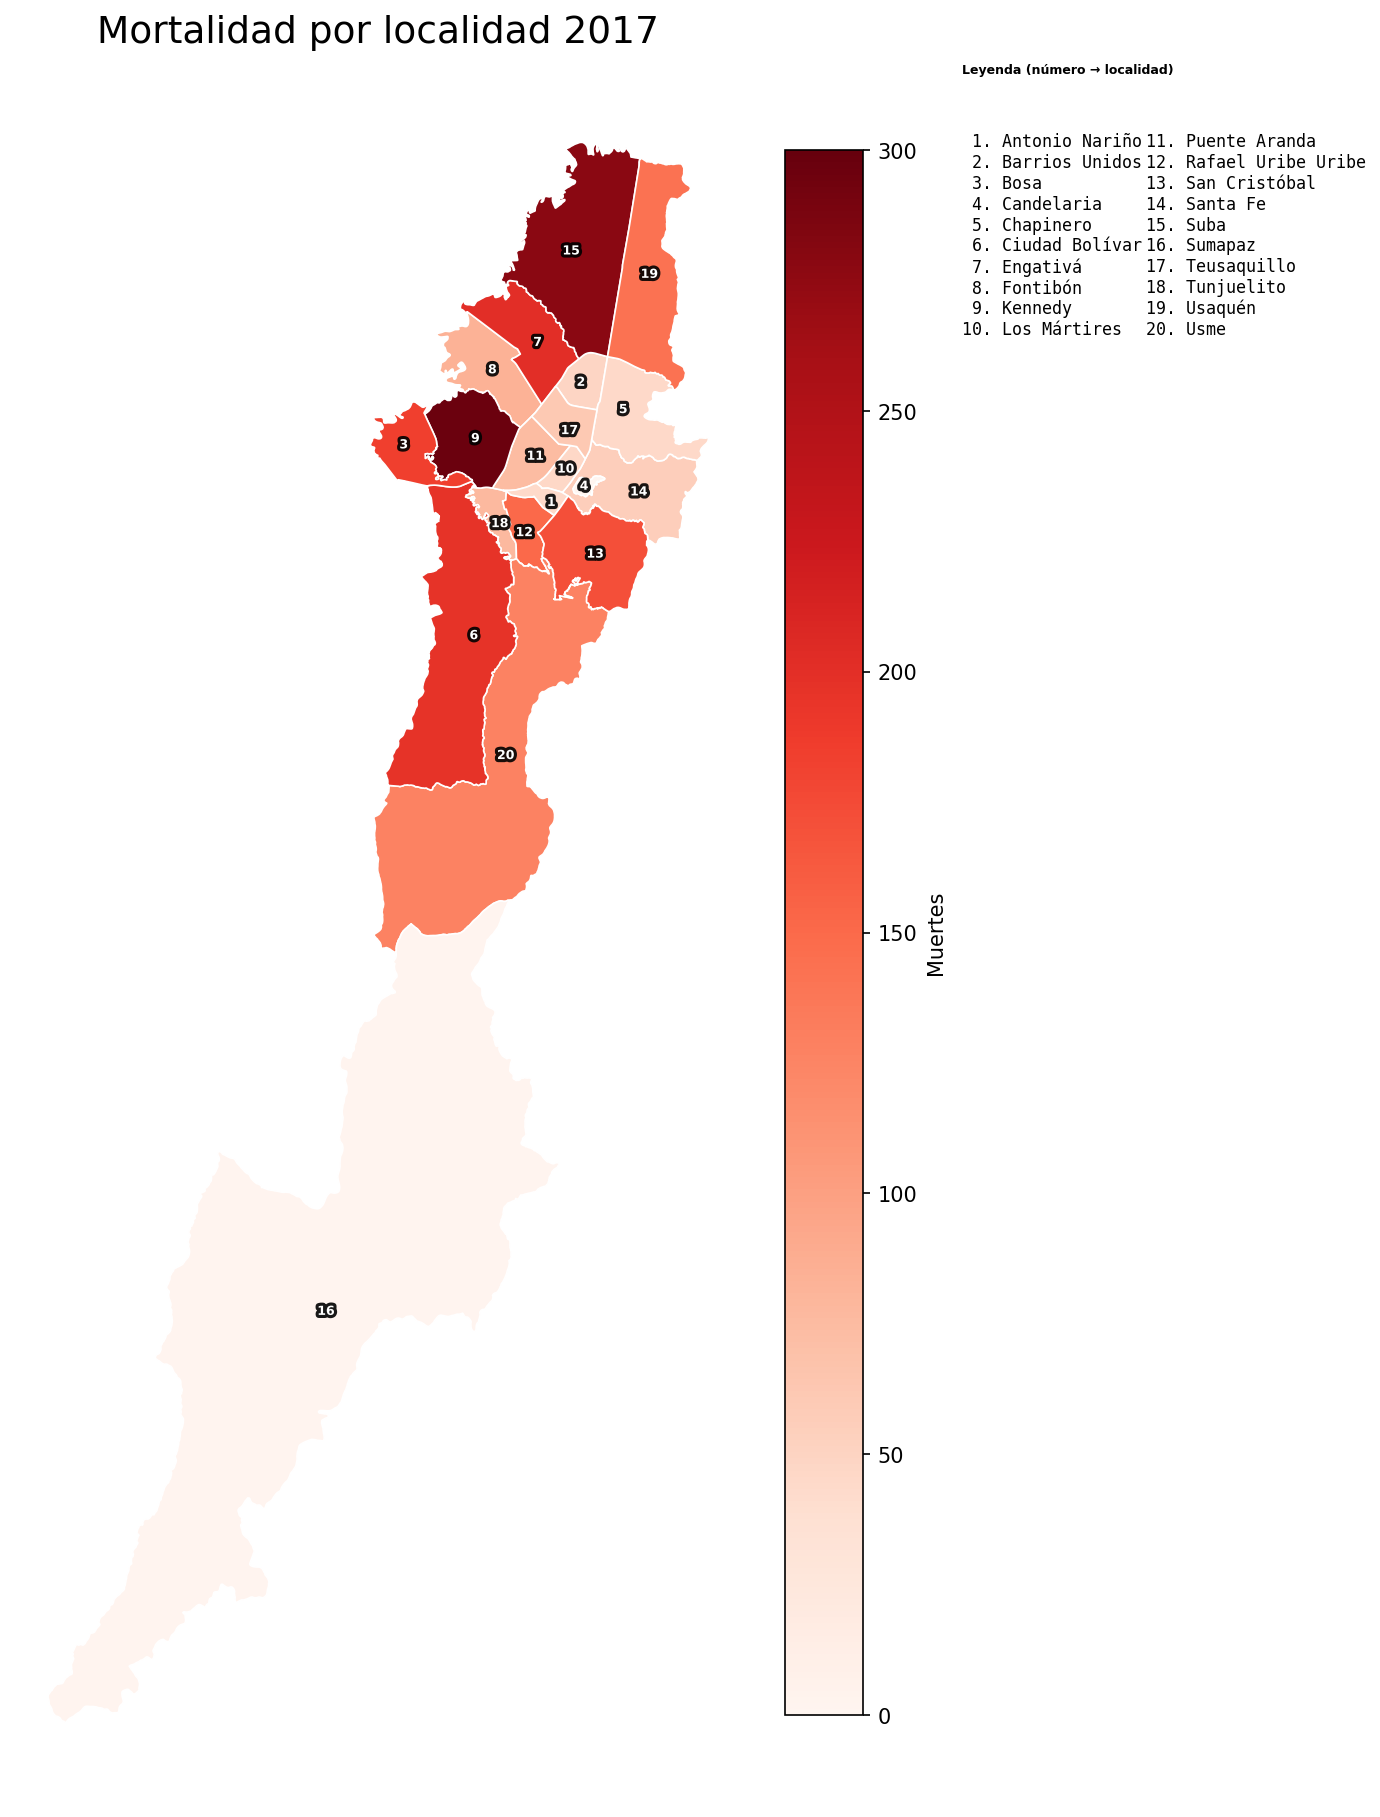

Mapa 2017.


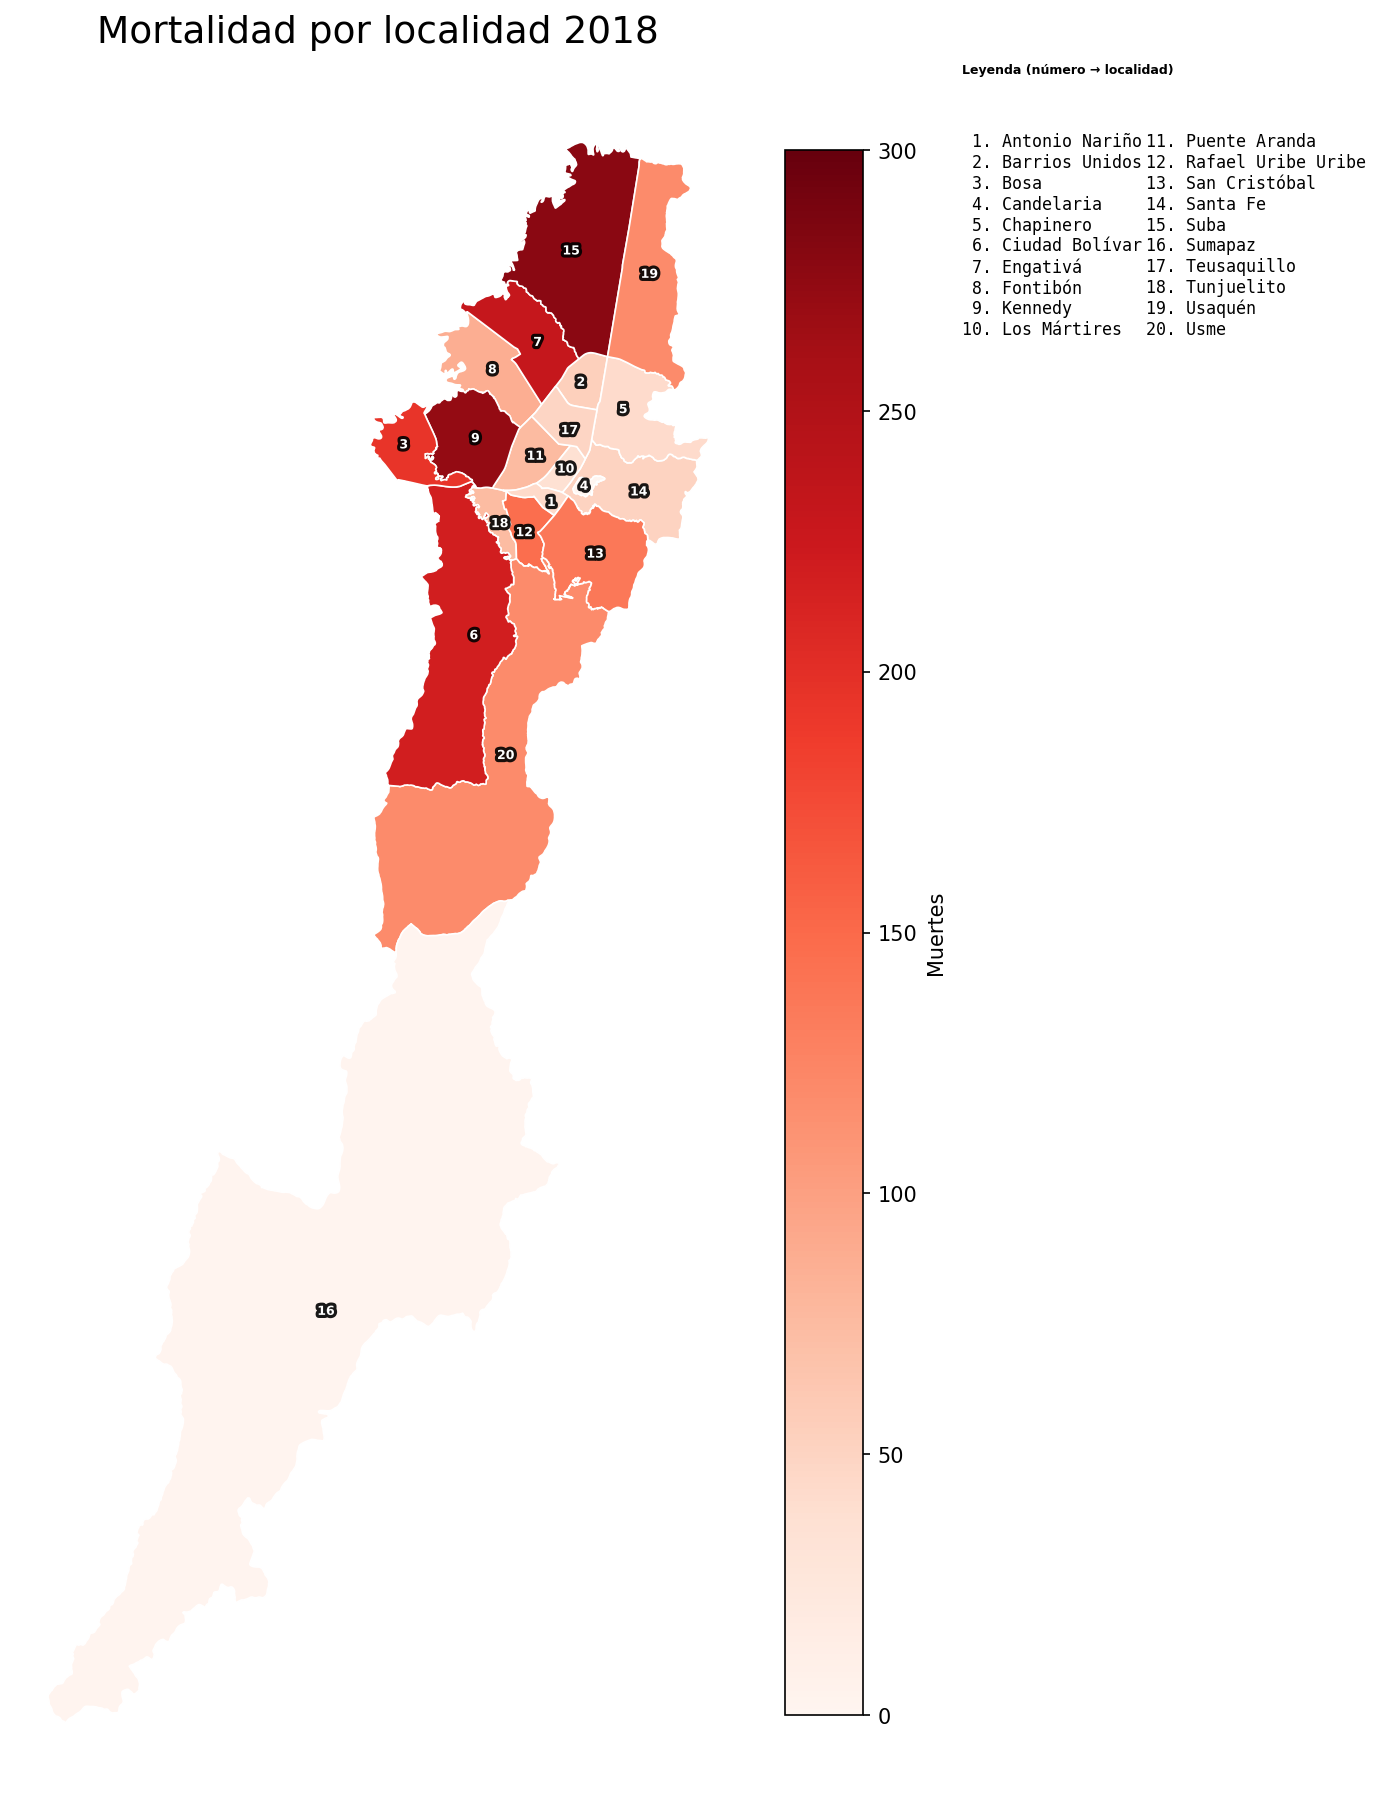

Mapa 2018.


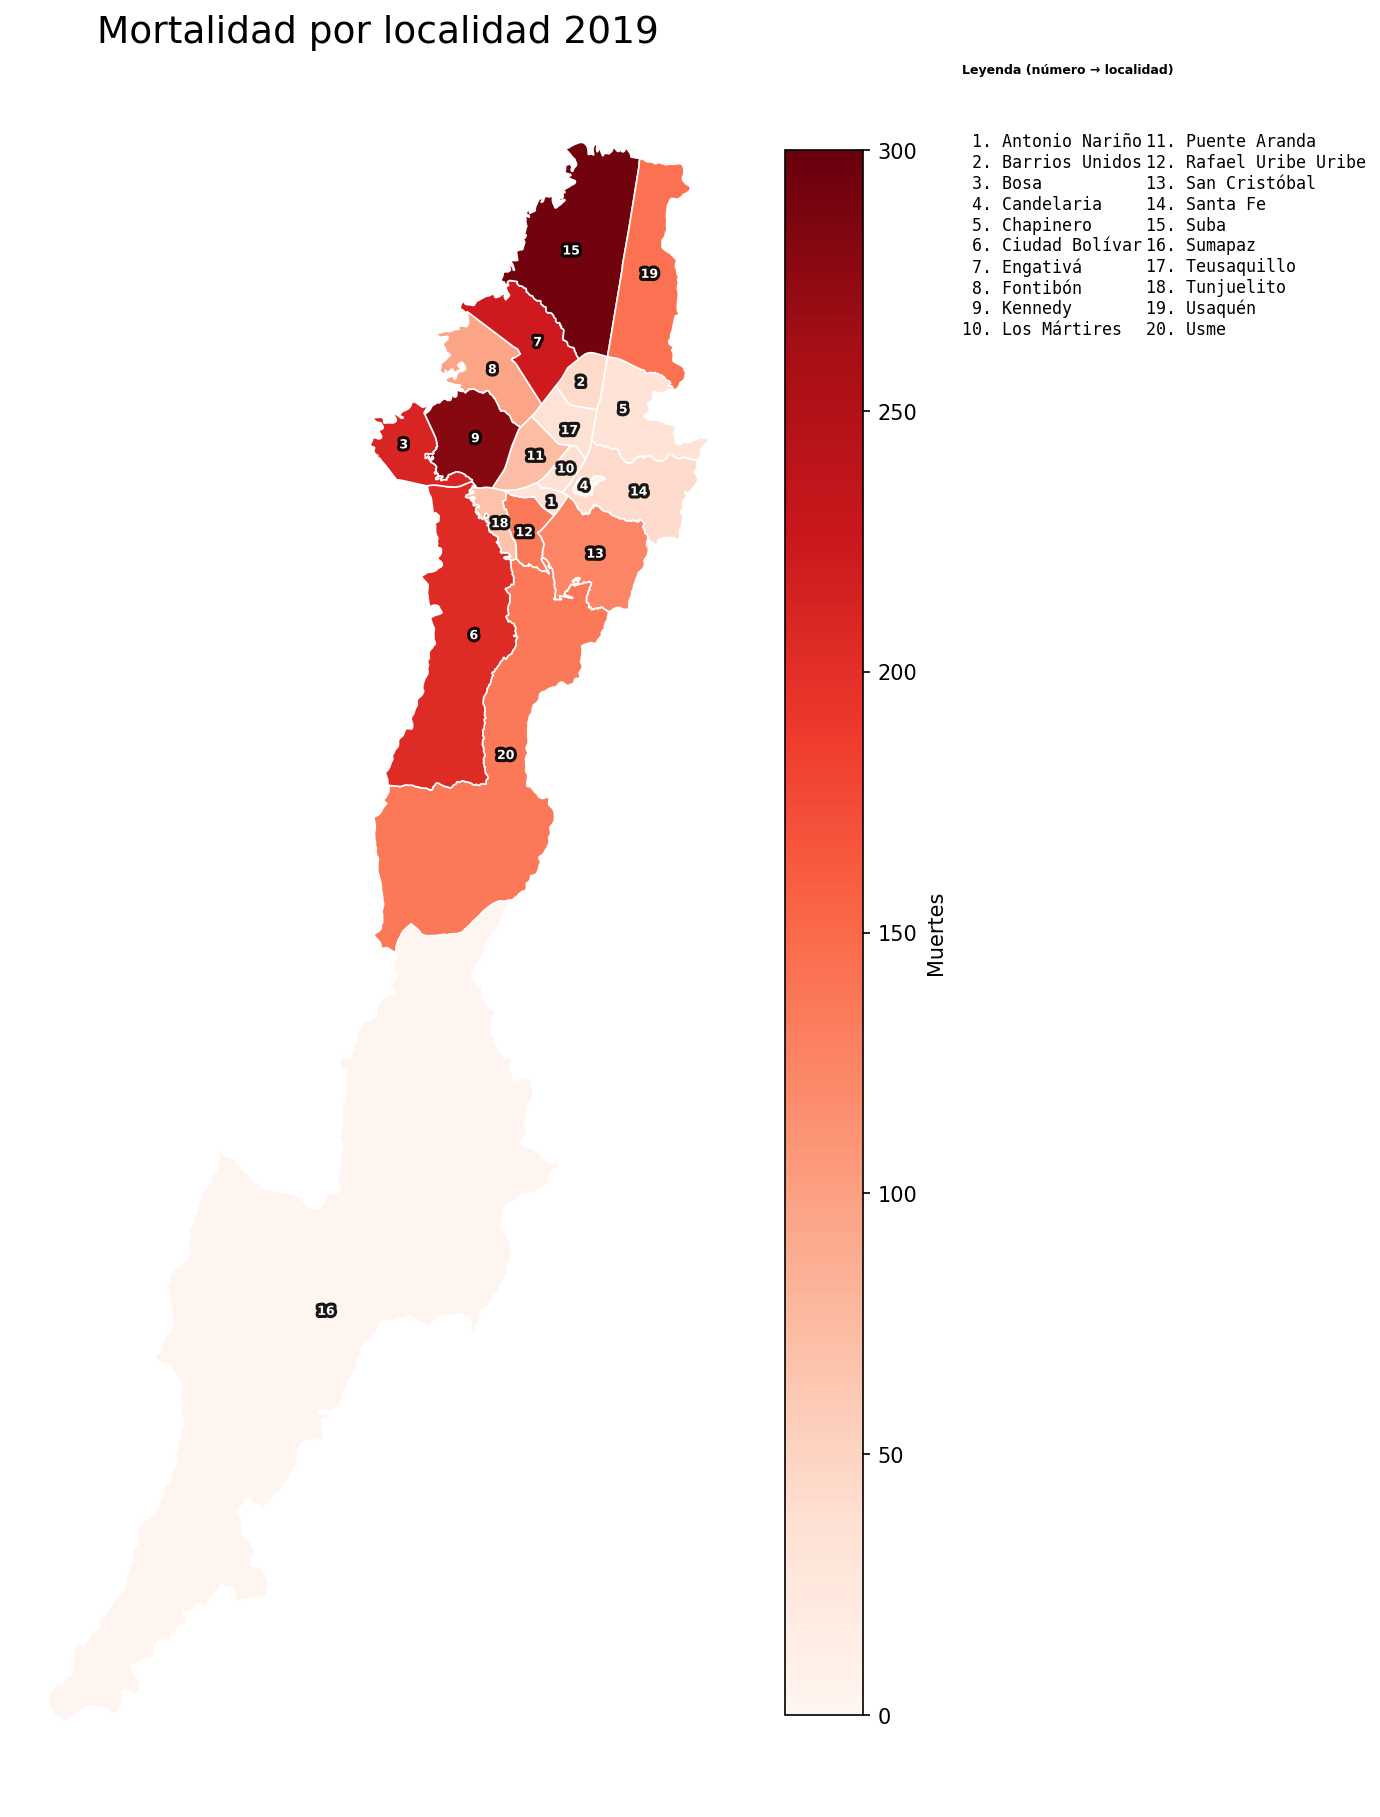

Mapa 2019.


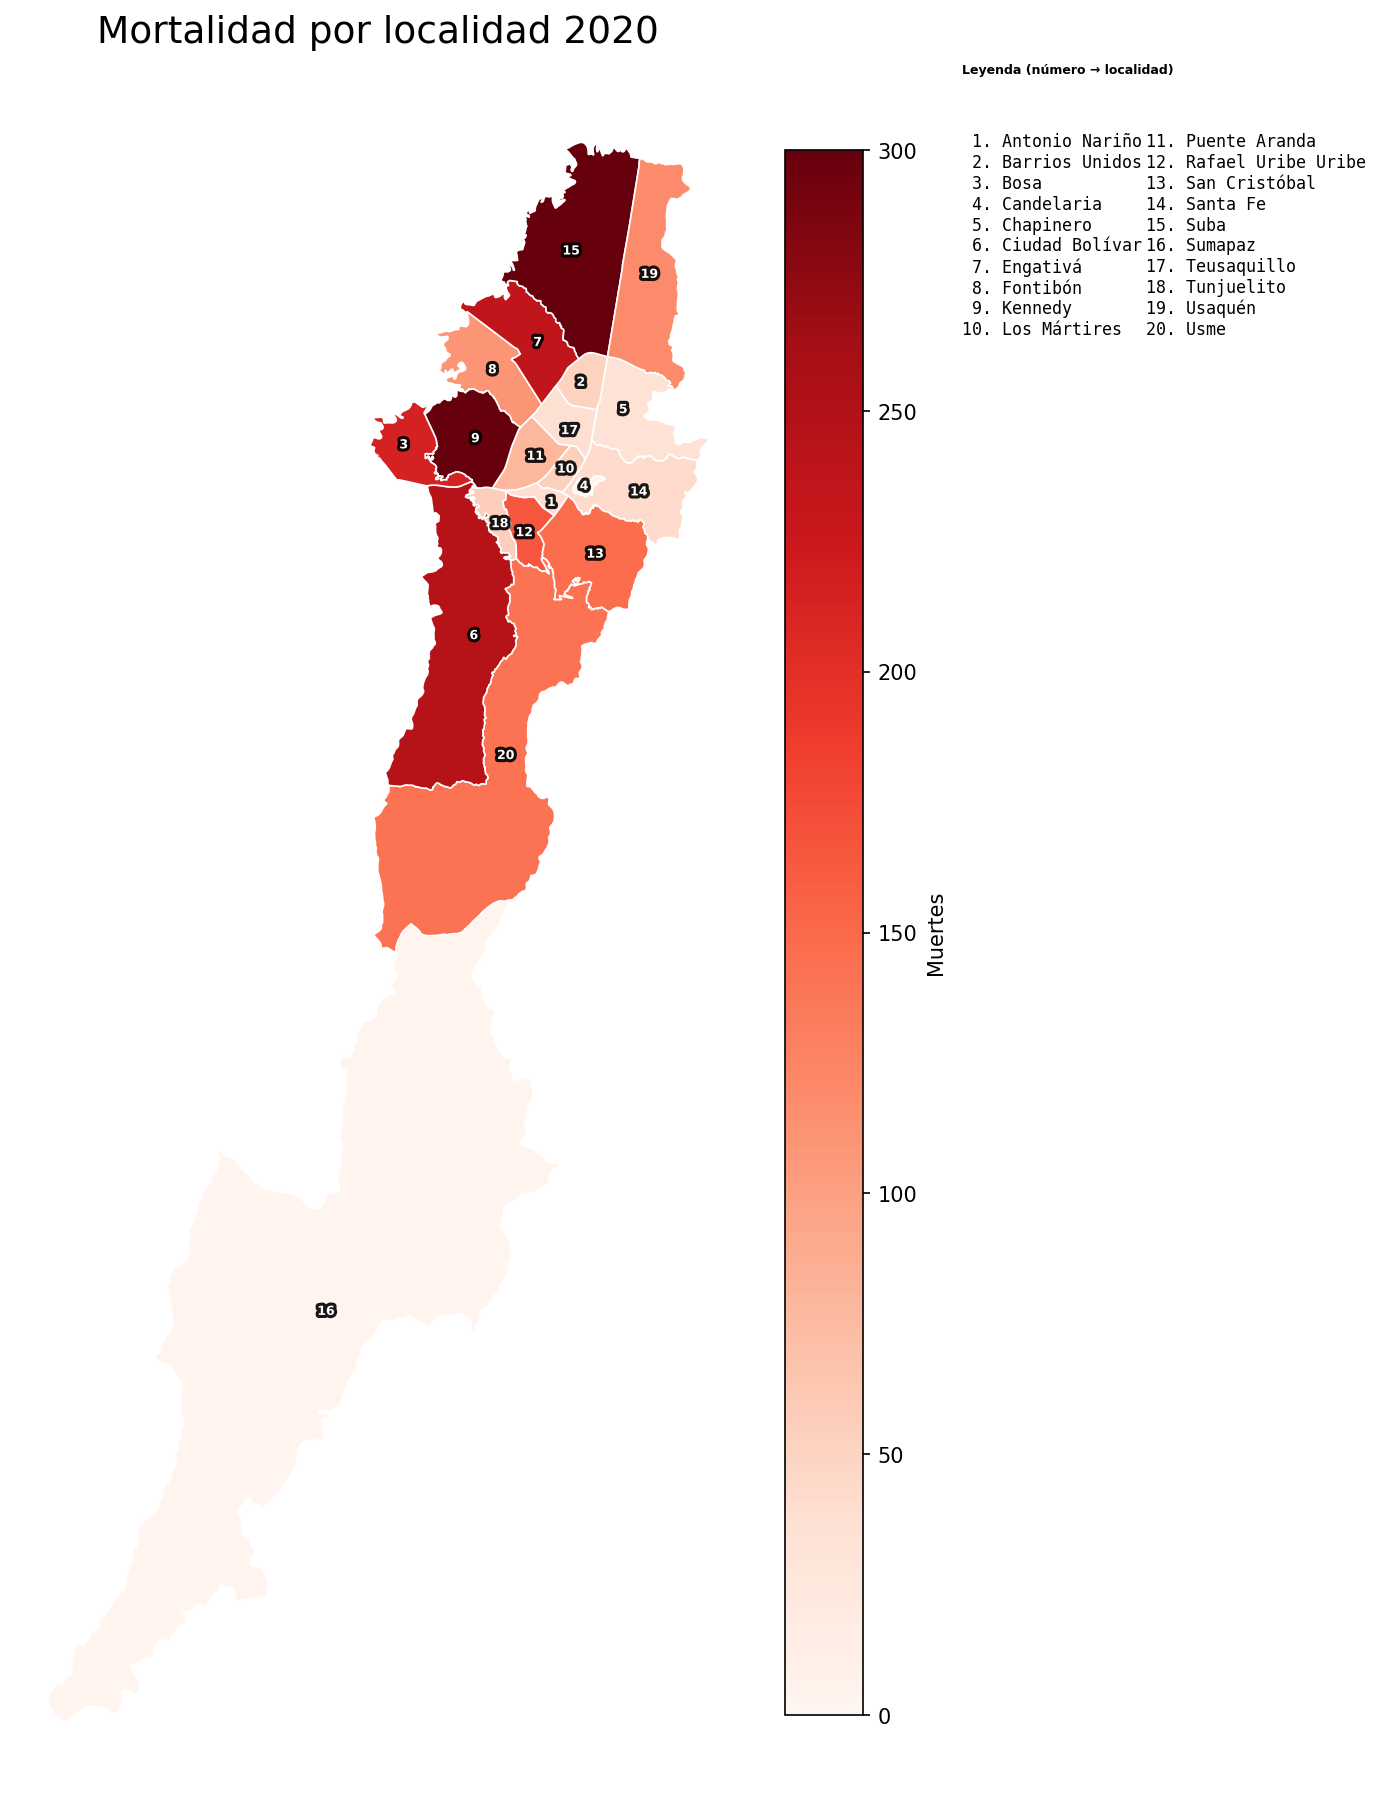

Mapa 2020.


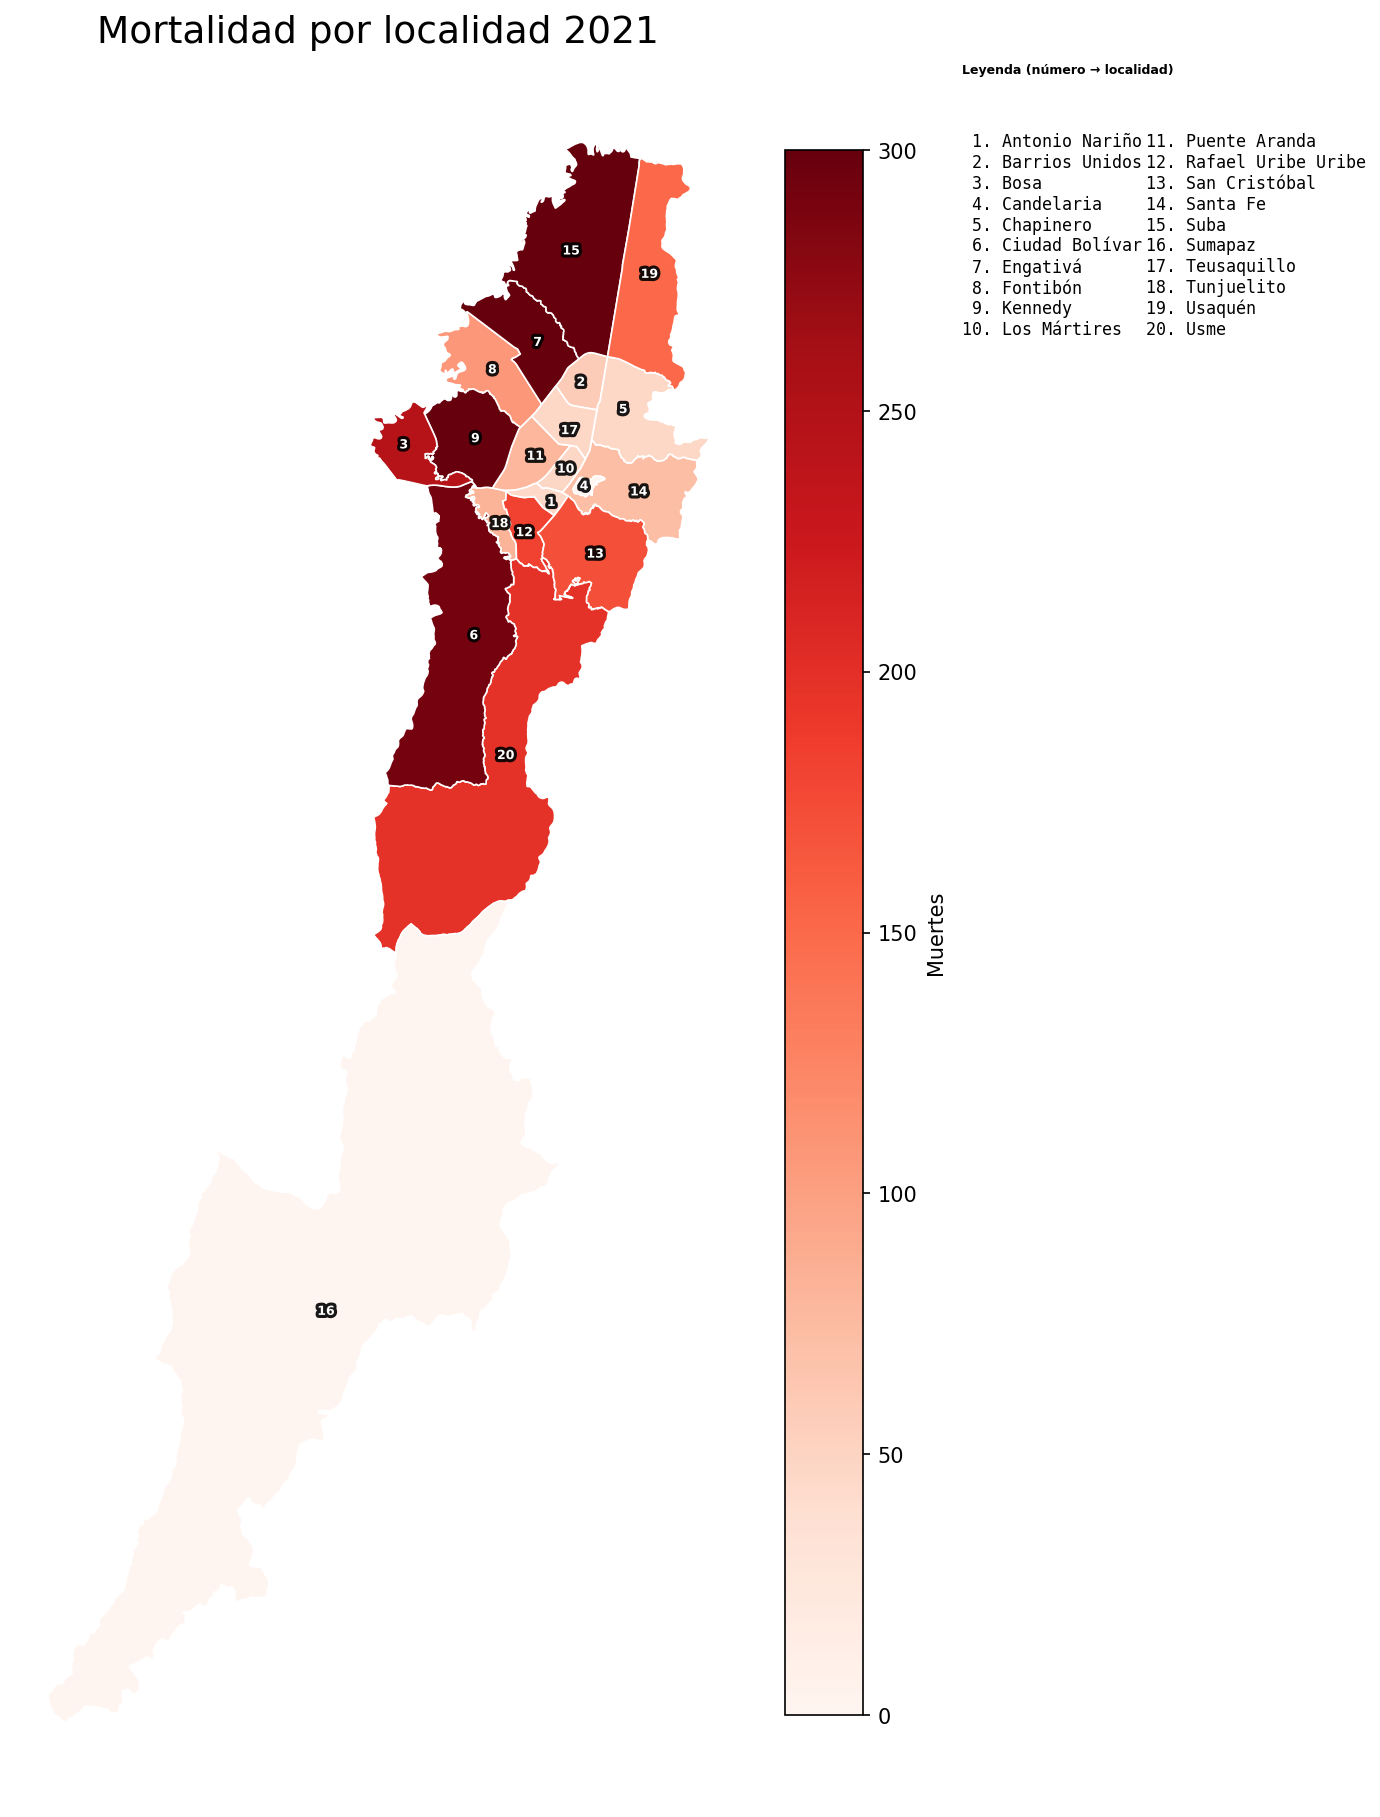

Mapa 2021.


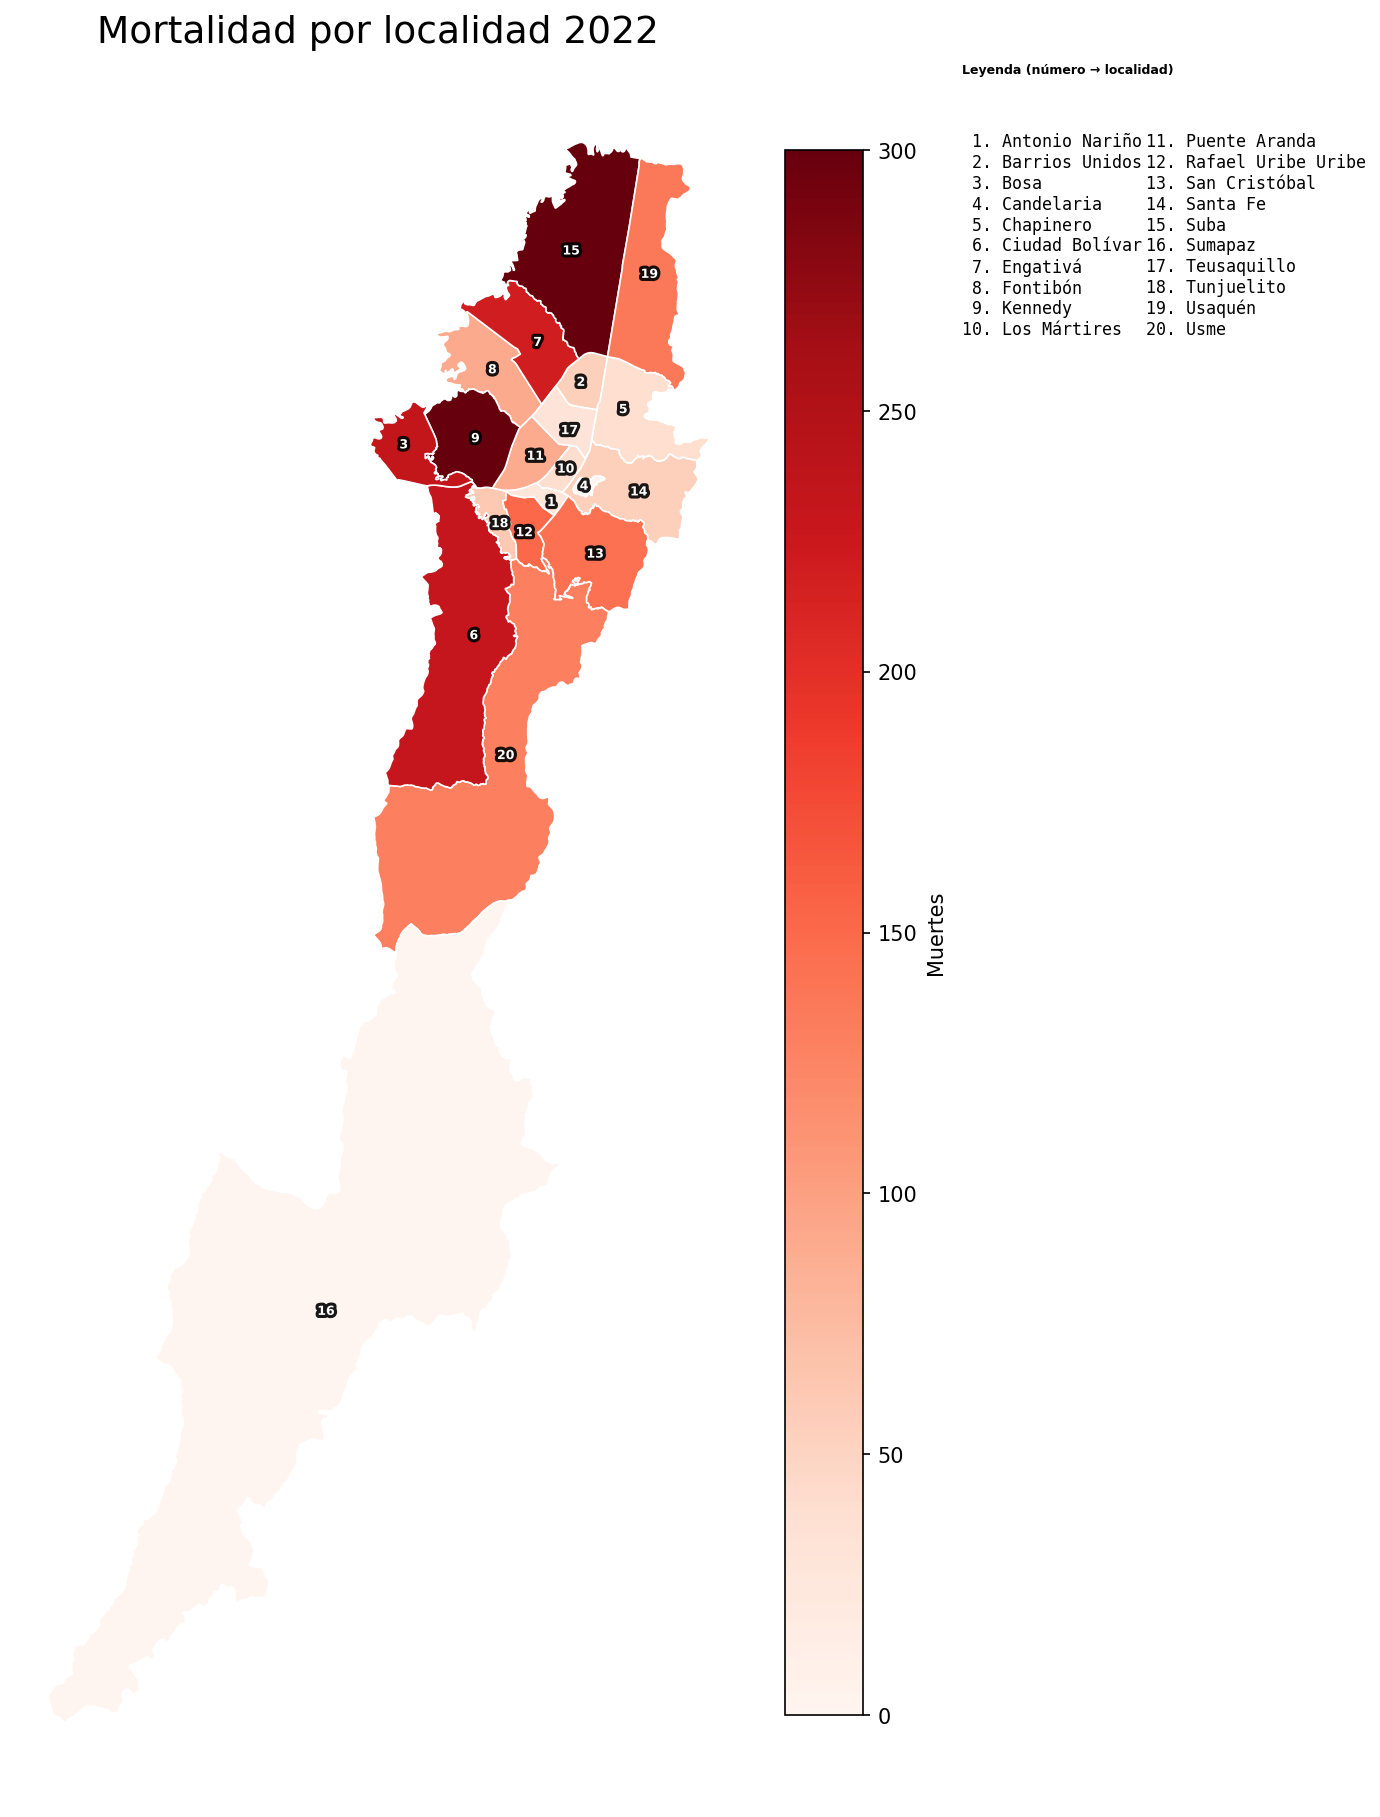

Mapa 2022.


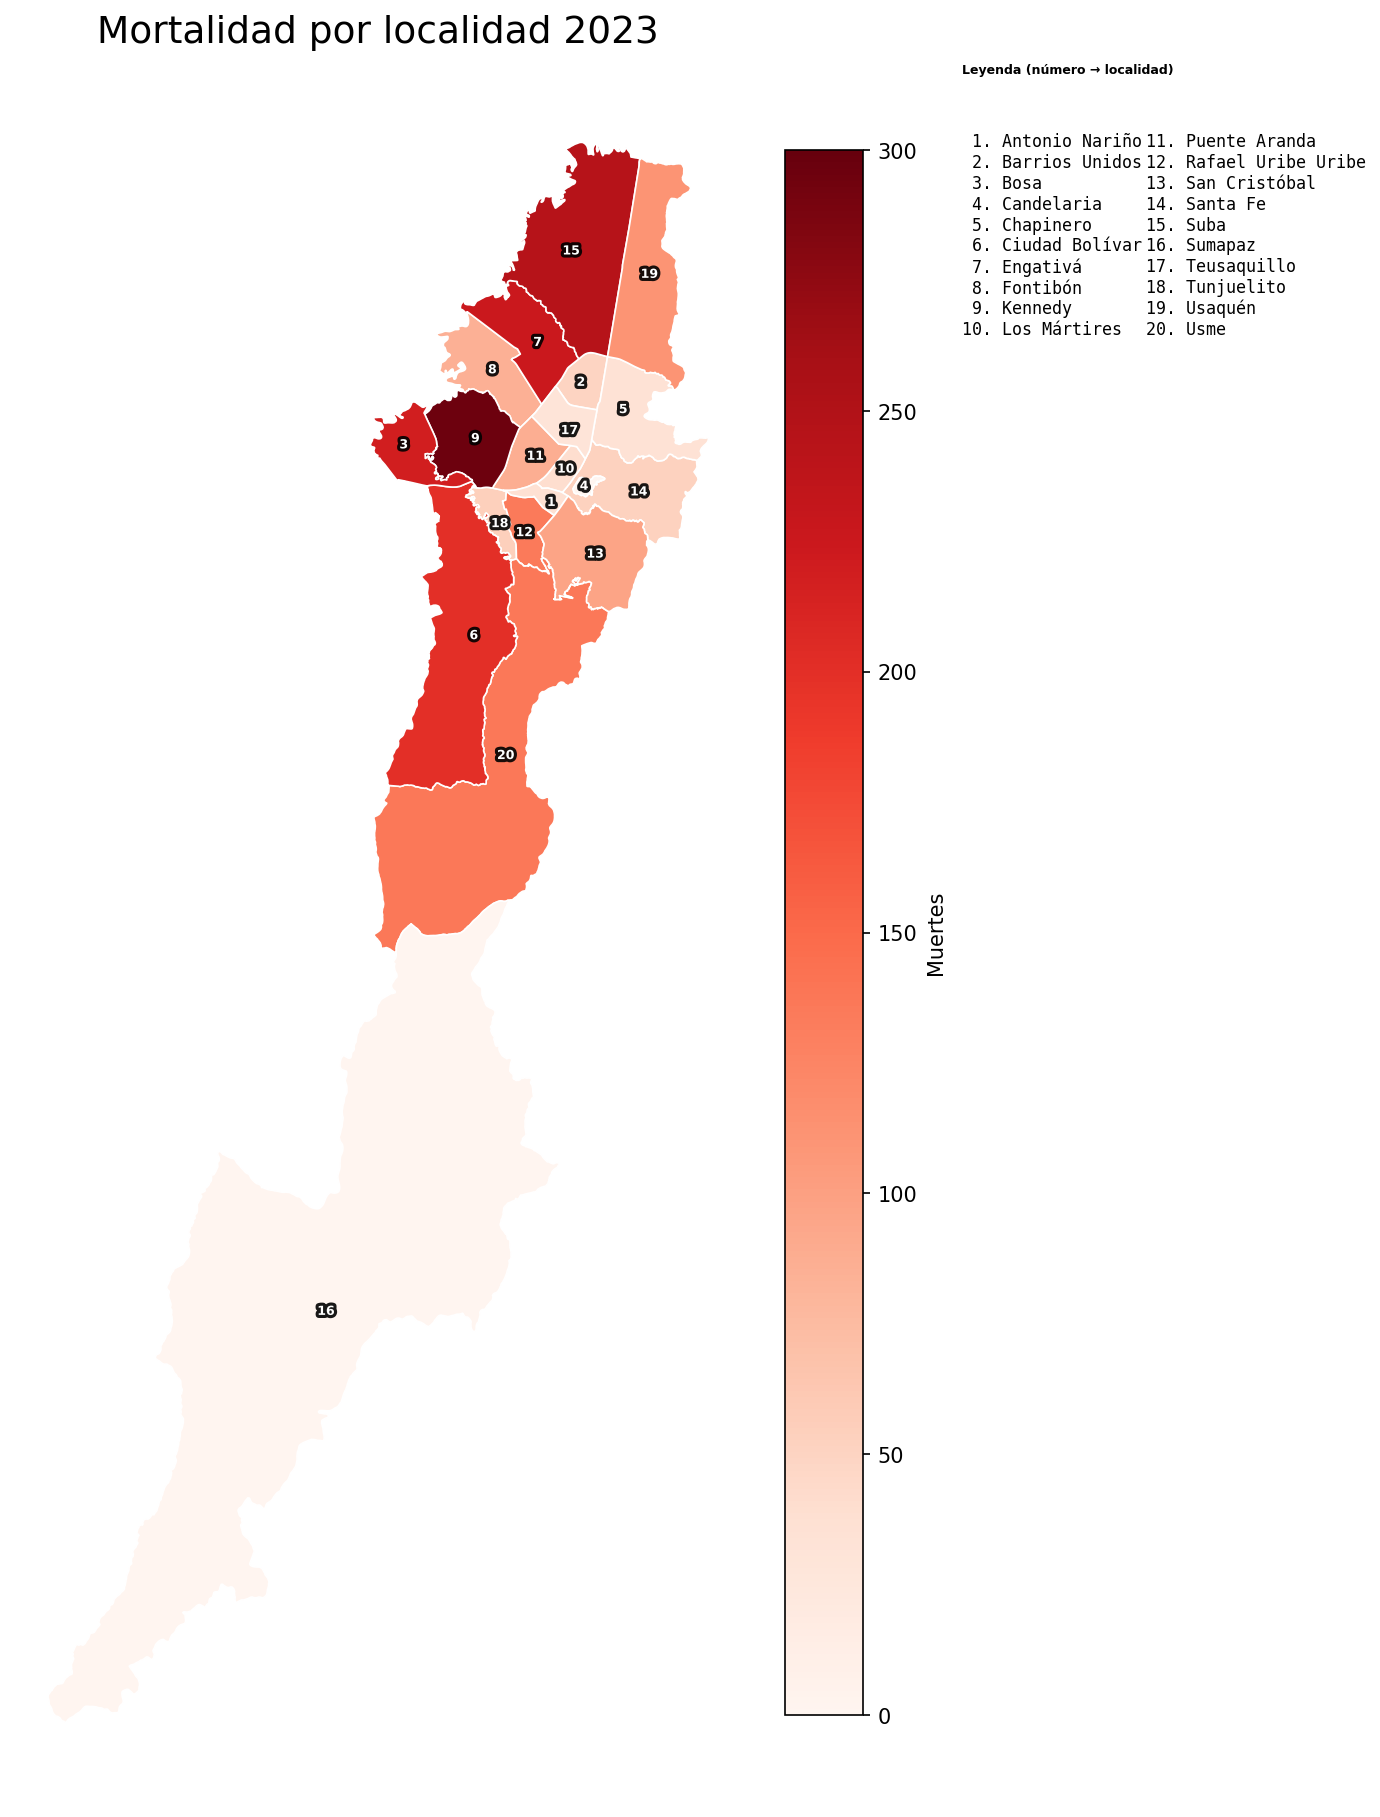

Mapa 2023.


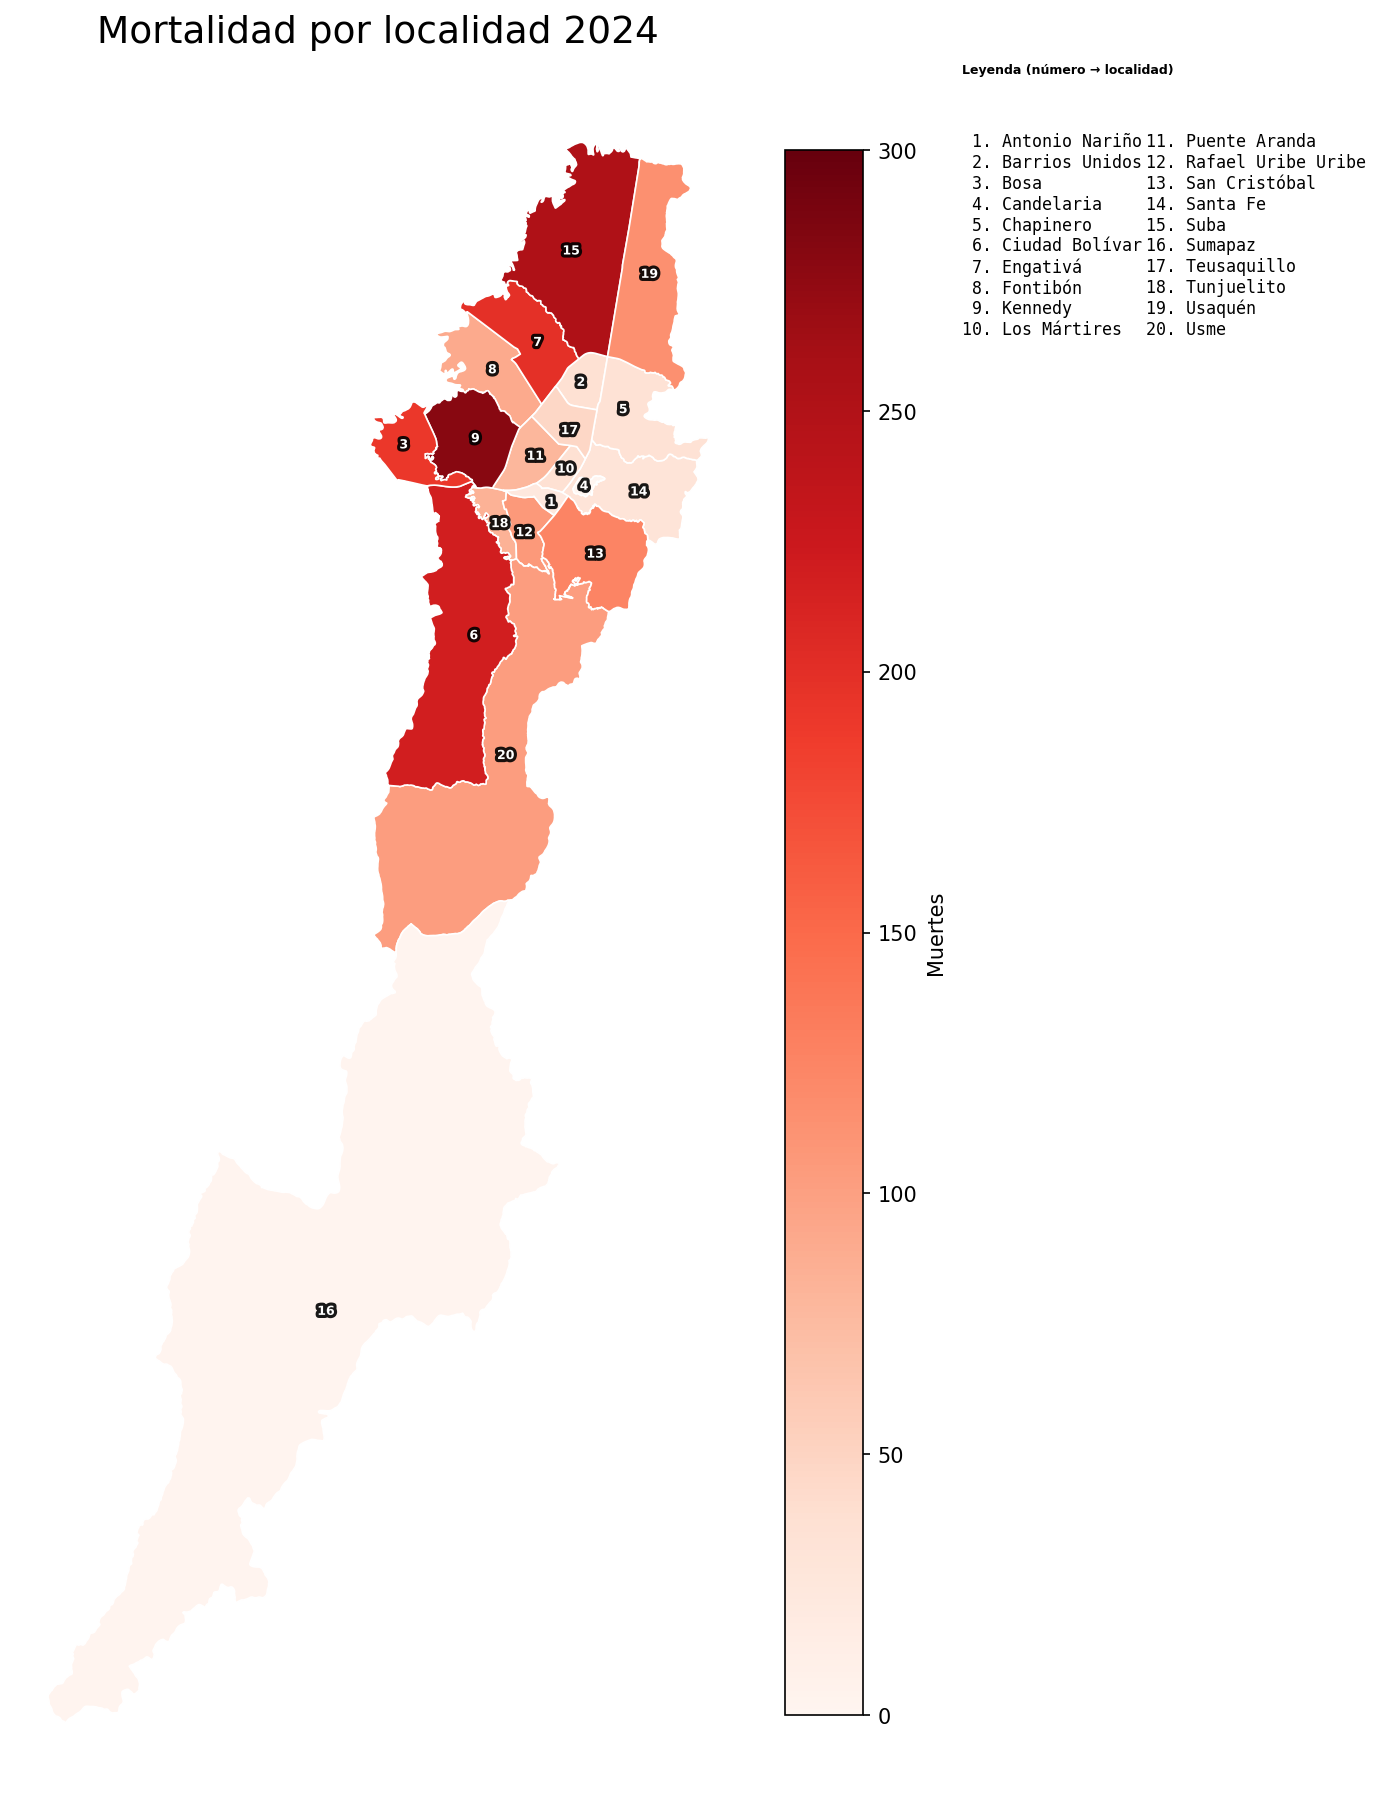

Mapa 2024.


In [ ]:


# ================== IMPORTS ==================
import os, unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patheffects as pe
import geopandas as gpd

# ================== 1) Normalizador ==================
def _key(s):
    if s is None:
        return None
    s = str(s).strip().upper().replace('-', ' ').replace('_', ' ')
    s = ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))
    return ' '.join(s.split())

# ================== 2) Cargar GDF ==================
CANDIDATOS = [
    "poligonos-localidades.geojson",
    "Localidades_Bogota.geojson",
    "localidades.geojson",
    "localidades.shp",
]
geo_path = next((p for p in CANDIDATOS if os.path.exists(p)), None)
if geo_path is None:
    raise FileNotFoundError(
        "No encontré el archivo geográfico de localidades. "
        "Guárdalo en la carpeta del proyecto con alguno de estos nombres: "
        + ", ".join(CANDIDATOS)
    )

gdf_raw = gpd.read_file(geo_path)

# Detectar columna de nombre
candidatas = {
    "LOCALIDAD","LOCALIDAD_NOMBRE","NOMBRE","NOMBRE_LOCA",
    "LOCNOMBRE","NOMB_LOCAL","NOM_LOC","NOM_LOCALIDAD"
}
name_col = None
for c in gdf_raw.columns:
    cu = str(c).upper()
    if cu in candidatas or any(tok in cu for tok in ["LOCAL","NOMB","NOMBRE"]):
        name_col = c
        break
if name_col is None:
    raise ValueError(f"No pude identificar la columna de nombre en {geo_path}. "
                     f"Columnas: {list(gdf_raw.columns)}")

gdf = gdf_raw.copy()
gdf["LOCALIDAD_STD"] = gdf[name_col].map(_key)

# ================== 3) Numeración fija 1..20 ==================
ORDERED = [
    "Antonio Nariño", "Barrios Unidos", "Bosa", "Candelaria", "Chapinero",
    "Ciudad Bolívar", "Engativá", "Fontibón", "Kennedy", "Los Mártires",
    "Puente Aranda", "Rafael Uribe Uribe", "San Cristóbal", "Santa Fe",
    "Suba", "Sumapaz", "Teusaquillo", "Tunjuelito", "Usaquén", "Usme"
]
PRETTY_MAP = {_key(n): n for n in ORDERED}
NUM_MAP    = {_key(n): i+1 for i, n in enumerate(ORDERED)}

gdf["LOCALIDAD_PRETTY"] = gdf["LOCALIDAD_STD"].map(PRETTY_MAP).fillna(gdf["LOCALIDAD_STD"])
gdf["NRO"] = gdf["LOCALIDAD_STD"].map(NUM_MAP)

# ================== 4) Agregar datos (df_std requerido) ==================
if "df_std" not in globals():
    raise RuntimeError("No encontré df_std. Debe existir con columnas ANO y LOCALIDAD_STD.")

df_base = df_std.copy()
df_base["ANO"] = pd.to_numeric(df_base["ANO"], errors="coerce").astype("Int64")
df_base["LOCALIDAD_STD"] = df_base["LOCALIDAD_STD"].map(_key)

# Filtrar solo localidades que están en el shapefile y años 2015–2024
localidades_validas = set(gdf["LOCALIDAD_STD"].dropna().unique().tolist())
mask_year = (df_base["ANO"] >= 2015) & (df_base["ANO"] <= 2024)
mask_loc  = df_base["LOCALIDAD_STD"].isin(localidades_validas)
df_base = df_base.loc[mask_year & mask_loc].dropna(subset=["ANO","LOCALIDAD_STD"])

muertes_loc_ano_ok = (
    df_base.groupby(["ANO","LOCALIDAD_STD"])
           .size().reset_index(name="muertes")
)

# ================== 5) Escala común ==================
q95 = muertes_loc_ano_ok["muertes"].quantile(0.95)
VMAX = int(np.ceil((q95 if np.isfinite(q95) else muertes_loc_ano_ok["muertes"].max())/10.0)*10)
VMAX = max(VMAX, 10)
print("VMAX (escala común):", VMAX)

# ================== 6) Función de ploteo ==================
def plot_conteos_year_numbered_clean(year:int, vmax:int=300, save_path=None):
    """
    Mapa en Reds con números 1–20 y panel de leyenda a la derecha (no encima).
    """
    dfy = muertes_loc_ano_ok[muertes_loc_ano_ok["ANO"] == year]
    gdfy = gdf.merge(dfy, on="LOCALIDAD_STD", how="left")
    gdfy["muertes"] = gdfy["muertes"].fillna(0).astype(int)

    # Figura con 2 paneles: mapa + leyenda aparte
    fig, (ax_map, ax_leg) = plt.subplots(
        ncols=2, nrows=1, figsize=(10, 12), dpi=150,
        gridspec_kw={"width_ratios": [3.2, 1.3]},
        constrained_layout=True
    )
    ax_leg.axis("off")

    # Mapa y colorbar
    gdfy.plot(
        column="muertes",
        cmap="Reds", vmin=0, vmax=vmax,
        legend=True, edgecolor="white", linewidth=0.8, ax=ax_map,
        legend_kwds={"label": "Muertes", "shrink": 0.9,
                     "ticks": list(range(0, vmax+1, 50))}
    )
    ax_map.set_title(f"Mortalidad por localidad {y}",
                     fontsize=18, pad=10)
    ax_map.axis("off")

    # Números 1–20 en los polígonos
    for _, r in gdfy.iterrows():
        nro = NUM_MAP.get(r["LOCALIDAD_STD"])
        if nro is None:
            continue
        pt = r.geometry.representative_point()
        ax_map.text(
            pt.x, pt.y, f"{int(nro)}",
            ha="center", va="center",
            fontsize=6, fontweight="bold", color="white",
            path_effects=[pe.withStroke(linewidth=3, foreground="black", alpha=0.9)]
        )

    # ==== Leyenda en panel derecho ====
    pairs = sorted([(NUM_MAP.get(k), PRETTY_MAP.get(k, k)) for k in gdf["LOCALIDAD_STD"].unique() if NUM_MAP.get(k)], key=lambda t: t[0])
    lines = [f"{n:>2}. {name}" for n, name in pairs]

    # 2 columnas para que sea compacta
    mid = (len(lines)+1)//2
    col1 = "\n".join(lines[:mid])
    col2 = "\n".join(lines[mid:])

    ax_leg.text(0.0, 1.0, "Leyenda (número → localidad)", fontsize=6,
                fontweight="bold", va="top")
    ax_leg.text(0.0, 0.96, col1, fontsize=8, va="top", family="monospace")
    ax_leg.text(0.52, 0.96, col2, fontsize=8, va="top", family="monospace")

    # Guardar y mostrar
    plt.show()

# ================== 7) Guardar y MOSTRAR todos los años ==================
for y in sorted(muertes_loc_ano_ok["ANO"].dropna().unique()):
    y = int(y)
    if y == 2025:
        continue
    plot_conteos_year_numbered_clean(y, vmax=VMAX, save_path=f"mapa_{y}_rojos.png")
    print(f"Mapa {y}.")




/tmp/ipython-input-491753776.py:13: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



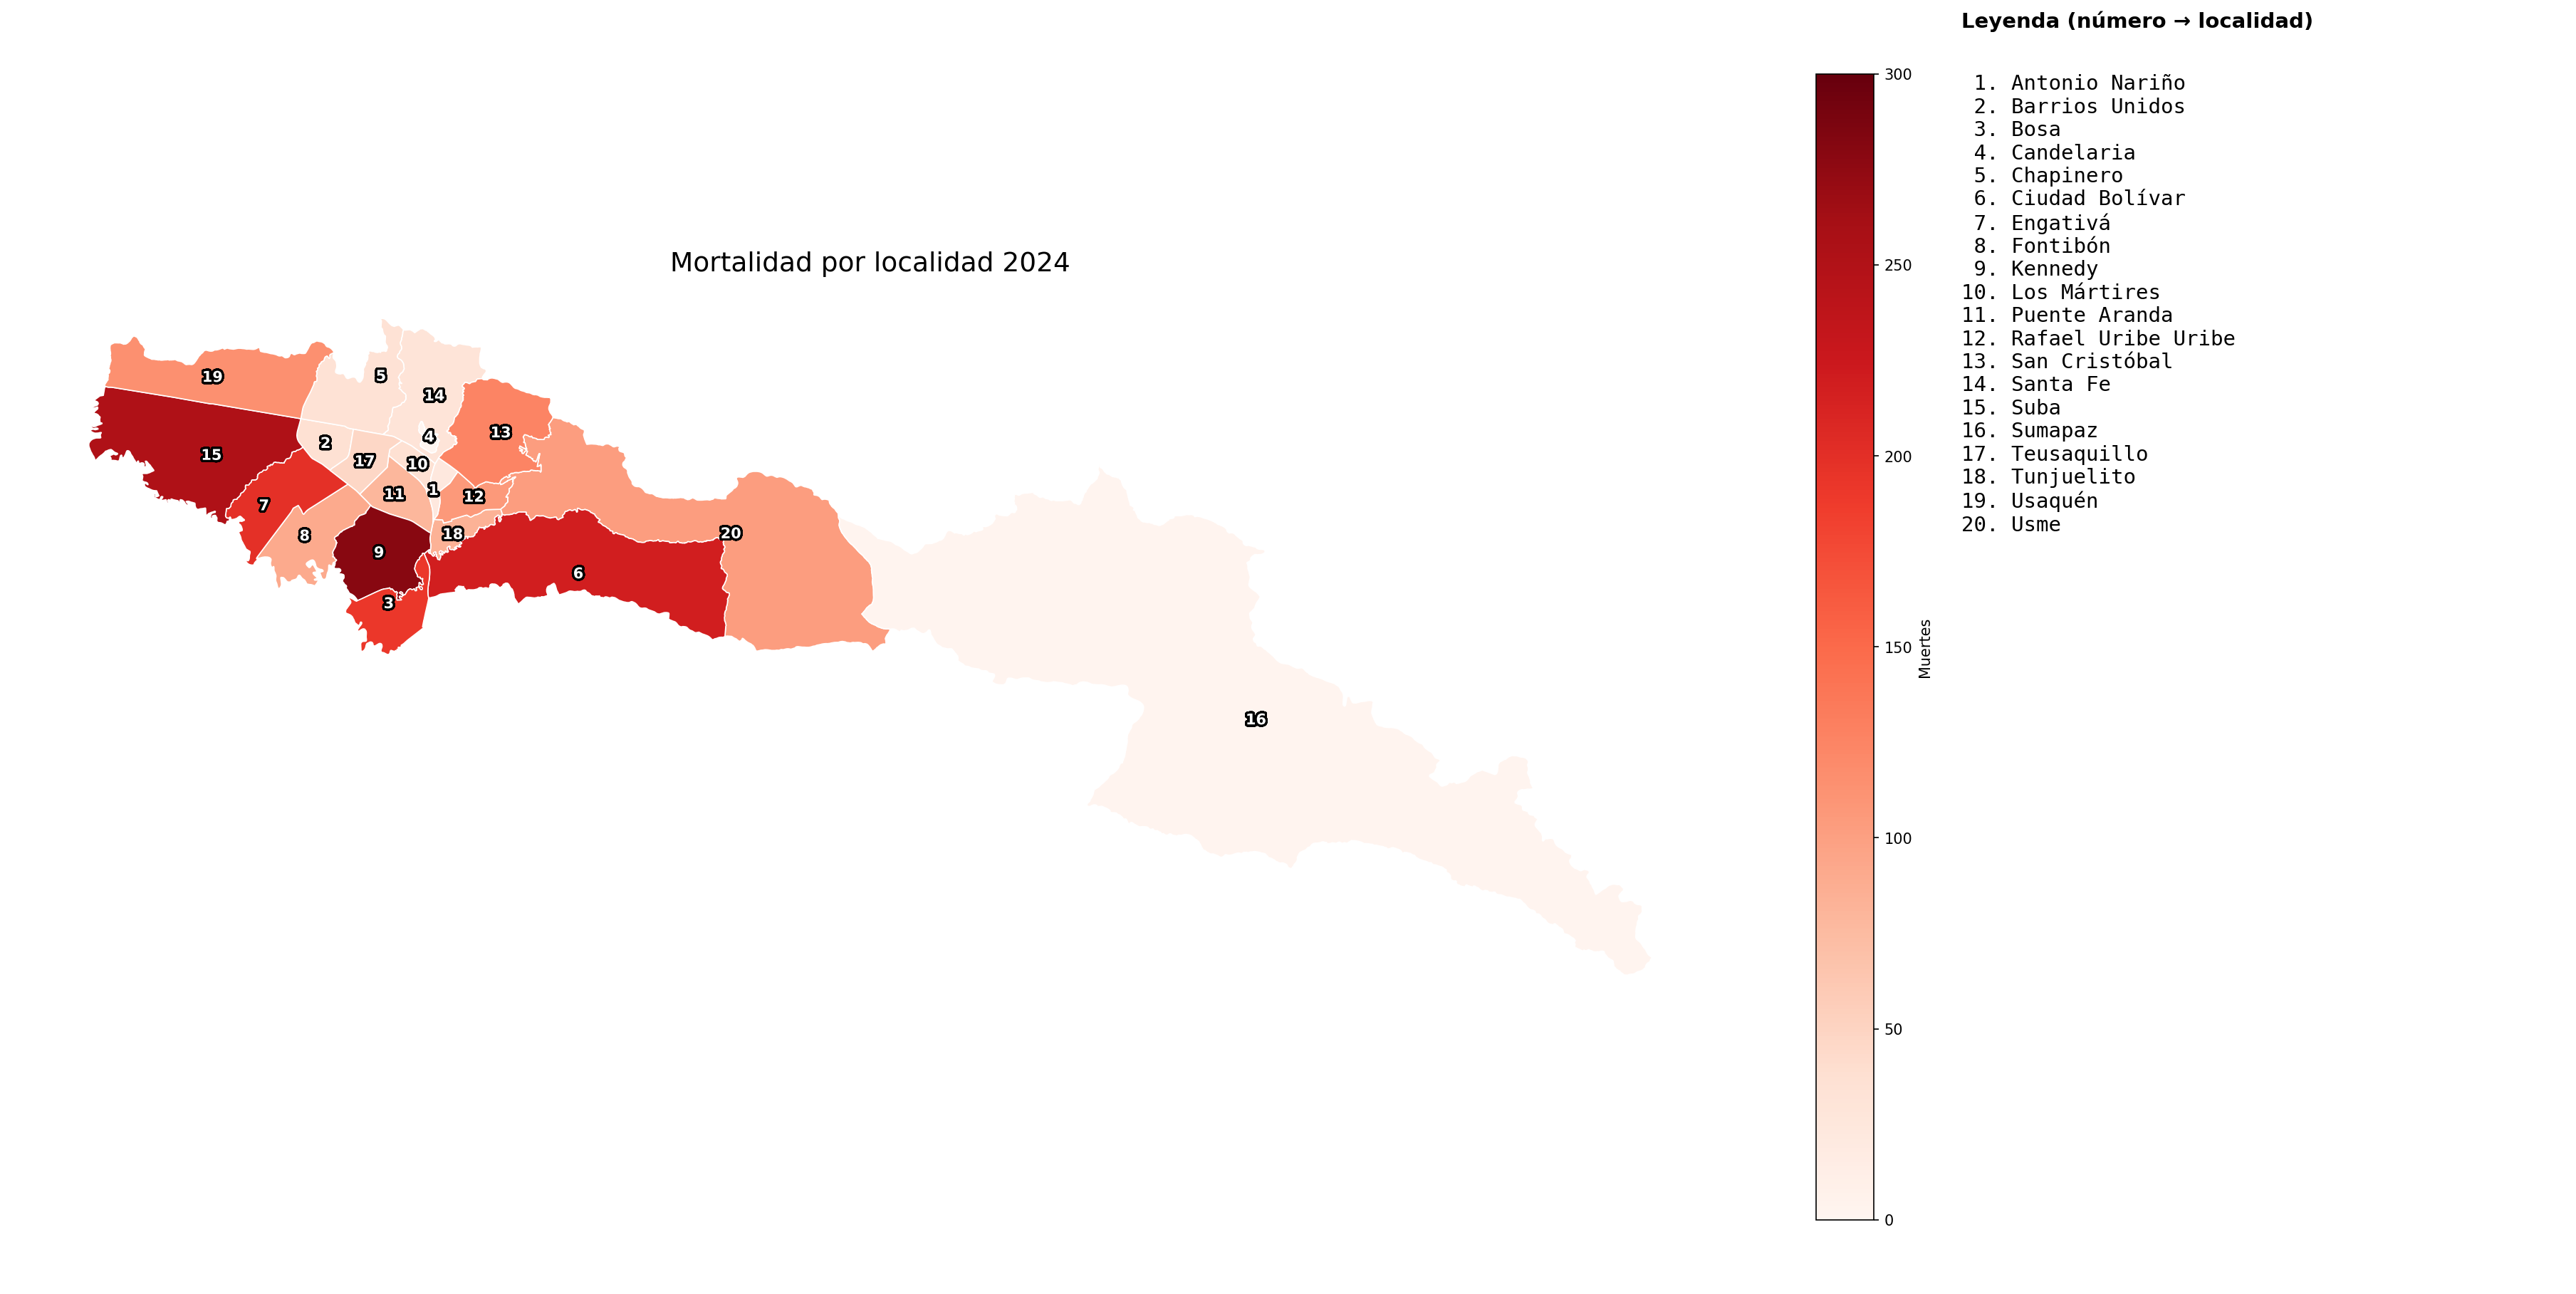

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import patheffects as pe
from matplotlib.animation import FuncAnimation
from shapely import affinity

# === Preparar datos ===
years = sorted(muertes_loc_ano_ok["ANO"].dropna().unique())
years = [int(y) for y in years if y <= 2024]

# === Rotar geometrías 90° antihorario ===
gdf_rot = gdf.copy()
# Usamos el centroide de toda Bogotá como origen de rotación
origin = gdf.unary_union.centroid
gdf_rot["geometry"] = gdf_rot["geometry"].apply(lambda geom: affinity.rotate(geom, 90, origin=origin))

# === Crear figura ===
fig, (ax_map, ax_leg) = plt.subplots(
    ncols=2, nrows=1, figsize=(24, 12), dpi=150,
    gridspec_kw={"width_ratios": [3.7, 1.3]},
    constrained_layout=True
)
ax_leg.axis("off")

# ==== Crear primer mapa con colorbar (estático) ====
dfy0 = muertes_loc_ano_ok[muertes_loc_ano_ok["ANO"] == years[0]]
gdfy0 = gdf_rot.merge(dfy0, on="LOCALIDAD_STD", how="left")
gdfy0["muertes"] = gdfy0["muertes"].fillna(0).astype(int)

base_plot = gdfy0.plot(
    column="muertes",
    cmap="Reds", vmin=0, vmax=VMAX,
    legend=True, edgecolor="white", linewidth=0.6, ax=ax_map,
    legend_kwds={"label": "Muertes", "shrink": 0.9,
                 "ticks": list(range(0, VMAX+1, 50))}
)
ax_map.axis("off")

# ==== Función de actualización ====
def update(year):
    # borrar solo los parches de polígonos (lo que gdf.plot dibuja)
    for coll in list(ax_map.collections):
        coll.remove()

    dfy = muertes_loc_ano_ok[muertes_loc_ano_ok["ANO"] == year]
    gdfy = gdf_rot.merge(dfy, on="LOCALIDAD_STD", how="left")
    gdfy["muertes"] = gdfy["muertes"].fillna(0).astype(int)

    # Actualizar solo polígonos (sin volver a crear colorbar)
    gdfy.plot(
        column="muertes",
        cmap="Reds", vmin=0, vmax=VMAX,
        legend=False, edgecolor="white", linewidth=0.8, ax=ax_map
    )
    ax_map.set_title(f"Mortalidad por localidad {year}", fontsize=18, pad=10)

    # Números sobre cada localidad
    for _, r in gdfy.iterrows():
        nro = NUM_MAP.get(r["LOCALIDAD_STD"])
        if nro:
            pt = r.geometry.representative_point()
            ax_map.text(
                pt.x, pt.y, f"{int(nro)}",
                ha="center", va="center",
                fontsize=10, fontweight="bold", color="white",
                path_effects=[pe.withStroke(linewidth=3, foreground="black", alpha=0.9)]
            )

    # Leyenda de la derecha
    # Leyenda de la derecha en una sola columna
    ax_leg.clear()
    ax_leg.axis("off")
    pairs = sorted([(NUM_MAP.get(k), PRETTY_MAP.get(k, k))
                    for k in gdf_rot["LOCALIDAD_STD"].unique() if NUM_MAP.get(k)],
                   key=lambda t: t[0])
    lines = [f"{n:>2}. {name}" for n, name in pairs]

    ax_leg.text(0.0, 1.0, "Leyenda (número → localidad)", fontsize=14,
                fontweight="bold", va="top")
    ax_leg.text(0.0, 0.95, "\n".join(lines), fontsize=14,
                va="top", family="monospace")

# ==== Animación ====
ani = FuncAnimation(fig, update, frames=years, interval=3000, repeat=True)
ani.save("mapas_bogota.mp4", writer="ffmpeg", fps=0.5)
plt.show()


### **7.3. Visualizaciones Interactivas**
---

* Cree visualizaciones interactivas, como gráficos dinámicos o tableros interactivos y proporcione instrucciones claras sobre cómo interactuar con ellos.
* Explore cómo estas visualizaciones ayudan en la exploración de datos y documente su análisis.

In [ ]:
import plotly.express as px
# Agrupar datos
df_grouped = df_final[df_final["LOCALIDAD"] != "00 - Bogotá"].groupby(
    ["LOCALIDAD", "CIE10_GRUPO"]
).agg(
    total_muertes=("SEXO", "count"),
    hombres=("SEXO", lambda x: (x == "MASCULINO").sum()),
    mujeres=("SEXO", lambda x: (x == "FEMENINO").sum()),
    edad_promedio=("EDAD_FALLECIDO", "mean")
).reset_index()

# Treemap interactivo
fig = px.treemap(
    df_grouped,
    path=['LOCALIDAD', 'CIE10_GRUPO'],
    values='total_muertes',
    color='edad_promedio',
    color_continuous_scale="Viridis",
    title="Muertes por localidad y grupo de enfermedad",
    custom_data=["hombres", "mujeres", "edad_promedio"]
)
# Personalizar tooltip

fig.update_traces(
    textinfo="label",
    textfont=dict(size=19, color="white", family="Arial"),
    hovertemplate=(
        "<b>%{label}</b><br>" +
        "Total muertes: %{value}<br>" +
        "Hombres: %{customdata[0]}<br>" +
        "Mujeres: %{customdata[1]}<br>" +
        "Edad promedio: %{customdata[2]:.1f}"
    )
)
fig.update_traces(
    textfont=dict(size=22),               # tamaño global
    selector=dict(level=0)                # nivel 1 → subcategorías
)

fig.show()

Calculo de tasas 100.000

In [ ]:
# Placeholder Population Data (Replace with actual population data if available)
# Assuming a constant population for each locality and year for demonstration purposes
# In a real scenario, you would load this data from a separate source
df_std = df_std[df_std["LOCALIDAD"] != "00 - Bogotá"]
localidades = df_std["LOCALIDAD_STD"].dropna().unique().tolist()
años = sorted(df_std["ANO"].dropna().unique().tolist())

# Create a DataFrame with placeholder population data
# You would replace this with your actual population data per locality and year
poblacion_data = []
for año in años:
    for localidad in localidades:
        # Placeholder population value (can be adjusted)
        poblacion = 100000
        poblacion_data.append({"ANO": año, "LOCALIDAD_STD": localidad, "POBLACION": poblacion})

df_poblacion = pd.DataFrame(poblacion_data)

# Calculate deaths per locality and year
muertes_loc_ano = (
    df_std.dropna(subset=["ANO","LOCALIDAD_STD"])
          .groupby(["ANO","LOCALIDAD_STD"])
          .size()
          .reset_index(name="MUERTES")
)

# Merge deaths and population data
tasas = pd.merge(muertes_loc_ano, df_poblacion, on=["ANO", "LOCALIDAD_STD"], how="left")

# Calculate the rate per 100,000
tasas["TASA_100K"] = (tasas["MUERTES"] / tasas["POBLACION"]) * 100000

display(tasas.head())

ANO   LOCALIDAD_STD  MUERTES  POBLACION  TASA_100K
0  2015  ANTONIO NARINO       38     100000       38.0
1  2015  BARRIOS UNIDOS       47     100000       47.0
2  2015            BOSA      176     100000      176.0
3  2015       CHAPINERO       34     100000       34.0
4  2015  CIUDAD BOLIVAR      196     100000      196.0

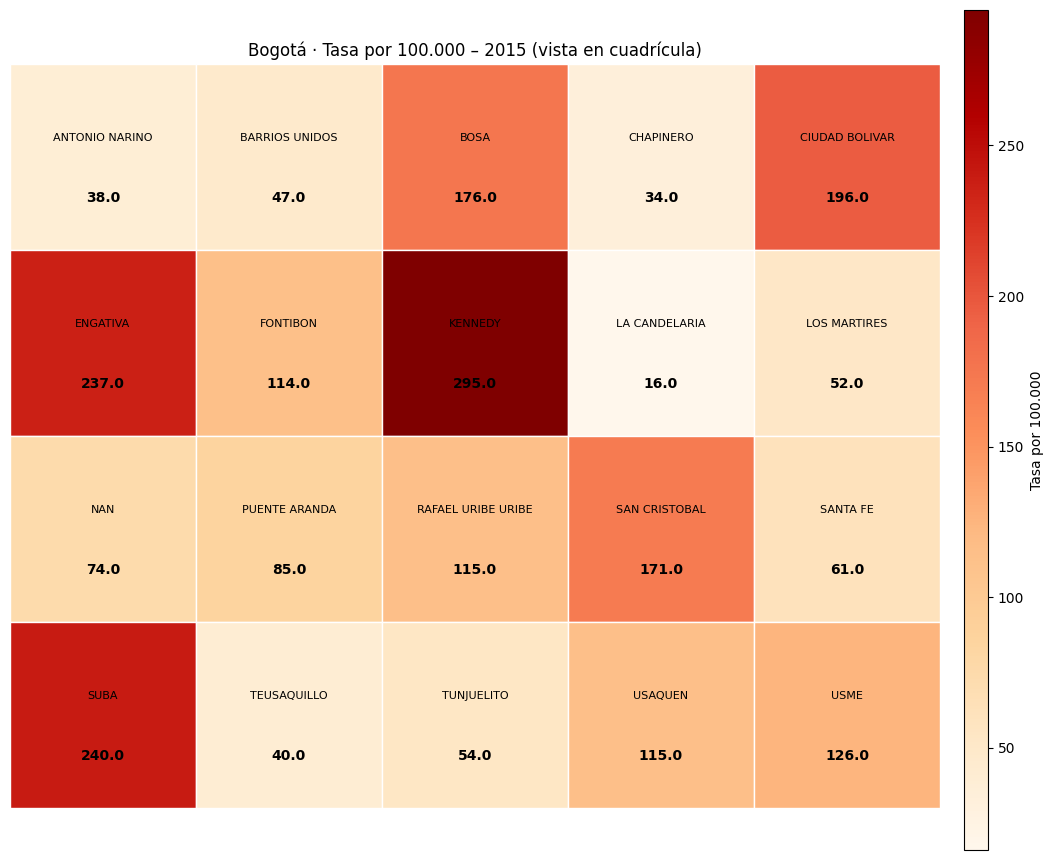

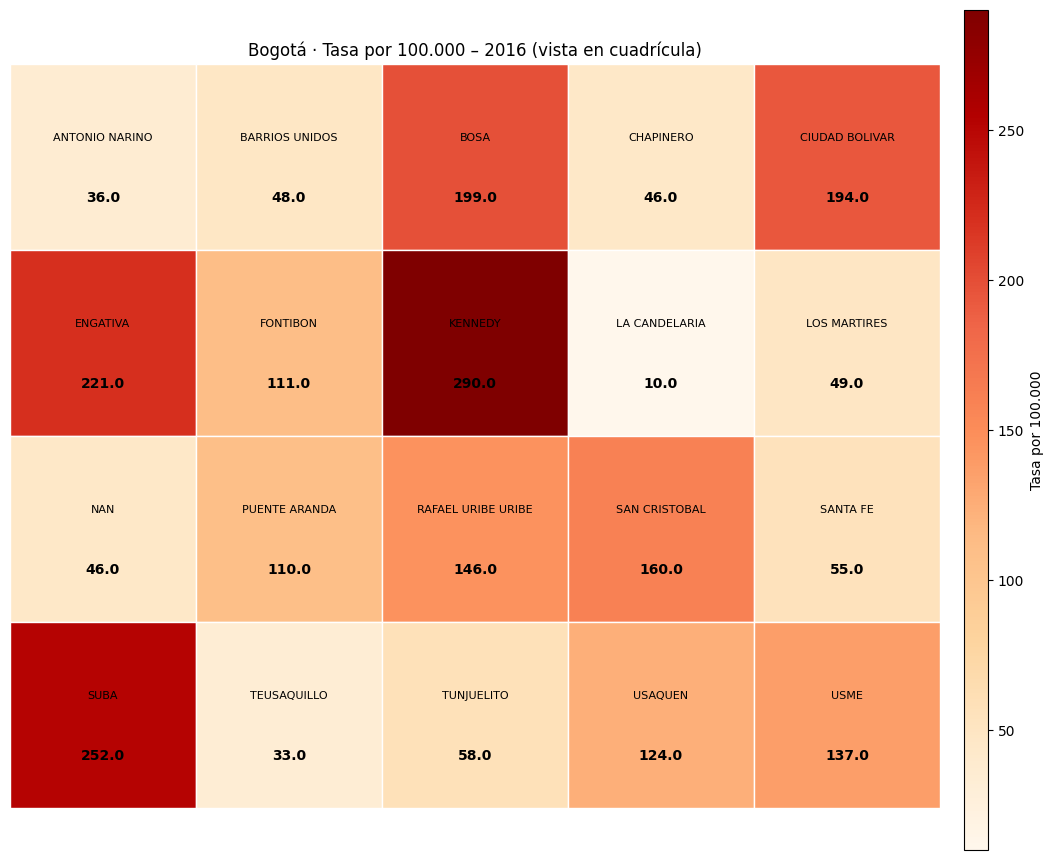

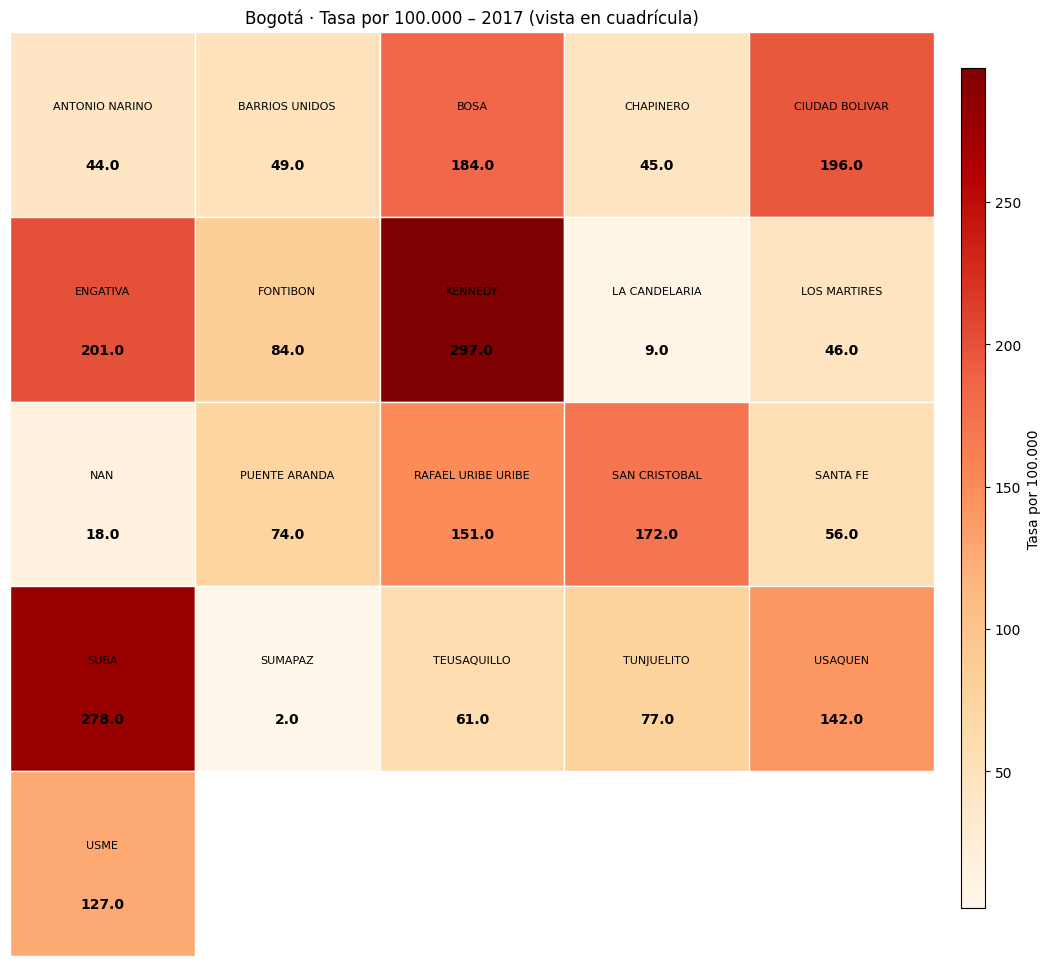

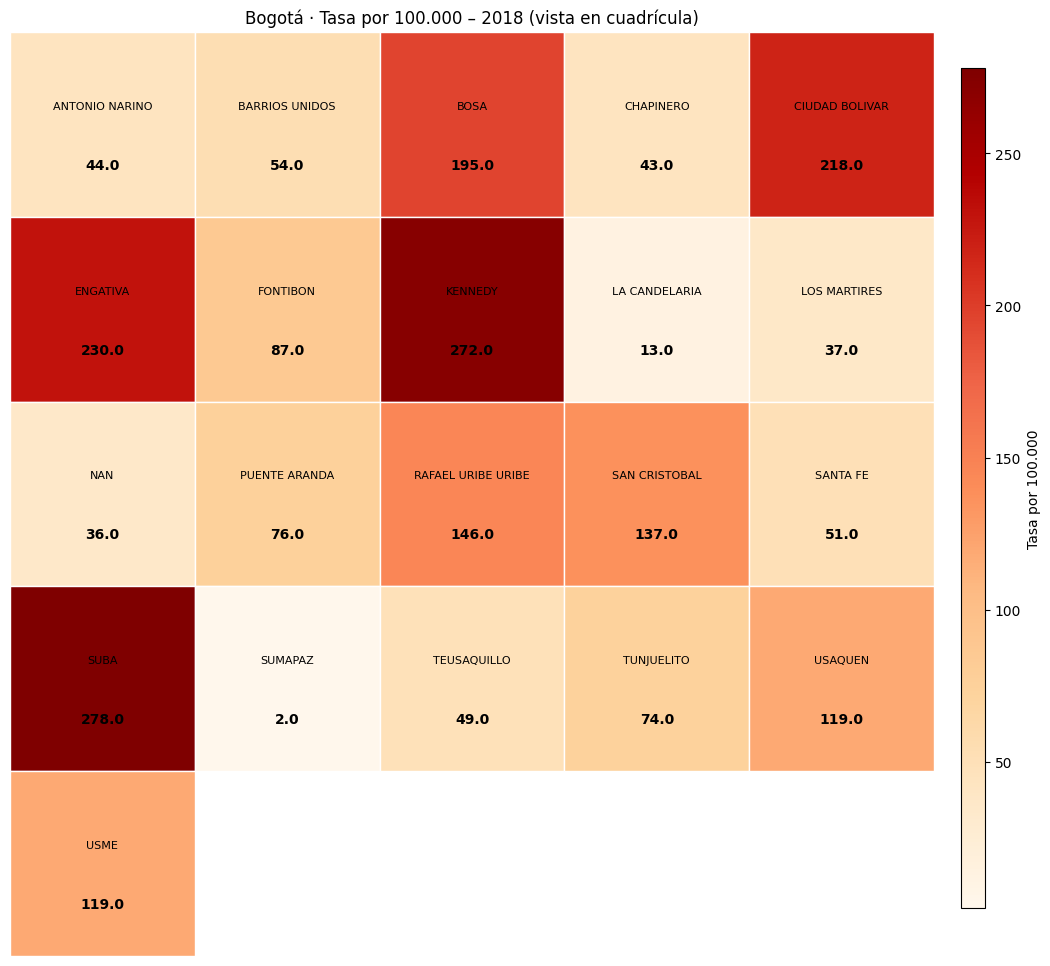

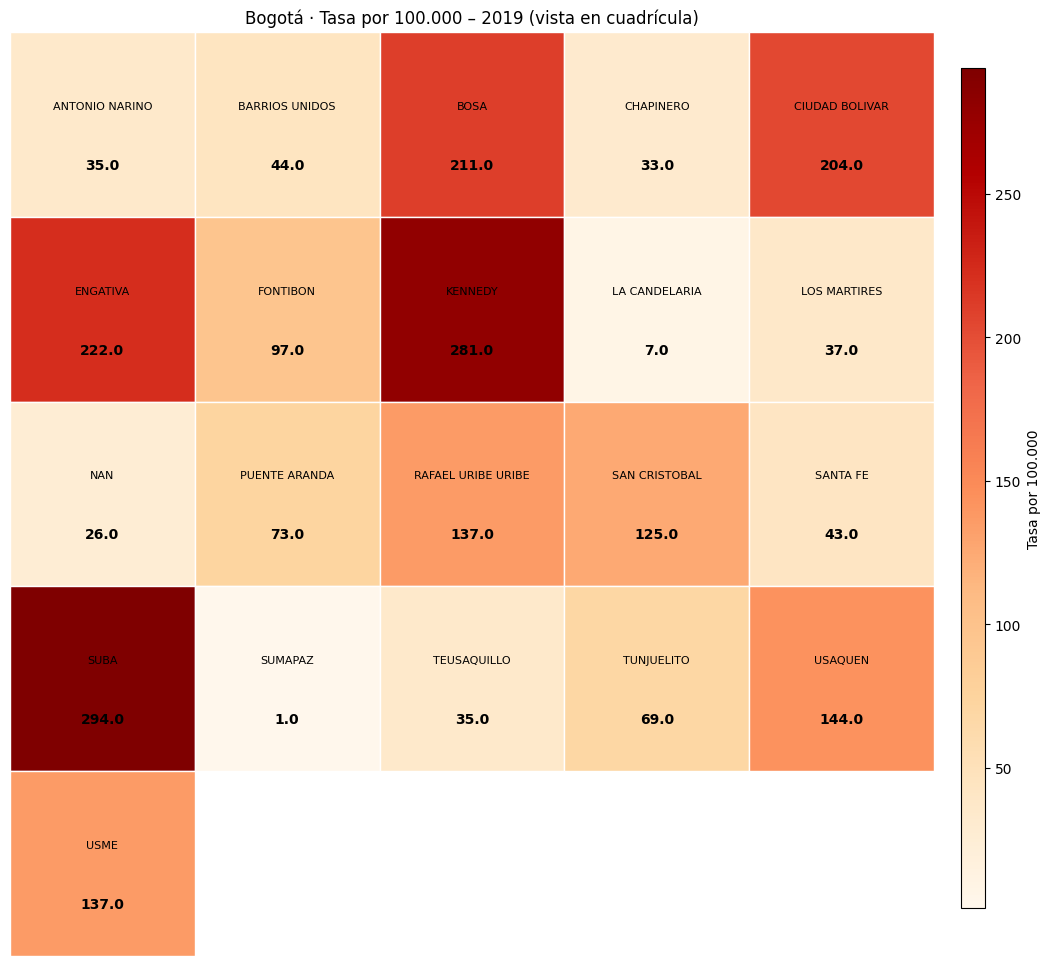

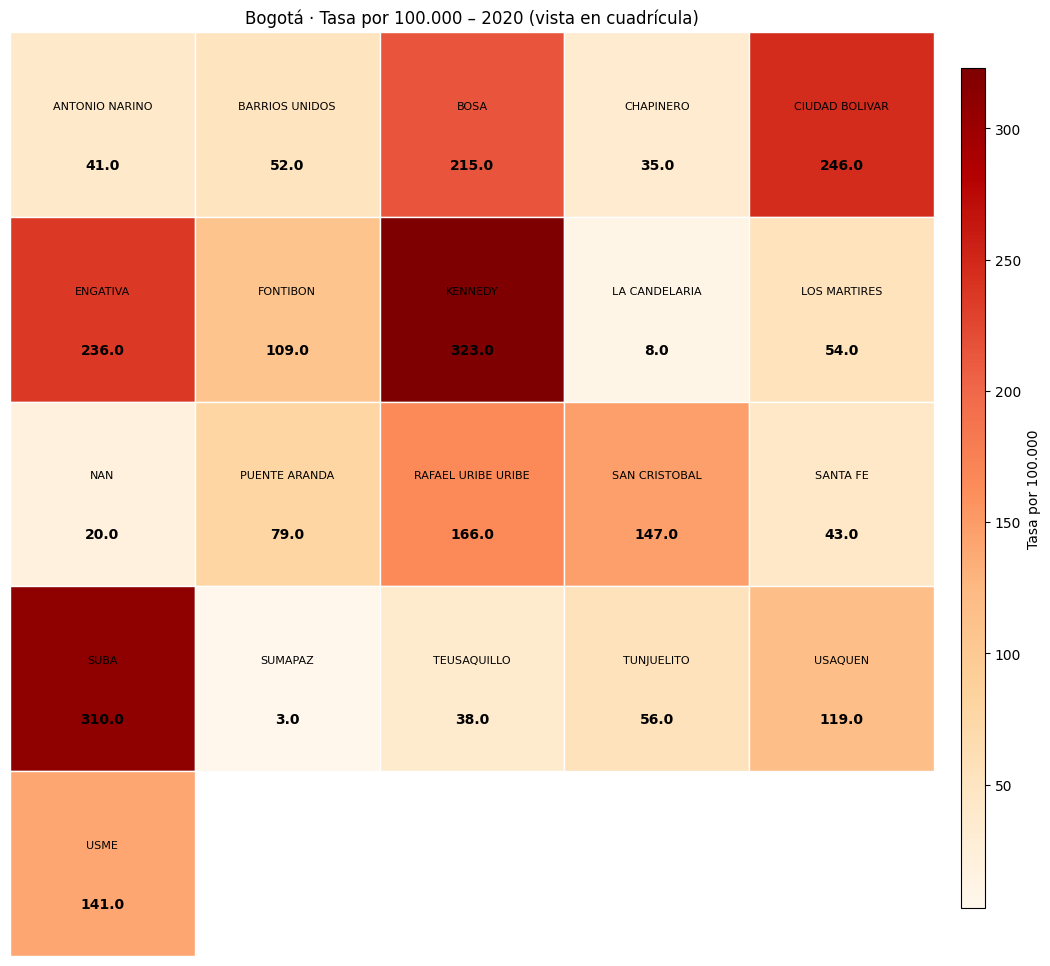

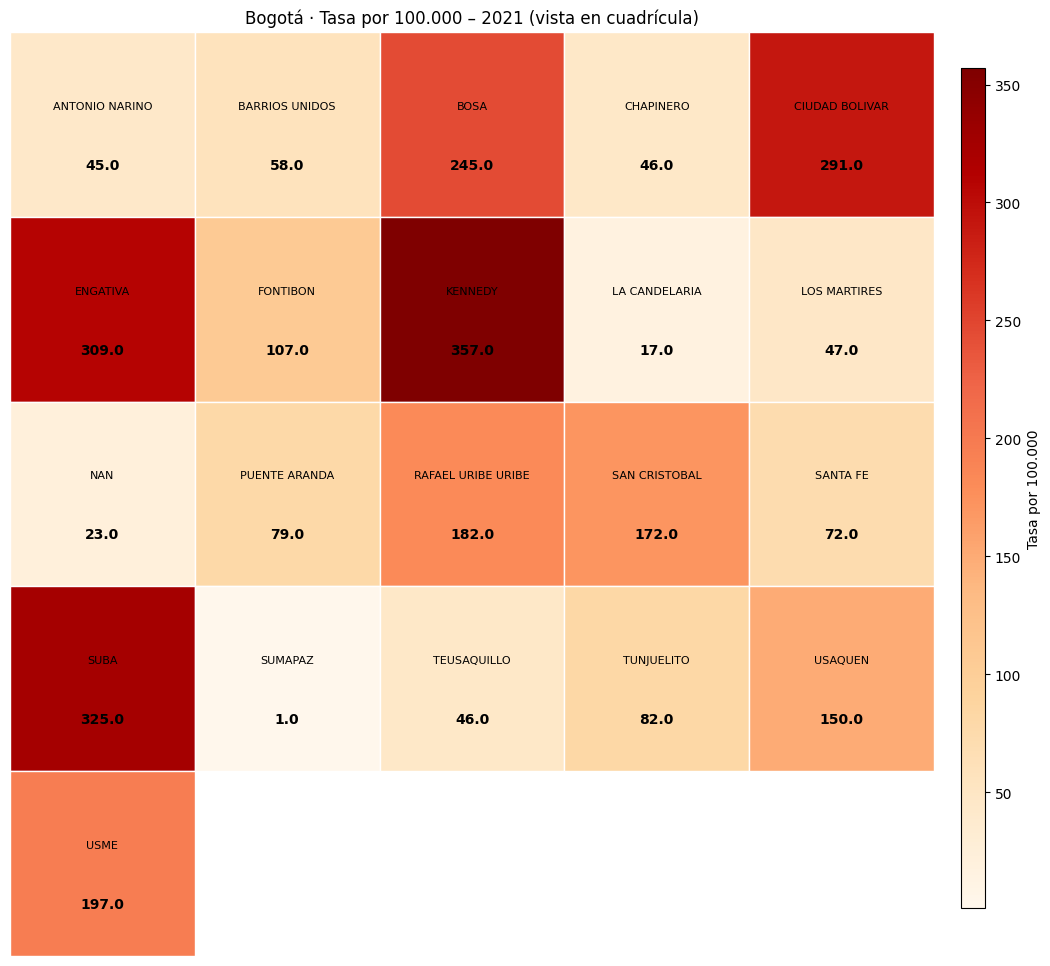

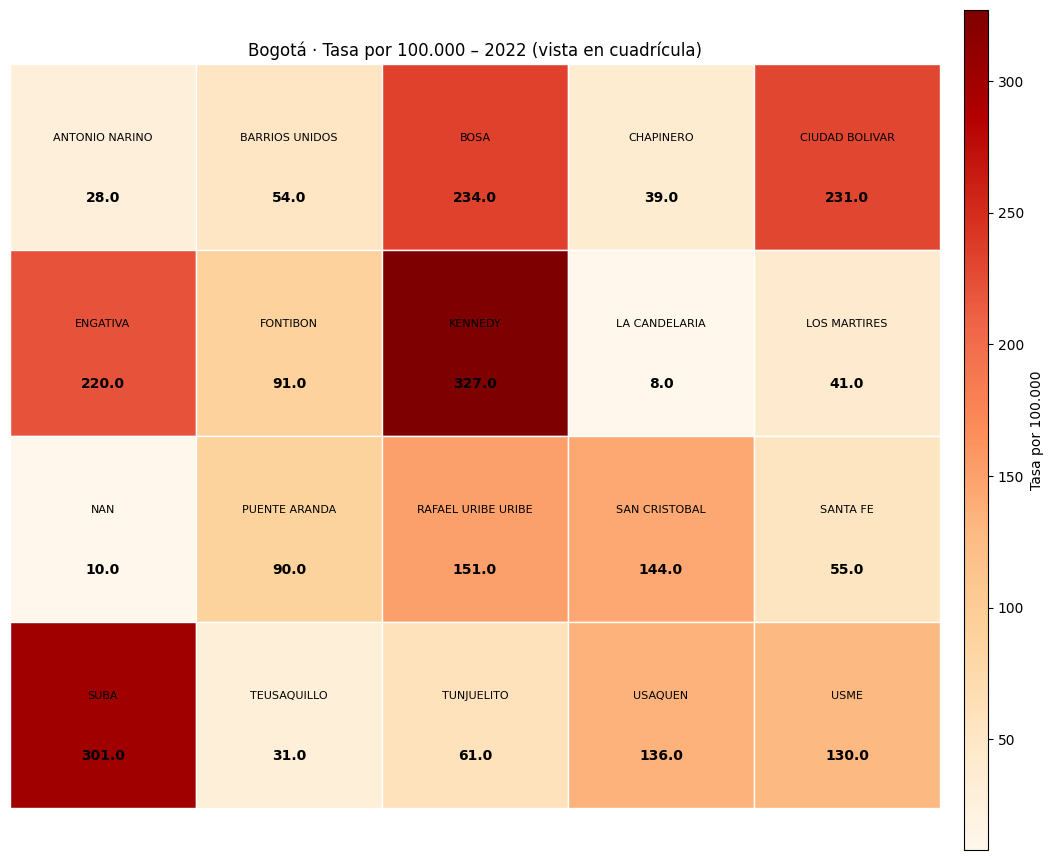

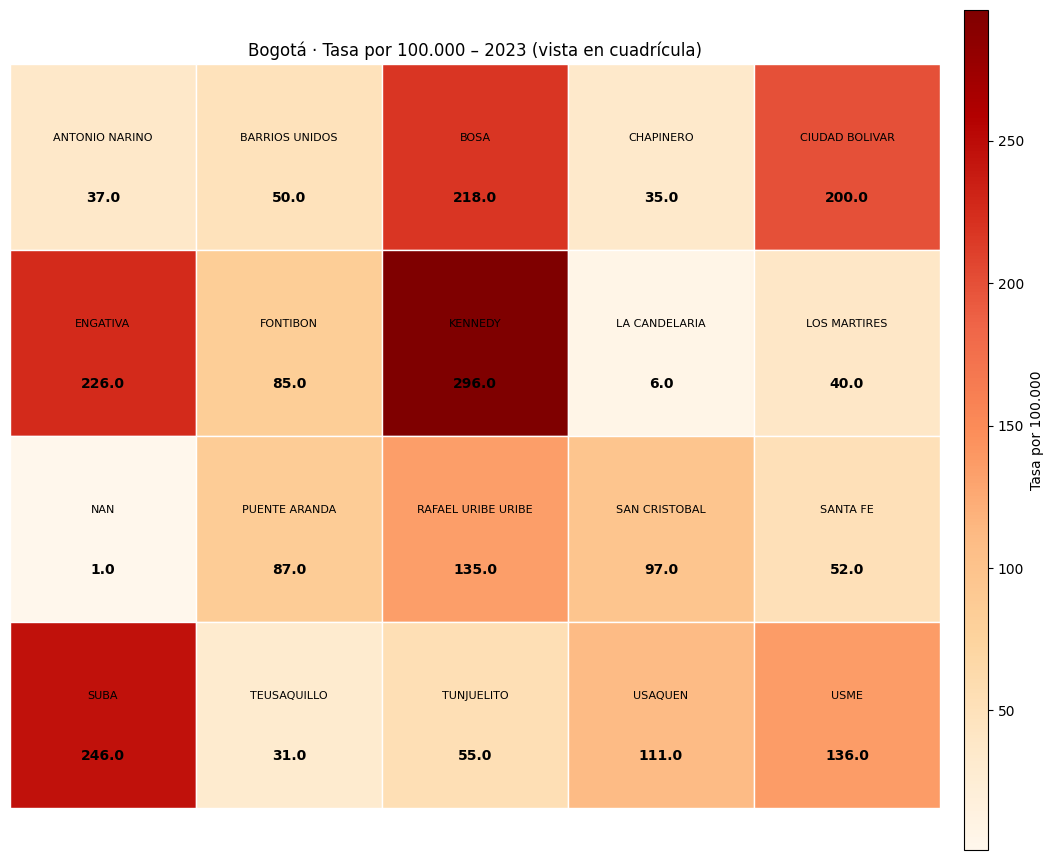

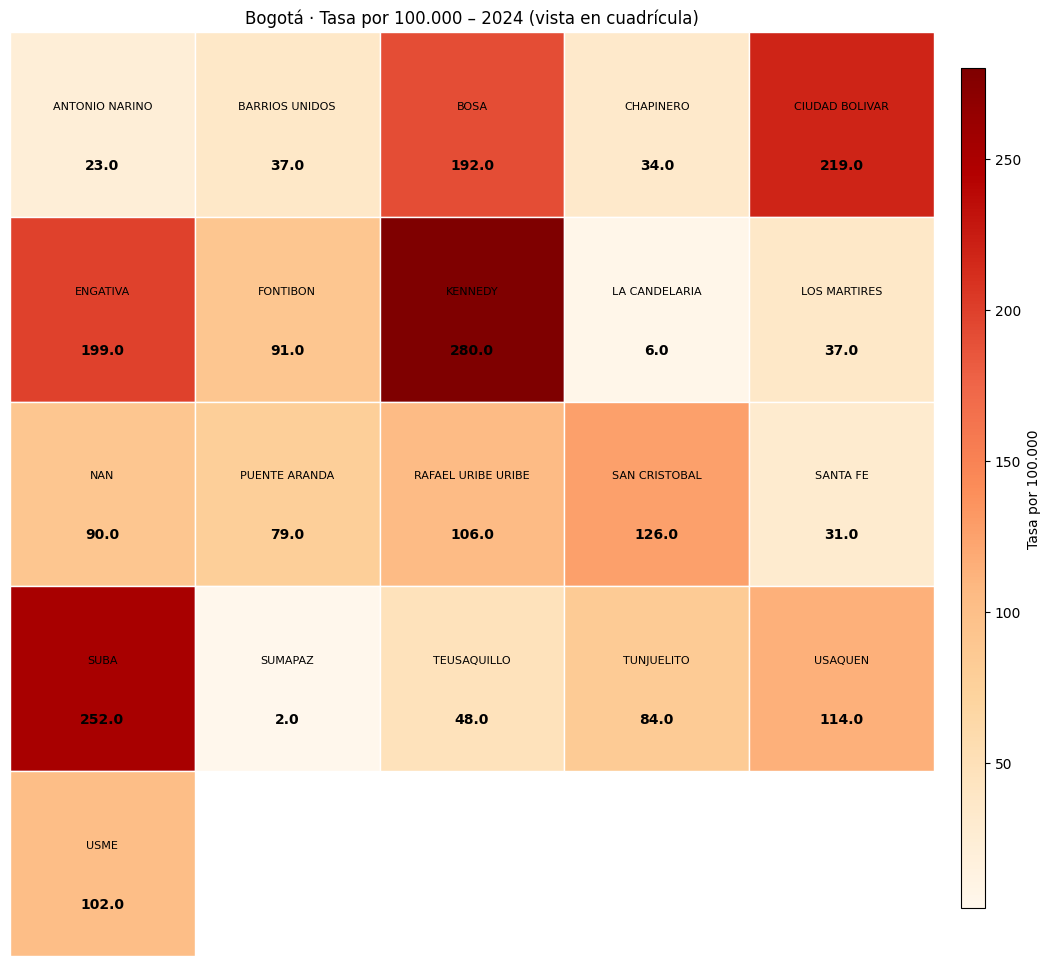

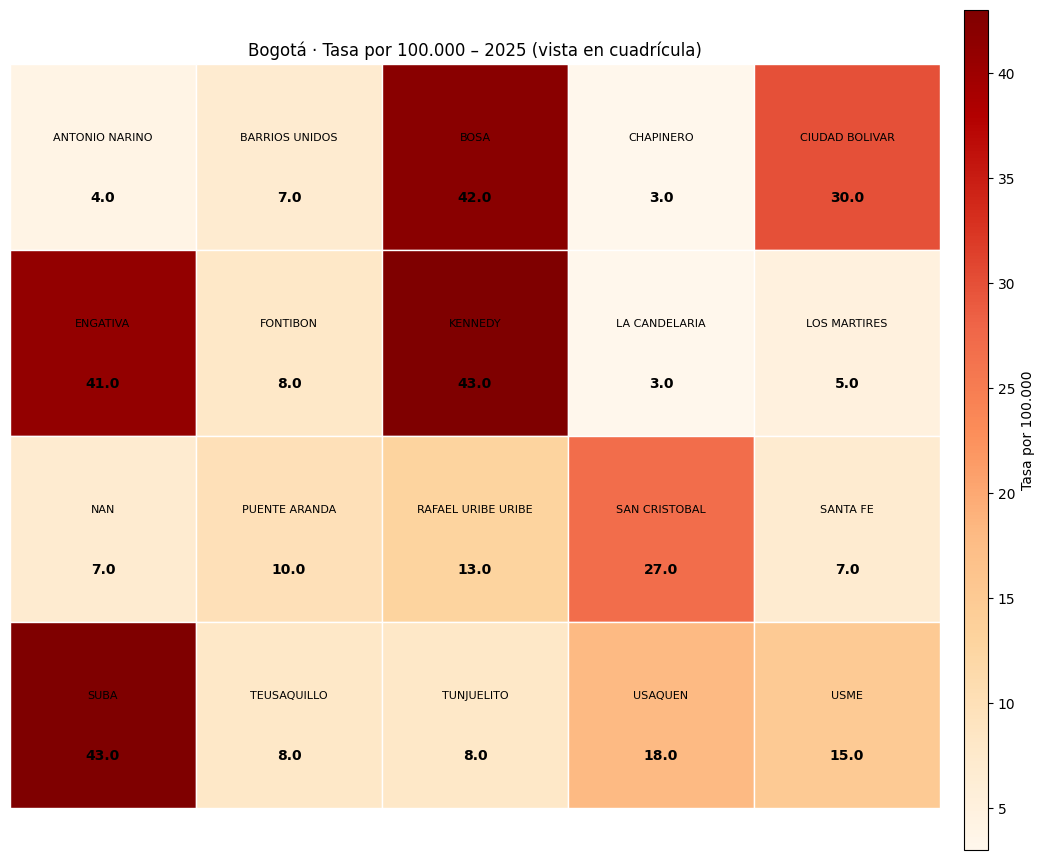

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle

def _norm_and_cmap(values, cmap="OrRd"):
    values = np.asarray(values, dtype=float)
    vmin, vmax = np.nanmin(values), np.nanmax(values)
    if np.isclose(vmin, vmax):
        vmax = vmin + 1.0
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cm = mpl.colormaps.get_cmap(cmap)   # <-- reemplaza mpl.cm.get_cmap
    return norm, cm



# (D1) Placeholder: “mapa” en cuadrícula (sin tight_layout conflictivo)
def mapa_tasas_placeholder(df_tasas, year, cmap="OrRd", titulo=None, outpath=None):
    tt = (df_tasas[df_tasas["ANO"]==year]
          .dropna(subset=["TASA_100K"])
          .sort_values("LOCALIDAD_STD"))
    if tt.empty:
        return None

    labels = tt["LOCALIDAD_STD"].tolist()
    vals   = tt["TASA_100K"].astype(float).values

    n = len(labels)
    ncols = int(np.ceil(np.sqrt(n)))
    nrows = int(np.ceil(n / ncols))

    norm, cm = _norm_and_cmap(vals, cmap)
    fig, ax = plt.subplots(figsize=(min(12, 3*ncols), min(12, 3*nrows)))

    idx = 0
    for r in range(nrows):
        for c in range(ncols):
            if idx >= n: break
            v = vals[idx]
            color = cm(norm(v))
            rect = Rectangle((c, nrows-1-r), 1, 1, facecolor=color, edgecolor="white")
            ax.add_patch(rect)
            ax.text(c+0.5, nrows-1-r+0.60, labels[idx], ha="center", va="center", fontsize=8, wrap=True)
            ax.text(c+0.5, nrows-1-r+0.28, f"{v:.1f}", ha="center", va="center", fontsize=10, fontweight="bold")
            idx += 1

    ax.set_xlim(0, ncols); ax.set_ylim(0, nrows)
    ax.set_aspect("equal"); ax.axis("off")
    ax.set_title(titulo or f"Bogotá · Tasa por 100.000 – {year} (vista en cuadrícula)")

    # Barra de color sin usar tight_layout (evita el warning)
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    mpl.colorbar.ColorbarBase(cax, cmap=cm, norm=norm, orientation='vertical', label='Tasa por 100.000')
    fig.subplots_adjust(right=0.9)  # <-- en lugar de tight_layout(rect=...)

    if outpath:
        fig.savefig(outpath, dpi=220, bbox_inches="tight")
    return fig

# (D2) Mapa con GeoPandas (si está disponible; mantiene tight_layout normal)
def mapa_tasas_por_ano(df_tasas, year, geo_path="bogota_localidades.geojson",
                       col_geo_nombre=None, cmap="OrRd", titulo=None, outpath=None):
    try:
        import geopandas as gpd
    except ImportError:
        return mapa_tasas_placeholder(df_tasas, year, cmap=cmap, titulo=titulo, outpath=outpath)

    import re, unicodedata
    def _sin_acentos_(s: pd.Series) -> pd.Series:
        return (s.astype("string")
                  .apply(lambda x: unicodedata.normalize("NFKD", x).encode("ascii","ignore").decode("utf-8")
                         if x is not None else x))
    def estandarizar_localidad_str(x: pd.Series) -> pd.Series:
        s = x.astype("string").str.strip().str.lower()
        s = _sin_acentos_(s).str.replace(r"^\s*\d+\s*-\s*", "", regex=True)
        s = s.str.replace(r"\s+", " ", regex=True).str.strip()
        s = s.replace({"bogota d c":"bogota","bogota dc":"bogota"})
        return s.str.upper()

    if not os.path.exists(geo_path):
        return mapa_tasas_placeholder(df_tasas, year, cmap=cmap, titulo=titulo, outpath=outpath)

    gdf = gpd.read_file(geo_path)

    if col_geo_nombre is None:
        cand = [c for c in gdf.columns if re.search(r'localid|nombre|name', c, re.I)]
        col_geo_nombre = cand[0] if cand else gdf.columns[0]
    gdf["LOCALIDAD_STD"] = estandarizar_localidad_str(gdf[col_geo_nombre])

    tt = (df_tasas[df_tasas["ANO"]==year]
          .groupby("LOCALIDAD_STD", as_index=False)
          .agg(MUERTES=("MUERTES","sum"),
               POBLACION=("POBLACION","sum"),
               TASA_100K=("TASA_100K","mean")))

    gdfm = gdf.merge(tt, on="LOCALIDAD_STD", how="left")

    fig, ax = plt.subplots(1,1, figsize=(8,8))
    gdfm.plot(column="TASA_100K", cmap=cmap, linewidth=0.6, edgecolor="white",
              legend=True, ax=ax, missing_kwds={"color":"lightgrey","edgecolor":"white","hatch":"///",
                                               "label":"Sin datos"})
    ax.set_axis_off()
    ax.set_title(titulo or f"Bogotá · Tasa por 100.000 – {year}", fontsize=13, pad=10)
    fig.tight_layout()
    if outpath:
        fig.savefig(outpath, dpi=220, bbox_inches="tight")
    return fig

# (E) Ejecuta visualizaciones para un conjunto de años
anios_disponibles = sorted(tasas["ANO"].dropna().unique().tolist())
anios_mostrar = [a for a in anios_disponibles if a in (2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025)]
if not anios_mostrar:
    anios_mostrar = anios_disponibles[-3:]

os.makedirs("salidas/figs", exist_ok=True)

for y in anios_mostrar:


    geojson_path = "bogota_localidades.geojson"
    f2 = mapa_tasas_por_ano(tasas, y, geo_path=geojson_path, col_geo_nombre=None,
                            cmap="OrRd", outpath=f"salidas/figs/mapa_{y}.png")
    if f2:
        plt.show()

### **7.4. Interpretación de Resultados**
---
* ¿Existen patrones o tendencias significativas en los datos?
* ¿Qué significan los resultados en términos prácticos?
* ¿Existen patrones o tendencias inesperadas en los datos que requieran una consideración especial o una investigación adicional?
* ¿Cuáles fueron los hallazgos principales que contribuirán al proceso de toma de decisiones?

Recuerde que la interpretación de resultados es una fase clave para extraer el significado de los datos y proporcionar respuestas o soluciones al problema inicial.

* ¿Existen patrones o tendencias significativas en los datos?

Por causa:

Las enfermedades isquémicas del corazón (I20–I25) son la principal causa de mortalidad, con un pico en 2021 y posterior descenso.

Las enfermedades cerebrovasculares (I60–I69) y las hipertensivas (I10–I15) muestran una tendencia más estable, sin picos tan marcados.

Tendencia global:

Entre 2015–2019 la mortalidad se mantuvo relativamente estable.

En 2020–2021 hubo un aumento abrupto, alcanzando el máximo en 2021, seguido de una reducción sostenida hasta 2024.

* ¿Qué significan los resultados en términos prácticos?

El pico de 2021 puede asociarse a factores externos (p. ej., pandemia por COVID-19 o saturación del sistema de salud) que impactaron la mortalidad cardiovascular.

La disminución en los años siguientes podría indicar:

Mayor control en factores de riesgo.

Cambios en el acceso o manejo clínico.

Subregistro o variación en los datos más recientes (2025).

A nivel local, localidades como Kennedy, Suba, Rafael Uribe Uribe y Ciudad Bolívar concentran consistentemente los valores más altos, lo que sugiere una relación con condiciones socioeconómicas y acceso a servicios.

* ¿Existen patrones o tendencias inesperadas que requieran investigación adicional?

El pico atípico en 2021 requiere análisis más profundo: ¿se explica por la pandemia, por cambios en el registro, o por una combinación de ambos?

El descenso abrupto en 2025 parece poco verosímil (casi desaparición en algunas causas), lo que puede estar reflejando falta de consolidación de datos y no necesariamente una reducción real de muertes.

El boxplot muestra que la variabilidad entre localidades es amplia, lo que indica desigualdad territorial en la carga de mortalidad.


* ¿Cuáles fueron los hallazgos principales que contribuirán al proceso de toma de decisiones?

Carga principal: las enfermedades isquémicas del corazón son la mayor causa de muertes, por lo que deben ser la prioridad en políticas de prevención.

Pico 2021: debe revisarse el impacto de factores externos (ej. pandemia) para entender la vulnerabilidad del sistema de salud.

Desigualdad geográfica: Kennedy, Suba, Rafael Uribe Uribe y Ciudad Bolívar son localidades críticas, y deberían recibir intervenciones focalizadas.

Tendencia descendente post-2021: es positivo, pero debe validarse que no sea efecto de subregistro.

Variabilidad interanual y territorial: se requiere fortalecer vigilancia epidemiológica y estrategias diferenciadas por localidad.

## **8. Conclusiones**
---
Asegúrese de incluir al menos una conclusión de cada unidad tratada en los *notebooks*. Estas conclusiones actúan como resúmenes breves que destacan los puntos clave y los aprendizajes esenciales de cada sección.


1.   Las enfermedades isquémicas del corazón son la principal causa de mortalidad en Bogotá, con un pico anómalo en 2020–2021 y un descenso posterior. Las localidades de Kennedy, Suba, Ciudad Bolívar y Rafael Uribe Uribe concentran la mayor carga, lo que refleja desigualdad territorial. Estos hallazgos son importantes porque permiten focalizar intervenciones en salud pública y fortalecer estrategias de prevención cardiovascular.
2. El análisis descriptivo muestra que la edad al fallecer se concentra entre los 55 y 70 años, con valores atípicos en menores de 40 que evidencian muertes prematuras de interés epidemiológico. En la variable año, los registros se encuentran dentro del rango 2015–2025 y no presentan valores atípicos reales, aunque 2025 refleja un menor número de casos por consolidación de datos.
3.   La detección con duplicated() permitió identificar y eliminar registros idénticos, garantizando que cada fila representara un caso único. Esto evitó la sobrerepresentación de eventos y sesgos en frecuencias y tasas. El dataset no presentó valores nulos relevantes en variables críticas como sexo, edad, localidad y causa de fallecimiento, lo que asegura la integridad y representatividad de la información. Se identificaron valores extremos en la variable edad (30–40 años), que corresponden a casos válidos de mortalidad prematura. Su conservación en el análisis permitió visibilizar este subgrupo y aportar una visión más completa del fenómeno epidemiológico.
4.   El uso combinado de estadística descriptiva (frecuencias, tasas, proporciones, medidas de tendencia central) e inferencial (comparaciones de medias/proporciones, pruebas de significancia) permitió caracterizar la mortalidad por ECV desde una perspectiva panorámica y analítica. Se evidenciaron desigualdades territoriales, sesgos por sexo y edad, y un predominio de causas isquémicas sobre cerebrovasculares e hipertensivas.

5. El análisis mostró que la correlación de Pearson no era adecuada para la mayoría de variables por su carácter categórico, por lo que se usaron gráficas de correlaciones entre año y muertes, mostrando el comportamiento de llos sexos y las localidades.
Se seleccionaron LOCALIDAD, SEXO, CIE10_AGRUPADA y EDAD_FALLECIDO, priorizando aquellas con mayor relevancia epidemiológica y capacidad explicativa.
Los gráficos de series temporales y las regresiones lineales globales y por grupos permitieron identificar tendencias diferenciales entre localidades y sexos.
El modelo de regresión lineal para EDAD_FALLECIDO evidenció que los factores analizados explican solo una fracción pequeña de la variabilidad, aunque algunas localidades muestran diferencias significativas.


## **REFERENCIAS**
---

[1] World Health Organization, “Cardiovascular diseases (CVDs) – Fact sheet,” Jul. 31, 2025.  


[2] Pan American Health Organization, “Noncommunicable disease deaths in the Americas have risen 43% since 2000, PAHO report shows,” Jul. 2, 2025.


[3] Pan American Health Organization, “Cardiovascular disease burden,” accessed Sep. 2, 2025.


[4] Ministerio de Salud y Protección Social de Colombia, “Enfermedades cardiovasculares,” accessed Sep. 2, 2025.


[5] SaluData – Observatorio de Salud de Bogotá, “Mortalidad general en Bogotá D.C.,” 2023 (consulta 2025).

[6] SaluData – Observatorio de Salud de Bogotá, “Mortalidad prematura por enfermedad cardiocerebrovascular (30 a 70 años),” Apr. 10, 2025.

## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*